In [1]:
#%% imports
from scipy.io import loadmat
# import json
import pandas as pd
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["font.size"] = 40
# plt.rcParams["figure.figsize"]  = (20, 25)
# from numpy import matlib
import seaborn as sns
# import pingouin as pg
from gridfunctions import *
from itertools import compress
import scipy.stats as stats
import rpy2
import math
import os
# import ptitprince as pt
sns.set(style="whitegrid", font_scale = 5)
# os.environ['R_HOME'] = "/Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/"
%load_ext rpy2.ipython

In [38]:

df = pd.read_csv('data/df_exp1.csv', index_col = 0)
df_part = pd.read_csv('data/df_exp1_part.csv', index_col = 0)
df_steps = pd.read_csv('data/df_exp1_steps.csv', index_col = 0)

In [53]:
df2 = pd.read_csv('data/df_exp2.csv', index_col = 0)
df2_part = pd.read_csv('data/df_exp2_part.csv', index_col = 0)
df2_steps = pd.read_csv('data/df_exp2_steps.csv', index_col = 0)

In [ ]:
df3 = pd.read_csv('data/df_exp3.csv', index_col = 0)
df3_part = pd.read_csv('data/df_exp3_part.csv', index_col = 0)
df3_steps = pd.read_csv('data/df_exp3_steps.csv', index_col = 0)

In [11]:
%%R -i df
#Figure 2A
# library(lme4)
# library(lmerTest)
# library(lmtest)
library(JuliaCall)
df$obstacles <- df$obstacles - 0.5
df$trialno <- df$trialno - mean(df$trialno)
# # model <- lmer(resp_logsteps ~ trialno + actioncondition * obstacles + (1 + trialno + actioncondition * obstacles|partno), data = df)
# # summary(model)

# # model2 <- lmer(resp_logsteps ~ trialno + actioncondition * obstacles + (1 + trialno + actioncondition + obstacles|partno), data = df)
# # summary(model2)
# # #likelihood ratio test
# # lrtest(model, model2)

# # model3 <- lmer(resp_logsteps ~ trialno + actioncondition * obstacles + (1 + trialno + actioncondition|partno), data = df)
# # # summary(model3)
# # # #likelihood ratio test
# # lrtest(model2, model3)

# # model4 <- lmer(resp_logsteps ~ trialno + actioncondition * obstacles + (1 + actioncondition|partno), data = df)
# # # summary(model4)
# # # #likelihood ratio test
# # lrtest(model3, model4)

# model5 <- lmer(resp_logsteps ~ trialno + actioncondition * obstacles + (1|partno) , data = df)
# # # summary(model5)
# # # #likelihood ratio test
# lrtest(model4, model5)
julia <- julia_setup()
julia$eval('using MixedModels')
julia$assign('df', df)
julia$eval('model = fit!(MixedModel(@formula(resp_logsteps ~ trialno + actioncondition * obstacles + (1 + trialno + actioncondition * obstacles|partno)), df))')
julia$eval('model2 = fit!(MixedModel(@formula(resp_logsteps ~ trialno + actioncondition * obstacles + (1 + actioncondition * obstacles|partno)), df))')

julia$eval('lrtest = MixedModels.likelihoodratiotest(model, model2)')

julia$eval('model3 = fit!(MixedModel(@formula(resp_logsteps ~ trialno + actioncondition * obstacles + (1 + actioncondition + obstacles|partno)), df))')
julia$eval('lrtest2 = MixedModels.likelihoodratiotest(model2, model3)')

julia$eval('model4 = fit!(MixedModel(@formula(resp_logsteps ~ trialno + actioncondition * obstacles + (1 + actioncondition|partno)), df))')
julia$eval('lrtest3 = MixedModels.likelihoodratiotest(model3, model4)')

julia$eval('model5 = fit!(MixedModel(@formula(resp_logsteps ~ trialno + actioncondition * obstacles + (1|partno)), df))')
julia$eval('lrtest4 = MixedModels.likelihoodratiotest(model4, model5)')

#use model 4
julia$eval('model4')




/home/denis/anaconda3/envs/dl/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "resp_explorexclicks". Fall back to string conversion. The error is: integer 53643465645356343 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '
/home/denis/anaconda3/envs/dl/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "resp_exploreyclicks". Fall back to string conversion. The error is: integer 53373735375353377 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '
R[write to console]: Julia version 1.10.5 at location /home/denis/.julia/juliaup/julia-1.10.5+0.x64.linux.gnu/bin will be used.

R[write to console]: Loading setup script for JuliaCall...

R[write to console]: Finish loading setup script for JuliaCall.

Minimizing 209    Time: 0:00:00 ( 0.48 ms/it)
bjective:  14753.08210199013
Minimizing 1643    Time: 0:00:00 ( 0.34 ms/

Julia Object of type LinearMixedModel{Float64}.
Linear mixed model fit by maximum likelihood
 resp_logsteps ~ 1 + trialno + actioncondition + obstacles + actioncondition & obstacles + (1 + actioncondition | partno)
   logLik   -2 logLik     AIC       AICc        BIC    
 -7286.7379 14573.4758 14613.4758 14613.6102 14748.3528

Variance components:
                  Column         Variance Std.Dev.   Corr.
partno   (Intercept)              0.135414 0.367987
         actioncondition: random  0.039753 0.199381 -0.33
         actioncondition: tonly   0.075422 0.274631 -0.64 +0.62
         actioncondition: vonly   0.017269 0.131411 -0.27 +0.78 +0.09
Residual                          0.550689 0.742085
 Number of obs: 6272; levels of grouping factors: 194

  Fixed-effects parameters:
─────────────────────────────────────────────────────────────────────────────
                                           Coef.  Std. Error      z  Pr(>|z|)
─────────────────────────────────────────────────────────

In [24]:
%%R -i df_steps
#Figure 2D Stats test

library(JuliaCall)
df_steps <- df_steps[df_steps$actioncondition == 'both',]
df_steps$obstacles <- df_steps$obstacles - 0.5
# df_steps$resptype <- as.factor(df_steps$resptype)
#change newobjtype ref to none
df_steps$newobjtype <- as.factor(df_steps$newobjtype)
df_steps$newobjtype <- relevel(df_steps$newobjtype, ref = "none")
df_steps$goal <- ifelse(df_steps$newobjtype == 'goal', 1, 0)
df_steps$landmark <- ifelse(df_steps$newobjtype == 'landmark', 1, 0)
# model <- glmer(resptype ~ trialno + newobjtype * obstacles + (1 + trialno + newobjtype * obstacles|partno), data = df_steps, family = binomial)
# model <- glmer(resptype ~ trialno + newobjtype * obstacles + (1|partno), data = df_steps, family = binomial)
# summary(model)
julia <- julia_setup()
julia$eval('using MixedModels')
julia$assign('df_steps', df_steps)
julia$eval('modelspec = MixedModel(@formula(resptype ~ trialno + landmark * prevvisited * obstacles  + goal * obstacles + (1 + trialno + landmark * prevvisited * obstacles  + goal * obstacles |partno)), df_steps, Bernoulli())')
# julia$eval('modelspec.optsum.optimizer = :LN_NELDERMEAD;')
julia$eval('model = fit!(modelspec, init_from_lmm = [:β, :θ])')

julia$eval('modelspec2 = MixedModel(@formula(resptype ~ trialno + landmark * prevvisited * obstacles  + goal * obstacles + (1 + landmark * prevvisited * obstacles  + goal * obstacles |partno)), df_steps, Bernoulli())')

Minimizing 237    Time: 0:00:00 ( 0.47 ms/it)
bjective:  82118.67852983766
Minimizing 451    Time: 0:00:00 ( 0.50 ms/it)
bjective:  81588.19492875328
Minimizing 634    Time: 0:00:00 ( 0.52 ms/it)
bjective:  81376.66365332811
Minimizing 808    Time: 0:00:00 ( 0.54 ms/it)
bjective:  81275.97839764653
Minimizing 983    Time: 0:00:00 ( 0.54 ms/it)
bjective:  81197.14738332253
Minimizing 1164    Time: 0:00:00 ( 0.54 ms/it)
bjective:  81171.85181365581
Minimizing 1345    Time: 0:00:00 ( 0.55 ms/it)
bjective:  81145.72123571232
Minimizing 1526    Time: 0:00:00 ( 0.55 ms/it)
bjective:  81129.61787393762
Minimizing 1707    Time: 0:00:00 ( 0.55 ms/it)
bjective:  81109.17124011321
Minimizing 1883    Time: 0:00:01 ( 0.55 ms/it)
bjective:  81085.72512085867
Minimizing 2063    Time: 0:00:01 ( 0.55 ms/it)
bjective:  81070.19865112727
Minimizing 2243    Time: 0:00:01 ( 0.55 ms/it)
bjective:  81055.0751376441
Minimizing 2424    Time: 0:00:01 ( 0.55 ms/it)
bjective:  81048.00380880592
Minimizing 2607   

Julia Object of type GeneralizedLinearMixedModel{Float64, Bernoulli{Float64}}.


┌ Warning: Model has not been fit
└ @ MixedModels ~/.julia/packages/MixedModels/9scMO/src/generalizedlinearmixedmodel.jl:722


In [25]:
%%R
julia$eval('modelspec2 = MixedModel(@formula(resptype ~ trialno + landmark * prevvisited * obstacles  + goal * obstacles + (1 + trialno + landmark * prevvisited   + goal  + obstacles |partno)), df_steps, Bernoulli())')
julia$eval('model2 = fit!(modelspec2, init_from_lmm = [:β, :θ])')
julia$eval('lrtest = MixedModels.likelihoodratiotest(model, model2)')



Minimizing 286    Time: 0:00:00 ( 0.36 ms/it)
bjective:  81495.01856948066
Minimizing 572    Time: 0:00:00 ( 0.35 ms/it)
bjective:  81195.08806319187
Minimizing 859    Time: 0:00:00 ( 0.35 ms/it)
bjective:  81121.20090950874
Minimizing 1147    Time: 0:00:00 ( 0.35 ms/it)
bjective:  81109.65746747285
Minimizing 1436    Time: 0:00:00 ( 0.35 ms/it)
bjective:  81094.71053588222
Minimizing 1725    Time: 0:00:00 ( 0.35 ms/it)
bjective:  81082.04940500247
Minimizing 2014    Time: 0:00:00 ( 0.35 ms/it)
bjective:  81076.59855222976
Minimizing 2303    Time: 0:00:00 ( 0.35 ms/it)
bjective:  81073.3324159263
Minimizing 2591    Time: 0:00:00 ( 0.35 ms/it)
bjective:  81071.47712768758
Minimizing 2879    Time: 0:00:01 ( 0.35 ms/it)
bjective:  81070.7131457288
Minimizing 3167    Time: 0:00:01 ( 0.35 ms/it)
bjective:  81070.12906583624
Minimizing 3455    Time: 0:00:01 ( 0.35 ms/it)
bjective:  81069.77746421992
Minimizing 3743    Time: 0:00:01 ( 0.35 ms/it)
bjective:  81069.0703315615
Minimizing 4029   

Julia Object of type MixedModels.LikelihoodRatioTest.
Model Formulae
1: resptype ~ 1 + trialno + landmark + prevvisited + obstacles + goal + landmark & prevvisited + landmark & obstacles + prevvisited & obstacles + goal & obstacles + landmark & prevvisited & obstacles + (1 + trialno + landmark + prevvisited + landmark & prevvisited + goal + obstacles | partno)
2: resptype ~ 1 + trialno + landmark + prevvisited + obstacles + goal + landmark & prevvisited + landmark & obstacles + prevvisited & obstacles + goal & obstacles + landmark & prevvisited & obstacles + (1 + trialno + landmark + prevvisited + landmark & prevvisited + obstacles + landmark & obstacles + prevvisited & obstacles + landmark & prevvisited & obstacles + goal + goal & obstacles | partno)
───────────────────────────────────────────────────
     model-dof    deviance       χ²  χ²-dof  P(>χ²)
───────────────────────────────────────────────────
[1]         39  14156.9785                         
[2]         77  14117.4210  39


Minimizing 1505    Time: 0:01:16 (50.59 ms/it)
bjective:  14156.978499961204
Minimizing 1505    Time: 0:01:16 (50.59 ms/it)


In [28]:
%%R
julia$eval('modelspec3 = MixedModel(@formula(resptype ~ trialno + landmark + prevvisited + goal + obstacles + (1 +  trialno + landmark + prevvisited + goal + obstacles|partno)), df_steps, Bernoulli())')
julia$eval('model3 = fit!(modelspec3, init_from_lmm = [:β, :θ])')
julia$eval('lrtest = MixedModels.likelihoodratiotest(model2, model3)')



Minimizing 359    Time: 0:00:00 ( 0.28 ms/it)
bjective:  81086.42114366152
Minimizing 728    Time: 0:00:00 ( 0.28 ms/it)
bjective:  80986.1437876291
Minimizing 1100    Time: 0:00:00 ( 0.27 ms/it)
bjective:  80940.61301336554
Minimizing 1470    Time: 0:00:00 ( 0.27 ms/it)
bjective:  80924.63860977371
Minimizing 1844    Time: 0:00:00 ( 0.27 ms/it)
bjective:  80918.0889249353
Minimizing 2218    Time: 0:00:00 ( 0.27 ms/it)
bjective:  80917.28652319542
Minimizing 2593    Time: 0:00:00 ( 0.27 ms/it)
bjective:  80916.88711577475
Minimizing 2968    Time: 0:00:00 ( 0.27 ms/it)
bjective:  80916.82433070181
Minimizing 3343    Time: 0:00:00 ( 0.27 ms/it)
bjective:  80916.81509500413
Minimizing 3399    Time: 0:00:00 ( 0.27 ms/it)
Minimizing 4    Time: 0:00:00 (25.20 ms/it)
bjective:  14438.879533632677
Minimizing 8    Time: 0:00:00 (26.30 ms/it)
bjective:  14428.051538724136
Minimizing 12    Time: 0:00:00 (26.84 ms/it)
bjective:  14428.686425482423
Minimizing 16    Time: 0:00:00 (27.32 ms/it)
bject

Julia Object of type MixedModels.LikelihoodRatioTest.
Model Formulae
1: resptype ~ 1 + trialno + landmark + prevvisited + goal + obstacles + (1 + trialno + landmark + prevvisited + goal + obstacles | partno)
2: resptype ~ 1 + trialno + landmark + prevvisited + obstacles + goal + landmark & prevvisited + landmark & obstacles + prevvisited & obstacles + goal & obstacles + landmark & prevvisited & obstacles + (1 + trialno + landmark + prevvisited + landmark & prevvisited + goal + obstacles | partno)
────────────────────────────────────────────────────
     model-dof    deviance        χ²  χ²-dof  P(>χ²)
────────────────────────────────────────────────────
[1]         27  14257.1424                          
[2]         39  14156.9785  100.1639      12  <1e-15
────────────────────────────────────────────────────


Minimizing 2763    Time: 0:01:38 (35.79 ms/it)
bjective:  14257.14238338128
Minimizing 2765    Time: 0:01:38 (35.79 ms/it)


In [31]:
%%R
julia$eval('model2')

Julia Object of type GeneralizedLinearMixedModel{Float64, Bernoulli{Float64}}.
Generalized Linear Mixed Model fit by maximum likelihood (nAGQ = 1)
  resptype ~ 1 + trialno + landmark + prevvisited + obstacles + goal + landmark & prevvisited + landmark & obstacles + prevvisited & obstacles + goal & obstacles + landmark & prevvisited & obstacles + (1 + trialno + landmark + prevvisited + landmark & prevvisited + goal + obstacles | partno)
  Distribution: Bernoulli{Float64}
  Link: LogitLink()

   logLik    deviance     AIC       AICc        BIC    
 -7078.4892 14156.9785 14234.9785 14235.1201 14547.0696

Variance components:
               Column          Variance Std.Dev.   Corr.
partno (Intercept)             42.463879 6.516431
       trialno                  0.108970 0.330106 -0.73
       landmark                 2.991581 1.729619 -0.25 -0.00
       prevvisited              0.625132 0.790653 -0.18 +0.17 +0.37
       landmark & prevvisited   1.380000 1.174734 +0.21 +0.16 -0.89 -0.37
   

In [11]:
%%R -i df_steps
#Figure 2D Stats test

library(JuliaCall)
# df_steps$obstacles <- df_steps$obstacles - 0.5
# df_steps$resptype <- as.factor(df_steps$resptype)
# df_steps <- df_steps[df_steps$obstacles == 1,]
#change newobjtype ref to none

# model <- glmer(resptype ~ trialno + newobjtype * obstacles + (1 + trialno + newobjtype * obstacles|partno), data = df_steps, family = binomial)
# model <- glmer(resptype ~ trialno + newobjtype * obstacles + (1|partno), data = df_steps, family = binomial)
# summary(model)
julia <- julia_setup()
julia$eval('using MixedModels')
julia$assign('df_steps', df_steps)
julia$eval('modelspec = MixedModel(@formula(correct ~ trialno + obstacles * edgeencountered  * actioncondition + (1|partno)), df_steps, Bernoulli())')
# julia$eval('modelspec.optsum.optimizer = :LN_NELDERMEAD;')
julia$eval('model = fit!(modelspec, init_from_lmm = [:β, :θ])')


Minimizing 3    Time: 0:00:00 (37.91 ms/it)
bjective:  153845.70019713524
Minimizing 6    Time: 0:00:00 (38.85 ms/it)
bjective:  153391.66906393846
Minimizing 9    Time: 0:00:00 (38.59 ms/it)
bjective:  153025.48442962693
Minimizing 12    Time: 0:00:00 (38.75 ms/it)
bjective:  153028.43156300855
Minimizing 15    Time: 0:00:00 (38.64 ms/it)
bjective:  153194.3809506678
Minimizing 18    Time: 0:00:00 (39.92 ms/it)
bjective:  153025.92146329515
Minimizing 21    Time: 0:00:00 (39.93 ms/it)
bjective:  153894.45380979244
Minimizing 24    Time: 0:00:00 (39.71 ms/it)
bjective:  153417.36510637135
Minimizing 27    Time: 0:00:01 (39.63 ms/it)
bjective:  153025.87823103284
Minimizing 30    Time: 0:00:01 (39.48 ms/it)
bjective:  153027.85502506228
Minimizing 33    Time: 0:00:01 (39.36 ms/it)
bjective:  153205.7284330124
Minimizing 36    Time: 0:00:01 (40.08 ms/it)
bjective:  153025.7312697039
Minimizing 39    Time: 0:00:01 (39.75 ms/it)
bjective:  153039.32172933227
Minimizing 42    Time: 0:00:01 

Julia Object of type GeneralizedLinearMixedModel{Float64, Bernoulli{Float64}}.
Generalized Linear Mixed Model fit by maximum likelihood (nAGQ = 1)
  correct ~ 1 + trialno + obstacles + edgeencountered + actioncondition + obstacles & edgeencountered + obstacles & actioncondition + edgeencountered & actioncondition + obstacles & edgeencountered & actioncondition + (1 | partno)
  Distribution: Bernoulli{Float64}
  Link: LogitLink()

   logLik     deviance      AIC         AICc        BIC     
 -76512.3790 153024.7580 153060.7580 153060.7640 153234.5839

Variance components:
          Column   Variance Std.Dev. 
partno (Intercept)  0.068814 0.262324

 Number of obs: 115496; levels of grouping factors: 187

Fixed-effects parameters:
─────────────────────────────────────────────────────────────────────────────────────────────────
                                                             Coef.   Std. Error       z  Pr(>|z|)
──────────────────────────────────────────────────────────────────

In [55]:
%%R -i df2_steps


library(JuliaCall)
df2_steps$resptype <- as.factor(df2_steps$resptype)
df2_steps$newobjtype <- as.factor(df2_steps$newobjtype)
df2_steps$newobjtype <- relevel(df2_steps$newobjtype, ref = "none")
df2_steps$landmarkencountered <- as.factor(df2_steps$landmarkencountered)
df2_steps$prevvisited <- as.factor(df2_steps$prevvisited)
df2_steps$goal <- ifelse(df2_steps$newobjtype == 'goal', 1, 0)
df2_steps$landmark <- ifelse(df2_steps$newobjtype == 'landmark', 1, 0)

julia <- julia_setup()
#install mixedmodels
# julia$eval("using Pkg")
# julia$eval("Pkg.add(\"MixedModels\")")
julia$eval("using MixedModels")

#move df3_steps to julia
julia$assign("df2_steps", df2_steps)

# julia$eval("model = MixedModel(@formula(resptype ~ trialno + newobjtype*prevvisited + (1 + trialno + newobjtype*prevvisited |partno)), df3_steps, Bernoulli());")
# julia$eval("model.optsum.optimizer = :LN_NELDERMEAD")
julia$eval("modelspec = MixedModel(@formula(resptype ~ trialno + newobjtype + (1 + trialno + newobjtype|partno)), df2_steps, Bernoulli())")
julia$eval("model = fit!(modelspec, init_from_lmm = [:β, :θ], progress=true)")

julia$eval("println(issingular(model))")
#check converged
julia$eval("println(model.LMM.optsum)")


/home/denis/anaconda3/envs/dl/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "landmarkxlocs". Fall back to string conversion. The error is: integer 45253723427576653 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '
/home/denis/anaconda3/envs/dl/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "landmarkylocs". Fall back to string conversion. The error is: integer 47564326564563433 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '
Minimizing 478    Time: 0:00:00 ( 0.22 ms/it)
bjective:  125202.94002778223
Minimizing 980    Time: 0:00:00 ( 0.21 ms/it)
bjective:  125193.31268583139
Minimizing 1470    Time: 0:00:00 ( 0.21 ms/it)
Minimizing 6    Time: 0:00:00 (18.38 ms/it)
bjective:  26065.997914407075
Minimizing 13    Time: 0:00:00 (17.02 ms/it)
bjective:  25869.928128943942
Minimizing 19    Time: 0:00:00 (17.7

false
Initial parameter vector: [-0.8500344384872246, -0.01881002966100196, 2.4164231608055884, 1.0988826709559563, 1.863193697422479, -0.02680070717110708, -0.7388323041730113, -0.6938317353060812, 0.06562104021391435, -0.8167529330980783, -0.3159901754433501, 1.774188760812616, 0.30103028578477253, 0.8378670585723241]
Initial objective value:  25858.05269134619

Optimizer (from NLopt):   LN_BOBYQA
Lower bounds:             [-Inf, -Inf, -Inf, -Inf, 0.0, -Inf, -Inf, -Inf, 0.0, -Inf, -Inf, 0.0, -Inf, 0.0]
ftol_rel:                 1.0e-12
ftol_abs:                 1.0e-8
xtol_rel:                 0.0
xtol_abs:                 [1.0e-10, 1.0e-10, 1.0e-10, 1.0e-10, 1.0e-10, 1.0e-10, 1.0e-10, 1.0e-10, 1.0e-10, 1.0e-10]
initial_step:             [-0.8500344384872246, -0.01881002966100196, 2.4164231608055884, 1.0988826709559563, 1.3973952730668593, -0.02680070717110708, -0.7388323041730113, -0.6938317353060812, 0.04921578016043576, -0.8167529330980783, -0.3159901754433501, 1.3306415706094619,

In [56]:
%%R
julia$eval('modelspec2 = MixedModel(@formula(resptype ~ trialno + newobjtype + (1 + trialno|partno)), df2_steps, Bernoulli())')
julia$eval('model2 = fit!(modelspec2, init_from_lmm = [:β, :θ])')
julia$eval('lrtest = MixedModels.likelihoodratiotest(model, model2)')

Minimizing 7    Time: 0:00:00 (14.87 ms/it)
bjective:  28493.44762368724
Minimizing 15    Time: 0:00:00 (14.50 ms/it)
bjective:  27585.011299269205
Minimizing 22    Time: 0:00:00 (14.64 ms/it)
bjective:  26999.59910143233
Minimizing 29    Time: 0:00:00 (14.72 ms/it)
bjective:  26982.310345868755
Minimizing 36    Time: 0:00:00 (14.77 ms/it)
bjective:  26979.364187964802
Minimizing 43    Time: 0:00:00 (14.81 ms/it)
bjective:  26978.884634464397
Minimizing 50    Time: 0:00:00 (14.83 ms/it)
bjective:  26978.15212150595
Minimizing 57    Time: 0:00:00 (14.85 ms/it)
bjective:  26977.882758374173
Minimizing 64    Time: 0:00:00 (14.86 ms/it)
bjective:  26977.691636211035
Minimizing 71    Time: 0:00:01 (14.88 ms/it)
bjective:  26977.4013747198
Minimizing 78    Time: 0:00:01 (14.89 ms/it)
bjective:  26977.245216744388
Minimizing 85    Time: 0:00:01 (14.89 ms/it)
bjective:  26977.068577357382
Minimizing 92    Time: 0:00:01 (14.90 ms/it)
bjective:  26977.009725581982
Minimizing 99    Time: 0:00:01 

Julia Object of type MixedModels.LikelihoodRatioTest.
Model Formulae
1: resptype ~ 1 + trialno + newobjtype + (1 + trialno | partno)
2: resptype ~ 1 + trialno + newobjtype + (1 + trialno + newobjtype | partno)
─────────────────────────────────────────────────────
     model-dof    deviance         χ²  χ²-dof  P(>χ²)
─────────────────────────────────────────────────────
[1]          7  26976.8608                           
[2]         14  25722.8836  1253.9772       7  <1e-99
─────────────────────────────────────────────────────

In [57]:
%%R
julia$eval('model')

Julia Object of type GeneralizedLinearMixedModel{Float64, Bernoulli{Float64}}.
Generalized Linear Mixed Model fit by maximum likelihood (nAGQ = 1)
  resptype ~ 1 + trialno + newobjtype + (1 + trialno + newobjtype | partno)
  Distribution: Bernoulli{Float64}
  Link: LogitLink()

   logLik     deviance      AIC         AICc        BIC     
 -12861.4418  25722.8836  25750.8836  25750.8962  25868.6447

Variance components:
              Column        Variance Std.Dev.   Corr.
partno (Intercept)           7.975405 2.824076
       trialno               0.013207 0.114922 -0.14
       newobjtype: goal      6.797596 2.607220 -0.27 -0.25
       newobjtype: landmark  2.801744 1.673841 -0.60 -0.11 +0.44

 Number of obs: 33240; levels of grouping factors: 96

Fixed-effects parameters:
─────────────────────────────────────────────────────────────
                           Coef.  Std. Error      z  Pr(>|z|)
─────────────────────────────────────────────────────────────
(Intercept)           -0.864166

In [58]:
%%R -i df2_steps


library(JuliaCall)
df2_steps$resptype <- as.factor(df2_steps$resptype)
df2_steps$newobjtype <- as.factor(df2_steps$newobjtype)
df2_steps$newobjtype <- relevel(df2_steps$newobjtype, ref = "none")
df2_steps$landmarkencountered <- as.factor(df2_steps$landmarkencountered)
df2_steps$prevvisited <- as.factor(df2_steps$prevvisited)
df2_steps$goal <- ifelse(df2_steps$newobjtype == 'goal', 1, 0)
df2_steps$landmark <- ifelse(df2_steps$newobjtype == 'landmark', 1, 0)

julia <- julia_setup()
#install mixedmodels
# julia$eval("using Pkg")
# julia$eval("Pkg.add(\"MixedModels\")")
julia$eval("using MixedModels")

#move df3_steps to julia
julia$assign("df2_steps", df2_steps)

# julia$eval("model = MixedModel(@formula(resptype ~ trialno + newobjtype*prevvisited + (1 + trialno + newobjtype*prevvisited |partno)), df3_steps, Bernoulli());")
# julia$eval("model.optsum.optimizer = :LN_NELDERMEAD")
julia$eval("modelspec = MixedModel(@formula(resptype ~ trialno + goal + landmark*prevvisited + (1 + trialno + goal + landmark*prevvisited|partno)), df2_steps, Bernoulli())")
#change f_min
# julia$eval("modelspec.optsum.ftol_abs = 1e-10")
# julia$eval("modelspec.optsum.ftol_rel = 1e-15")
julia$eval("model = fit!(modelspec, init_from_lmm = [:β, :θ], progress=true)")

julia$eval("println(issingular(model))")
#check converged
julia$eval("println(model.LMM.optsum)")


Minimizing 412    Time: 0:00:00 ( 0.24 ms/it)
bjective:  125328.28527569829
Minimizing 830    Time: 0:00:00 ( 0.24 ms/it)
bjective:  125229.8467607751
Minimizing 1251    Time: 0:00:00 ( 0.24 ms/it)
bjective:  125202.78940733503
Minimizing 1672    Time: 0:00:00 ( 0.24 ms/it)
bjective:  125192.14885411823
Minimizing 2094    Time: 0:00:00 ( 0.24 ms/it)
bjective:  125188.66023381139
Minimizing 2516    Time: 0:00:00 ( 0.24 ms/it)
bjective:  125187.85749437282
Minimizing 2937    Time: 0:00:00 ( 0.24 ms/it)
bjective:  125187.68489459848
Minimizing 3357    Time: 0:00:00 ( 0.24 ms/it)
bjective:  125187.58583930969
Minimizing 3777    Time: 0:00:00 ( 0.24 ms/it)
bjective:  125187.56845458892
Minimizing 4172    Time: 0:00:00 ( 0.24 ms/it)
Minimizing 4    Time: 0:00:00 (28.49 ms/it)
bjective:  25291.38736897931
Minimizing 9    Time: 0:00:00 (25.31 ms/it)
bjective:  26978.791405375177
Minimizing 14    Time: 0:00:00 (24.57 ms/it)
bjective:  25313.416774187237
Minimizing 19    Time: 0:00:00 (24.22 ms/

false
Initial parameter vector: [-0.995010675054857, -0.018234419892172875, 2.5535455732907426, 1.3161925203526208, 0.428991361361272, -0.9078012064832788, 1.9994979518362905, -0.025504086592562147, -0.8808812525906324, -0.8499888940445444, -0.29671567584869285, 0.5013493984515487, 0.06724690551959032, -0.8686235505996736, -0.40742370280568874, -0.19091674914619805, 0.4566143562932238, 1.7903635192268317, 0.3333593117674031, 0.04407835899584898, -0.16678609729443095, 0.8816945227270466, 0.026979860826451388, -0.2904880201330493, 0.5813336501499328, -0.15019843573911573, 0.26117373275217404]
Initial objective value:  25291.024549232327

Optimizer (from NLopt):   LN_BOBYQA
Lower bounds:             [-Inf, -Inf, -Inf, -Inf, -Inf, -Inf, 0.0, -Inf, -Inf, -Inf, -Inf, -Inf, 0.0, -Inf, -Inf, -Inf, -Inf, 0.0, -Inf, -Inf, -Inf, 0.0, -Inf, -Inf, 0.0, -Inf, 0.0]
ftol_rel:                 1.0e-12
ftol_abs:                 1.0e-8
xtol_rel:                 0.0
xtol_abs:                 [1.0e-10, 1.0e

In [59]:
%%R
julia$eval('modelspec2 = MixedModel(@formula(resptype ~ trialno + goal + landmark*prevvisited + (1 +  goal + landmark*prevvisited|partno)), df2_steps, Bernoulli())')
julia$eval('model2 = fit!(modelspec2, init_from_lmm = [:β, :θ])')
julia$eval('lrtest = MixedModels.likelihoodratiotest(model, model2)')

Minimizing 4    Time: 0:00:00 (26.31 ms/it)
bjective:  26759.433467180756
Minimizing 9    Time: 0:00:00 (23.30 ms/it)
bjective:  29048.86417280337
Minimizing 14    Time: 0:00:00 (22.71 ms/it)
bjective:  26879.83205464043
Minimizing 19    Time: 0:00:00 (22.44 ms/it)
bjective:  26695.731888732113
Minimizing 24    Time: 0:00:00 (22.73 ms/it)
bjective:  26786.657560733114
Minimizing 28    Time: 0:00:00 (23.36 ms/it)
bjective:  26703.49823127083
Minimizing 33    Time: 0:00:00 (23.17 ms/it)
bjective:  26733.32838241857
Minimizing 38    Time: 0:00:00 (22.97 ms/it)
bjective:  26699.784674327053
Minimizing 43    Time: 0:00:00 (22.82 ms/it)
bjective:  26698.18749493812
Minimizing 48    Time: 0:00:01 (23.34 ms/it)
bjective:  26626.044866616878
Minimizing 52    Time: 0:00:01 (24.04 ms/it)
bjective:  26616.721753651673
Minimizing 56    Time: 0:00:01 (24.65 ms/it)
bjective:  26612.428746577945
Minimizing 60    Time: 0:00:01 (25.11 ms/it)
bjective:  26613.491756613297
Minimizing 64    Time: 0:00:01 (

Julia Object of type MixedModels.LikelihoodRatioTest.
Model Formulae
1: resptype ~ 1 + trialno + goal + landmark + prevvisited + landmark & prevvisited + (1 + goal + landmark + prevvisited + landmark & prevvisited | partno)
2: resptype ~ 1 + trialno + goal + landmark + prevvisited + landmark & prevvisited + (1 + trialno + goal + landmark + prevvisited + landmark & prevvisited | partno)
─────────────────────────────────────────────────────
     model-dof    deviance         χ²  χ²-dof  P(>χ²)
─────────────────────────────────────────────────────
[1]         21  26539.6310                           
[2]         27  25154.8968  1384.7342       6  <1e-99
─────────────────────────────────────────────────────


Minimizing 1972    Time: 0:01:09 (35.16 ms/it)
bjective:  26539.63102680828
Minimizing 1974    Time: 0:01:09 (35.16 ms/it)


In [60]:
%%R
julia$eval('model')

Julia Object of type GeneralizedLinearMixedModel{Float64, Bernoulli{Float64}}.
Generalized Linear Mixed Model fit by maximum likelihood (nAGQ = 1)
  resptype ~ 1 + trialno + goal + landmark + prevvisited + landmark & prevvisited + (1 + trialno + goal + landmark + prevvisited + landmark & prevvisited | partno)
  Distribution: Bernoulli{Float64}
  Link: LogitLink()

   logLik     deviance      AIC         AICc        BIC     
 -12577.4484  25154.8968  25208.8968  25208.9423  25436.0075

Variance components:
                  Column            Variance Std.Dev.   Corr.
partno (Intercept)                   8.017348 2.831492
       trialno                       0.014317 0.119653 -0.19
       goal                          7.772577 2.787934 -0.35 -0.25
       landmark                      2.602411 1.613199 -0.75 -0.09 +0.54
       prevvisited: TRUE             0.665968 0.816068 -0.35 -0.17 +0.25 +0.35
       landmark & prevvisited: TRUE  0.624270 0.790108 +0.61 +0.44 -0.56 -0.84 -0.55

 Numbe

In [61]:
df2_part['resp_directionperc_dm'] = df2_part['resp_directionperc'] - df2_part['resp_directionperc'].mean()
df2['resp_directionperc_dm'] = [df2_part['resp_directionperc_dm'][df2_part['partno'] == x].iloc[0] for x in df2['partno']]
df2['resp_directionperc_dm2'] = df2['resp_directionperc_dm']**2


In [69]:
%%R -i df2
#Figure 2A
# library(lme4)
# library(lmerTest)
# library(lmtest)
library(JuliaCall)
# df2$trialno <- df2$trialno - mean(df2$trialno)
julia <- julia_setup()
julia$eval('using MixedModels')
julia$assign('df2', df2)
julia$eval('model = fit!(MixedModel(@formula(resp_logsteps ~ trialno + resp_directionperc_dm + resp_directionperc_dm2 + (1 + trialno + resp_directionperc_dm + resp_directionperc_dm2|partno)), df2))')
julia$eval('model2 = fit!(MixedModel(@formula(resp_logsteps ~ trialno + resp_directionperc_dm + resp_directionperc_dm2 + (1 + trialno + + resp_directionperc_dm |partno)), df2))')

julia$eval('lrtest = MixedModels.likelihoodratiotest(model, model2)')


# # #use model 1
julia$eval('model')




Julia Object of type LinearMixedModel{Float64}.
Linear mixed model fit by maximum likelihood
 resp_logsteps ~ 1 + trialno + resp_directionperc_dm + resp_directionperc_dm2 + (1 + trialno + resp_directionperc_dm + resp_directionperc_dm2 | partno)
   logLik   -2 logLik     AIC       AICc        BIC    
 -2685.8769  5371.7537  5401.7537  5401.9635  5487.8897

Variance components:
                 Column          Variance  Std.Dev.   Corr.
partno   (Intercept)             0.0830671 0.2882136
         trialno                 0.0001397 0.0118192 -0.60
         resp_directionperc_dm   0.4378571 0.6617077 -0.23 -0.65
         resp_directionperc_dm2  2.1165005 1.4548197 -0.59 -0.29 +0.92
Residual                         0.5733856 0.7572223
 Number of obs: 2304; levels of grouping factors: 96

  Fixed-effects parameters:
────────────────────────────────────────────────────────────────
                              Coef.  Std. Error      z  Pr(>|z|)
────────────────────────────────────────────────

Minimizing 1865    Time: 0:00:00 (53.63 μs/it)
bjective:  5372.435046424728
Minimizing 3337    Time: 0:00:00 (53.54 μs/it)

Minimizing 3338    Time: 0:00:00 (53.55 μs/it)
  objective:  5371.753715939688


In [70]:
df2_steps['resp_directionperc'] = [df2_part['resp_directionperc'][df2_part['prolificid'] == x].iloc[0] for x in df2_steps['partno']]



In [76]:
%%R -i df2_steps
df2_steps$resp_directionperc_dm <- df2_steps$resp_directionperc - mean(df2_steps$resp_directionperc)
df2_steps$resp_directionperc_dm2 <- df2_steps$resp_directionperc_dm^2

julia$assign("df2_steps", df2_steps)

julia$eval("modelspec = MixedModel(@formula(correct ~ trialno + resp_directionperc_dm + resp_directionperc_dm2 + (1 + trialno + resp_directionperc_dm + resp_directionperc_dm2|partno)), df2_steps, Bernoulli())")
julia$eval("model = fit!(modelspec, init_from_lmm = [:β, :θ], progress=true, fast=false)")

julia$eval("modelspec2 = MixedModel(@formula(correct ~ trialno + resp_directionperc_dm + resp_directionperc_dm2 + (1 + trialno + resp_directionperc_dm2|partno)), df2_steps, Bernoulli())")
julia$eval("model2 = fit!(modelspec2, init_from_lmm = [:β, :θ], progress=true, fast=false)")

julia$eval("lrtest = MixedModels.likelihoodratiotest(model, model2)")


Minimizing 481    Time: 0:00:00 ( 0.21 ms/it)
bjective:  143058.89059828932
Minimizing 968    Time: 0:00:00 ( 0.21 ms/it)
bjective:  143051.22870868066
Minimizing 1456    Time: 0:00:00 ( 0.21 ms/it)
bjective:  143044.79470726242
Minimizing 1943    Time: 0:00:00 ( 0.21 ms/it)
bjective:  143040.64832419832
Minimizing 2431    Time: 0:00:00 ( 0.21 ms/it)
bjective:  143036.71239862574
Minimizing 2919    Time: 0:00:00 ( 0.21 ms/it)
bjective:  143035.92454686854
Minimizing 3407    Time: 0:00:00 ( 0.21 ms/it)
bjective:  143035.82363981166
Minimizing 3659    Time: 0:00:00 ( 0.21 ms/it)

Minimizing 3660    Time: 0:00:00 ( 0.21 ms/it)
  objective:  143035.78198480268
Minimizing 12    Time: 0:00:00 ( 8.52 ms/it)
bjective:  43191.55223724877
Minimizing 24    Time: 0:00:00 ( 8.53 ms/it)
bjective:  43178.89468308597
Minimizing 36    Time: 0:00:00 ( 8.54 ms/it)
bjective:  43174.59604656487
Minimizing 48    Time: 0:00:00 ( 8.54 ms/it)
bjective:  43174.55662520014
Minimizing 60    Time: 0:00:00 ( 8.54 m

Julia Object of type MixedModels.LikelihoodRatioTest.
Model Formulae
1: correct ~ 1 + trialno + resp_directionperc_dm + resp_directionperc_dm2 + (1 + trialno + resp_directionperc_dm2 | partno)
2: correct ~ 1 + trialno + resp_directionperc_dm + resp_directionperc_dm2 + (1 + trialno + resp_directionperc_dm + resp_directionperc_dm2 | partno)
──────────────────────────────────────────────────
     model-dof    deviance      χ²  χ²-dof  P(>χ²)
──────────────────────────────────────────────────
[1]         10  43179.8888                        
[2]         14  43174.4435  5.4454       4  0.2446
──────────────────────────────────────────────────


Minimizing 194    Time: 0:00:01 ( 8.08 ms/it)

Minimizing 195    Time: 0:00:01 ( 8.08 ms/it)
  objective:  43179.88883929708


In [77]:
%%R 
julia$eval("model2")

Julia Object of type GeneralizedLinearMixedModel{Float64, Bernoulli{Float64}}.
Generalized Linear Mixed Model fit by maximum likelihood (nAGQ = 1)
  correct ~ 1 + trialno + resp_directionperc_dm + resp_directionperc_dm2 + (1 + trialno + resp_directionperc_dm2 | partno)
  Distribution: Bernoulli{Float64}
  Link: LogitLink()

   logLik     deviance      AIC         AICc        BIC     
 -21589.9444  43179.8888  43199.8888  43199.8955  43284.0039

Variance components:
               Column          Variance  Std.Dev.   Corr.
partno (Intercept)             0.0777427 0.2788239
       trialno                 0.0001486 0.0121889 -0.51
       resp_directionperc_dm2  0.3582501 0.5985399 -0.86 +0.01

 Number of obs: 33240; levels of grouping factors: 96

Fixed-effects parameters:
────────────────────────────────────────────────────────────────
                             Coef.  Std. Error       z  Pr(>|z|)
────────────────────────────────────────────────────────────────
(Intercept)             

In [79]:
df2['sbsodscore'] = [df2_part['sbsodscore'][df2_part['partno'] == x].iloc[0] for x in df2['partno']]
df2['sbsodscore_dm'] = df2['sbsodscore'] - df2['sbsodscore'].mean()
df2['sbsodscore_dm2'] = df2['sbsodscore_dm']**2

In [85]:
%%R -i df2
#Figure 2A
# library(lme4)
# library(lmerTest)
# library(lmtest)
library(JuliaCall)
# df2$trialno <- df2$trialno - mean(df2$trialno)
julia <- julia_setup()
julia$eval('using MixedModels')
julia$assign('df2', df2)
julia$eval('model = fit!(MixedModel(@formula(resp_logsteps ~ trialno + sbsodscore_dm + sbsodscore_dm2 + (1 + trialno + sbsodscore_dm + sbsodscore_dm2|partno)), df2))')
julia$eval('model2 = fit!(MixedModel(@formula(resp_logsteps ~ trialno + sbsodscore_dm + sbsodscore_dm2 + (1 + trialno + sbsodscore_dm |partno)), df2))')

julia$eval('lrtest = MixedModels.likelihoodratiotest(model, model2)')

julia$eval('model3 = fit!(MixedModel(@formula(resp_logsteps ~ trialno + sbsodscore_dm + sbsodscore_dm2 + (1 + trialno|partno)), df2))')
julia$eval('lrtest2 = MixedModels.likelihoodratiotest(model2, model3)')


julia$eval('model4 = fit!(MixedModel(@formula(resp_logsteps ~ trialno + sbsodscore_dm + sbsodscore_dm2 + (1|partno)), df2))')
julia$eval('lrtest3 = MixedModels.likelihoodratiotest(model3, model4)')

# # #use model 1
julia$eval('model4')




Julia Object of type LinearMixedModel{Float64}.
Linear mixed model fit by maximum likelihood
 resp_logsteps ~ 1 + trialno + sbsodscore_dm + sbsodscore_dm2 + (1 | partno)
   logLik   -2 logLik     AIC       AICc        BIC    
 -2712.8476  5425.6952  5437.6952  5437.7318  5472.1496

Variance components:
            Column   Variance Std.Dev. 
partno   (Intercept)  0.077614 0.278593
Residual              0.581105 0.762302
 Number of obs: 2304; levels of grouping factors: 96

  Fixed-effects parameters:
────────────────────────────────────────────────────────
                      Coef.  Std. Error      z  Pr(>|z|)
────────────────────────────────────────────────────────
(Intercept)      2.35133     0.0490745   47.91    <1e-99
trialno         -0.00871788  0.00229426  -3.80    0.0001
sbsodscore_dm   -0.0205383   0.0291731   -0.70    0.4814
sbsodscore_dm2   0.0182867   0.0182341    1.00    0.3159
────────────────────────────────────────────────────────

In [2]:
#load df3_steps
df3_steps = pd.read_csv('df_exp3_steps.csv', index_col = 0)

In [10]:
%%R -i df3_steps
# library(lme4)
# df3_steps$resptype <- as.factor(df3_steps$resptype)
# df3_steps$newobjtype <- as.factor(df3_steps$newobjtype)
# df3_steps$newobjtype <- relevel(df3_steps$newobjtype, ref = "none")
# df3_steps$landmarkencountered <- as.factor(df3_steps$landmarkencountered)
# df3_steps$prevvisited <- as.factor(df3_steps$prevvisited)
# df3_steps <- df3_steps[df3_steps$day == 1,]
# model <- glmer(resptype ~ trialno + newobjtype*prevvisited + (1 + trialno + newobjtype*prevvisited |partno), data = df3_steps, family = binomial, control = glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e5)))
# summary(model)

library(JuliaCall)
df3_steps$resptype <- as.factor(df3_steps$resptype)
df3_steps$newobjtype <- as.factor(df3_steps$newobjtype)
df3_steps$newobjtype <- relevel(df3_steps$newobjtype, ref = "none")
df3_steps$landmarkencountered <- as.factor(df3_steps$landmarkencountered)
df3_steps$prevvisited <- as.factor(df3_steps$prevvisited)
df3_steps$goal <- ifelse(df3_steps$newobjtype == 'goal', 1, 0)
df3_steps$landmark <- ifelse(df3_steps$newobjtype == 'landmark', 1, 0)
# df3_steps <- df3_steps[df3_steps$day == 1,]
julia <- julia_setup()
#install mixedmodels
# julia$eval("using Pkg")
# julia$eval("Pkg.add(\"MixedModels\")")
julia$eval("using MixedModels")

#move df3_steps to julia
julia$assign("df3_steps", df3_steps)

# julia$eval("model = MixedModel(@formula(resptype ~ trialno + newobjtype*prevvisited + (1 + trialno + newobjtype*prevvisited |partno)), df3_steps, Bernoulli());")
# julia$eval("model.optsum.optimizer = :LN_NELDERMEAD")
julia$eval("modelspec = MixedModel(@formula(resptype ~ trialno*day + condition + goal + landmark*prevvisited + (1 + trialno*day + condition + goal + landmark*prevvisited|partno)), df3_steps, Bernoulli())")
#change f_min
# julia$eval("modelspec.optsum.ftol_abs = 1e-10")
# julia$eval("modelspec.optsum.ftol_rel = 1e-15")
julia$eval("model = fit!(modelspec, init_from_lmm = [:β, :θ], progress=true)")

julia$eval("println(issingular(model))")
#check converged
julia$eval("println(model.LMM.optsum)")


Minimizing 151    Time: 0:00:00 ( 0.67 ms/it)
bjective:  400110.37273996253
Minimizing 304    Time: 0:00:00 ( 0.66 ms/it)
bjective:  399695.17366704217
Minimizing 457    Time: 0:00:00 ( 0.66 ms/it)
bjective:  399610.4404769037
Minimizing 609    Time: 0:00:00 ( 0.66 ms/it)
bjective:  399559.37848183967
Minimizing 762    Time: 0:00:00 ( 0.66 ms/it)
bjective:  399501.0784833013
Minimizing 914    Time: 0:00:00 ( 0.66 ms/it)
bjective:  399437.01448910974
Minimizing 1066    Time: 0:00:00 ( 0.66 ms/it)
bjective:  399384.99060131365
Minimizing 1218    Time: 0:00:00 ( 0.66 ms/it)
bjective:  399339.84759557876
Minimizing 1370    Time: 0:00:00 ( 0.66 ms/it)
bjective:  399312.37790921505
Minimizing 1522    Time: 0:00:01 ( 0.66 ms/it)
bjective:  399293.81807063846
Minimizing 1673    Time: 0:00:01 ( 0.66 ms/it)
bjective:  399276.02006568864
Minimizing 1825    Time: 0:00:01 ( 0.66 ms/it)
bjective:  399264.5459338372
Minimizing 1976    Time: 0:00:01 ( 0.66 ms/it)
bjective:  399252.0331562322
Minimizin

false
Initial parameter vector: [-2.529958954946205, -0.00769371655527588, -0.29824498943946687, 0.13521219881607532, 4.6402509979853255, 2.1921455739006945, 0.4591674369718941, -0.009938602715062844, -0.6998514918932727, 4.910742818166367, -0.07543774195587431, -1.7044001059233953, 0.05447786461625463, -1.804245886717716, -1.1506031122569107, -1.0620372815135466, -0.7479648935512563, 0.7996490742242505, 0.10487562538984121, 0.5977900531574785, -0.07570051326120429, -0.908365388141384, -0.15011981341972352, -0.29567550306016743, -0.22324938766098001, 0.2647124510898241, 0.8652883648756727, -0.010530887054451207, 0.1564045047010036, -0.8044357344071824, -1.5309544742985084, -0.5918947297628082, 0.653188860200917, 0.026921955697472032, -0.21295445824424591, -0.8088230627484931, -0.1596460434935733, -0.28559846113259135, 0.09746406097579122, 1.0759527633364896, -1.1204283814405742, -0.381893329894209, 0.1330033889101219, -0.3458350229123142, 1.8894236528287893, 0.3286997463220388, 0.15034

In [11]:
%%R
#do likelihood ratio test
# julia$eval("using MixedModels")
julia$eval("model2 = fit(MixedModel, @formula(resptype ~ trialno*day + condition + goal + landmark*prevvisited + (1 + trialno*day + condition + goal + landmark + prevvisited|partno)), df3_steps, Bernoulli(), init_from_lmm = [:β, :θ])")
# julia$eval("model = fit!(GeneralizedLinearMixedModel(@formula(resptype ~ trialno + newobjtype*prevvisited + (1 + trialno + newobjtype*prevvisited |partno)), df3_steps, Binomial()))")
julia$eval("lrt = MixedModels.likelihoodratiotest(model2, model)")


Minimizing 168    Time: 0:00:00 ( 0.60 ms/it)
bjective:  400257.74886267993
Minimizing 337    Time: 0:00:00 ( 0.60 ms/it)
bjective:  400115.07319207594
Minimizing 506    Time: 0:00:00 ( 0.60 ms/it)
bjective:  400021.62474450876
Minimizing 675    Time: 0:00:00 ( 0.59 ms/it)
bjective:  399934.18402388075
Minimizing 844    Time: 0:00:00 ( 0.59 ms/it)
bjective:  399885.44742392853
Minimizing 1013    Time: 0:00:00 ( 0.59 ms/it)
bjective:  399840.6091127978
Minimizing 1182    Time: 0:00:00 ( 0.59 ms/it)
bjective:  399788.5027976739
Minimizing 1350    Time: 0:00:00 ( 0.60 ms/it)
bjective:  399766.5070909247
Minimizing 1519    Time: 0:00:00 ( 0.60 ms/it)
bjective:  399743.1999279259
Minimizing 1687    Time: 0:00:01 ( 0.60 ms/it)
bjective:  399734.12725371274
Minimizing 1855    Time: 0:00:01 ( 0.60 ms/it)
bjective:  399712.69398678327
Minimizing 2023    Time: 0:00:01 ( 0.60 ms/it)
bjective:  399697.6965995546
Minimizing 2191    Time: 0:00:01 ( 0.60 ms/it)
bjective:  399673.65962574387
Minimizin

Julia Object of type MixedModels.LikelihoodRatioTest.
Model Formulae
1: resptype ~ 1 + trialno + day + condition + goal + landmark + prevvisited + trialno & day + landmark & prevvisited + (1 + trialno + day + trialno & day + condition + goal + landmark + prevvisited | partno)
2: resptype ~ 1 + trialno + day + condition + goal + landmark + prevvisited + trialno & day + landmark & prevvisited + (1 + trialno + day + trialno & day + condition + goal + landmark + prevvisited + landmark & prevvisited | partno)
────────────────────────────────────────────────────
     model-dof    deviance        χ²  χ²-dof  P(>χ²)
────────────────────────────────────────────────────
[1]         45  39177.1159                          
[2]         54  39043.3362  133.7797       9  <1e-23
────────────────────────────────────────────────────

In [12]:
%%R
#summary model 1
julia$eval("println(model)")



Generalized Linear Mixed Model fit by maximum likelihood (nAGQ = 1)
  resptype ~ 1 + trialno + day + condition + goal + landmark + prevvisited + trialno & day + landmark & prevvisited + (1 + trialno + day + trialno & day + condition + goal + landmark + prevvisited + landmark & prevvisited | partno)
  Distribution: Bernoulli{Float64}
  Link: LogitLink()

   logLik     deviance      AIC         AICc        BIC     
 -19521.6681  39043.3362  39151.3362  39151.4079  39654.8903

Variance components:
                  Column             Variance Std.Dev.   Corr.
partno (Intercept)                   22.031304 4.693752
       trialno                        0.015801 0.125701 -0.57
       day                            4.496164 2.120416 -0.81 +0.80
       trialno & day                  0.010265 0.101318 +0.49 -0.95 -0.79
       condition: free                6.854382 2.618087 -0.72 +0.06 +0.44 -0.05
       goal                           7.281739 2.698470 -0.46 +0.21 +0.22 -0.25 +0.12
       land

In [8]:
#save df3_steps
df3_steps.to_csv('df_exp3_steps.csv')

In [5]:
df2_part['mediansplit'] = ['better' if (df2_part['resp_logsteps'].values[i] < df2_part['resp_logsteps'].median()) else 'worse' for i in range(len(df2_part))]
df2_steps['mediansplit'] = [df2_part['mediansplit'][df2_part['prolificid'] == partno].iloc[0] for partno in df2_steps['partno']]

In [6]:
df2_part['quintilesplit'] = pd.qcut(df2_part['resp_logsteps'], 5, labels = ['1', '2', '3', '4', '5'])
df2_steps['quintilesplit'] = [df2_part['quintilesplit'][df2_part['prolificid'] == partno].iloc[0] for partno in df2_steps['partno']]
df2_part['tenpercentilesplit'] = pd.qcut(df2_part['resp_logsteps'], 10, labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
df2_steps['tenpercentilesplit'] = [df2_part['tenpercentilesplit'][df2_part['prolificid'] == partno].iloc[0] for partno in df2_steps['partno']]

In [19]:
df2_steps[]

currentxloc  currentyloc  newxloc  newyloc  trialno  \
0                3            7        4        7        1   
1                4            7        5        7        1   
2                5            7        6        7        1   
3                6            7        7        7        1   
4                7            7        7        8        1   
...            ...          ...      ...      ...      ...   
38597            7            5        7        6       24   
38598            7            6        7        5       24   
38599            7            5        8        5       24   
38600            8            5        7        5       24   
38601            7            5        6        5       24   

                     prolificid  stepno  blockno  goalxloc  goalyloc  ...  \
0      59296fb2e8a7ff000163f033       0        1         3         3  ...   
1      59296fb2e8a7ff000163f033       1        1         3         3  ...   
2      59296fb2e8a7ff000163f033       2        1         3         3  ...   
3      59296fb2e8a7ff000163f033       3        1         3         3  ...   
4      59296fb2e8a7ff000163f033       4        1         3         3  ...   
...                         ...     ...      ...       ...       ...  ...   
38597  657346b39772931d449916e7       5        4         6         5  ...   
38598  657346b39772931d449916e7       6        4         6         5  ...   
38599  657346b39772931d449916e7       7        4         6         5  ...   
38600  657346b39772931d449916e7       8        4         6         5  ...   
38601  657346b39772931d449916e7       9        4         6         5  ...   

       currloctype   edge  landmarkpresorder  currlandmarkpresorder  \
0       outer ring  False                 []                     []   
1       outer ring  False               [15]                     []   
2       outer ring  False                 []                   [15]   
3       outer ring  False                 []                     []   
4       outer ring  False                 []                     []   
...            ...    ...                ...                    ...   
38597   outer ring  False                 []                     []   
38598   outer ring  False                 []                     []   
38599   outer ring  False                 []                     []   
38600         edge   True                 []                     []   
38601   outer ring  False                 []                     []   

      correctoverchancelevel sbsod_mediansplit nsq_mediansplit  \
0                   0.666667            better          better   
1                   0.333333            better          better   
2                   0.500000            better          better   
3                   0.500000            better          better   
4                   0.666667            better          better   
...                      ...               ...             ...   
38597               0.500000            better          better   
38598              -0.500000            better          better   
38599               0.500000            better          better   
38600               0.000000            better          better   
38601              -0.500000            better          better   

       accuracyoverchance  quintilesplit  tenpercentilesplit  
0                0.666667              1                   1  
1                0.333333              1                   1  
2                0.500000              1                   1  
3                0.500000              1                   1  
4                0.666667              1                   1  
...                   ...            ...                 ...  
38597            0.500000              3                   6  
38598           -0.500000              3                   6  
38599            0.500000              3                   6  
38600            0.000000              3                   6 

In [39]:
df2

trialno  blocktrialno  partno  resp_steps  \
0           1             1       0          56   
1           1             1       1          58   
2           1             1       2          10   
3           1             1       3           4   
4           1             1       4           8   
...       ...           ...     ...         ...   
2395       24             6      95           6   
2396       24             6      96          14   
2397       24             6      97          10   
2398       24             6      98           4   
2399       24             6      99          14   

                                   resp_validkeypresses  \
0     4111441441313422331231134321322222142114212422...   
1     3132421432443312142312434321112342134314113343...   
2                                            3224141144   
3                                                  2222   
4                                              13144424   
...                                                 ...   
2395                                             131144   
2396                                     41411133322124   
2397                                         2424443211   
2398                                               2333   
2399                                     24112234133331   

                                             resp_xlocs  \
0     7765444333221112333233211112112345655654454556...   
1     4433445444555554544554555556543444544443321111...   
2                                           55677665444   
3                                                 34567   
4                                             322111122   
...                                                 ...   
2395                                            6554333   
2396                                    554432111123233   
2397                                        56677777876   
2398                                              23333   
2399                                    788767888777776   

                                             resp_ylocs  \
0     2333345567766566654443332322211111112222333344...   
1     4332233343345433334433343433333323332322333212...   
2                                           32223344456   
3                                                 66666   
4                                             443345667   
...                                                 ...   
2395                                            3322234   
2396                                    677888876555556   
2397                                        22334565555   
2398                                              55432   
2399                                    556666656654322   

                                          resp_resptype  resp_block  \
0     oooooooooooddddddooooooooooooooooooooooooooooo...           1   
1     dddddooodddoodddododdoooddddddodddoooooooodddd...           1   
2                                            dooddddddo           1   
3                                                  dddo           1   
4                                              ddooddoo           1   
...                                                 ...         ...   
2395                                             dodddo           4   
2396                                     dddddddddddddo           4   
2397                                         dddddddddd           4   
2398                                               oddo           4   
2399                                     ddoodddddddddo           4   

                                        resp_keypresses  ...  \
0     4111441441331324223312311343213222221421142124...  ...   
1     3132421444324413312333142333124343211123423134...  ...   
2                                           32241441144  ...   
3                                                  2222  ...   
4                                             413144424  ...   
...                          

In [44]:
temp

partno newobjtype prevvisited resptype  proportion
0    59296fb2e8a7ff000163f033       goal       False        d    0.363636
1    59296fb2e8a7ff000163f033       goal        True        d    0.000000
2    59296fb2e8a7ff000163f033   landmark       False        d    0.444444
3    59296fb2e8a7ff000163f033   landmark        True        d    0.500000
4    59296fb2e8a7ff000163f033       none       False        d    0.505263
..                        ...        ...         ...      ...         ...
595  657346b39772931d449916e7       goal        True        d    0.000000
596  657346b39772931d449916e7   landmark       False        d    0.423077
597  657346b39772931d449916e7   landmark        True        d    0.187500
598  657346b39772931d449916e7       none       False        d    0.392157
599  657346b39772931d449916e7       none        True        d    0.320755

[600 rows x 5 columns]

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_98238/1246107998.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.barplot(x = 'newobjtype', y = 'proportion', hue = 'prevvisited', data = temp[temp['newobjtype'] != 'goal'], ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black',  alpha = 1, order = ['goal', 'landmark', 'none'])
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_98238/1246107998.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.barplot(x = 'newobjtype', y = 'proportion', data = temp[temp['newobjtype'] == 'goal'],   ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black', hue_order = ['False', 'True'], alpha = 1, dodge = True, order = ['goal', 'landmark', 'none'], width = 0.4)
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/sit

[Text(0, 0.0, '0'),
 Text(0, 0.2, '20'),
 Text(0, 0.4, '40'),
 Text(0, 0.6, '60'),
 Text(0, 0.8, '80'),
 Text(0, 1.0, '100')]

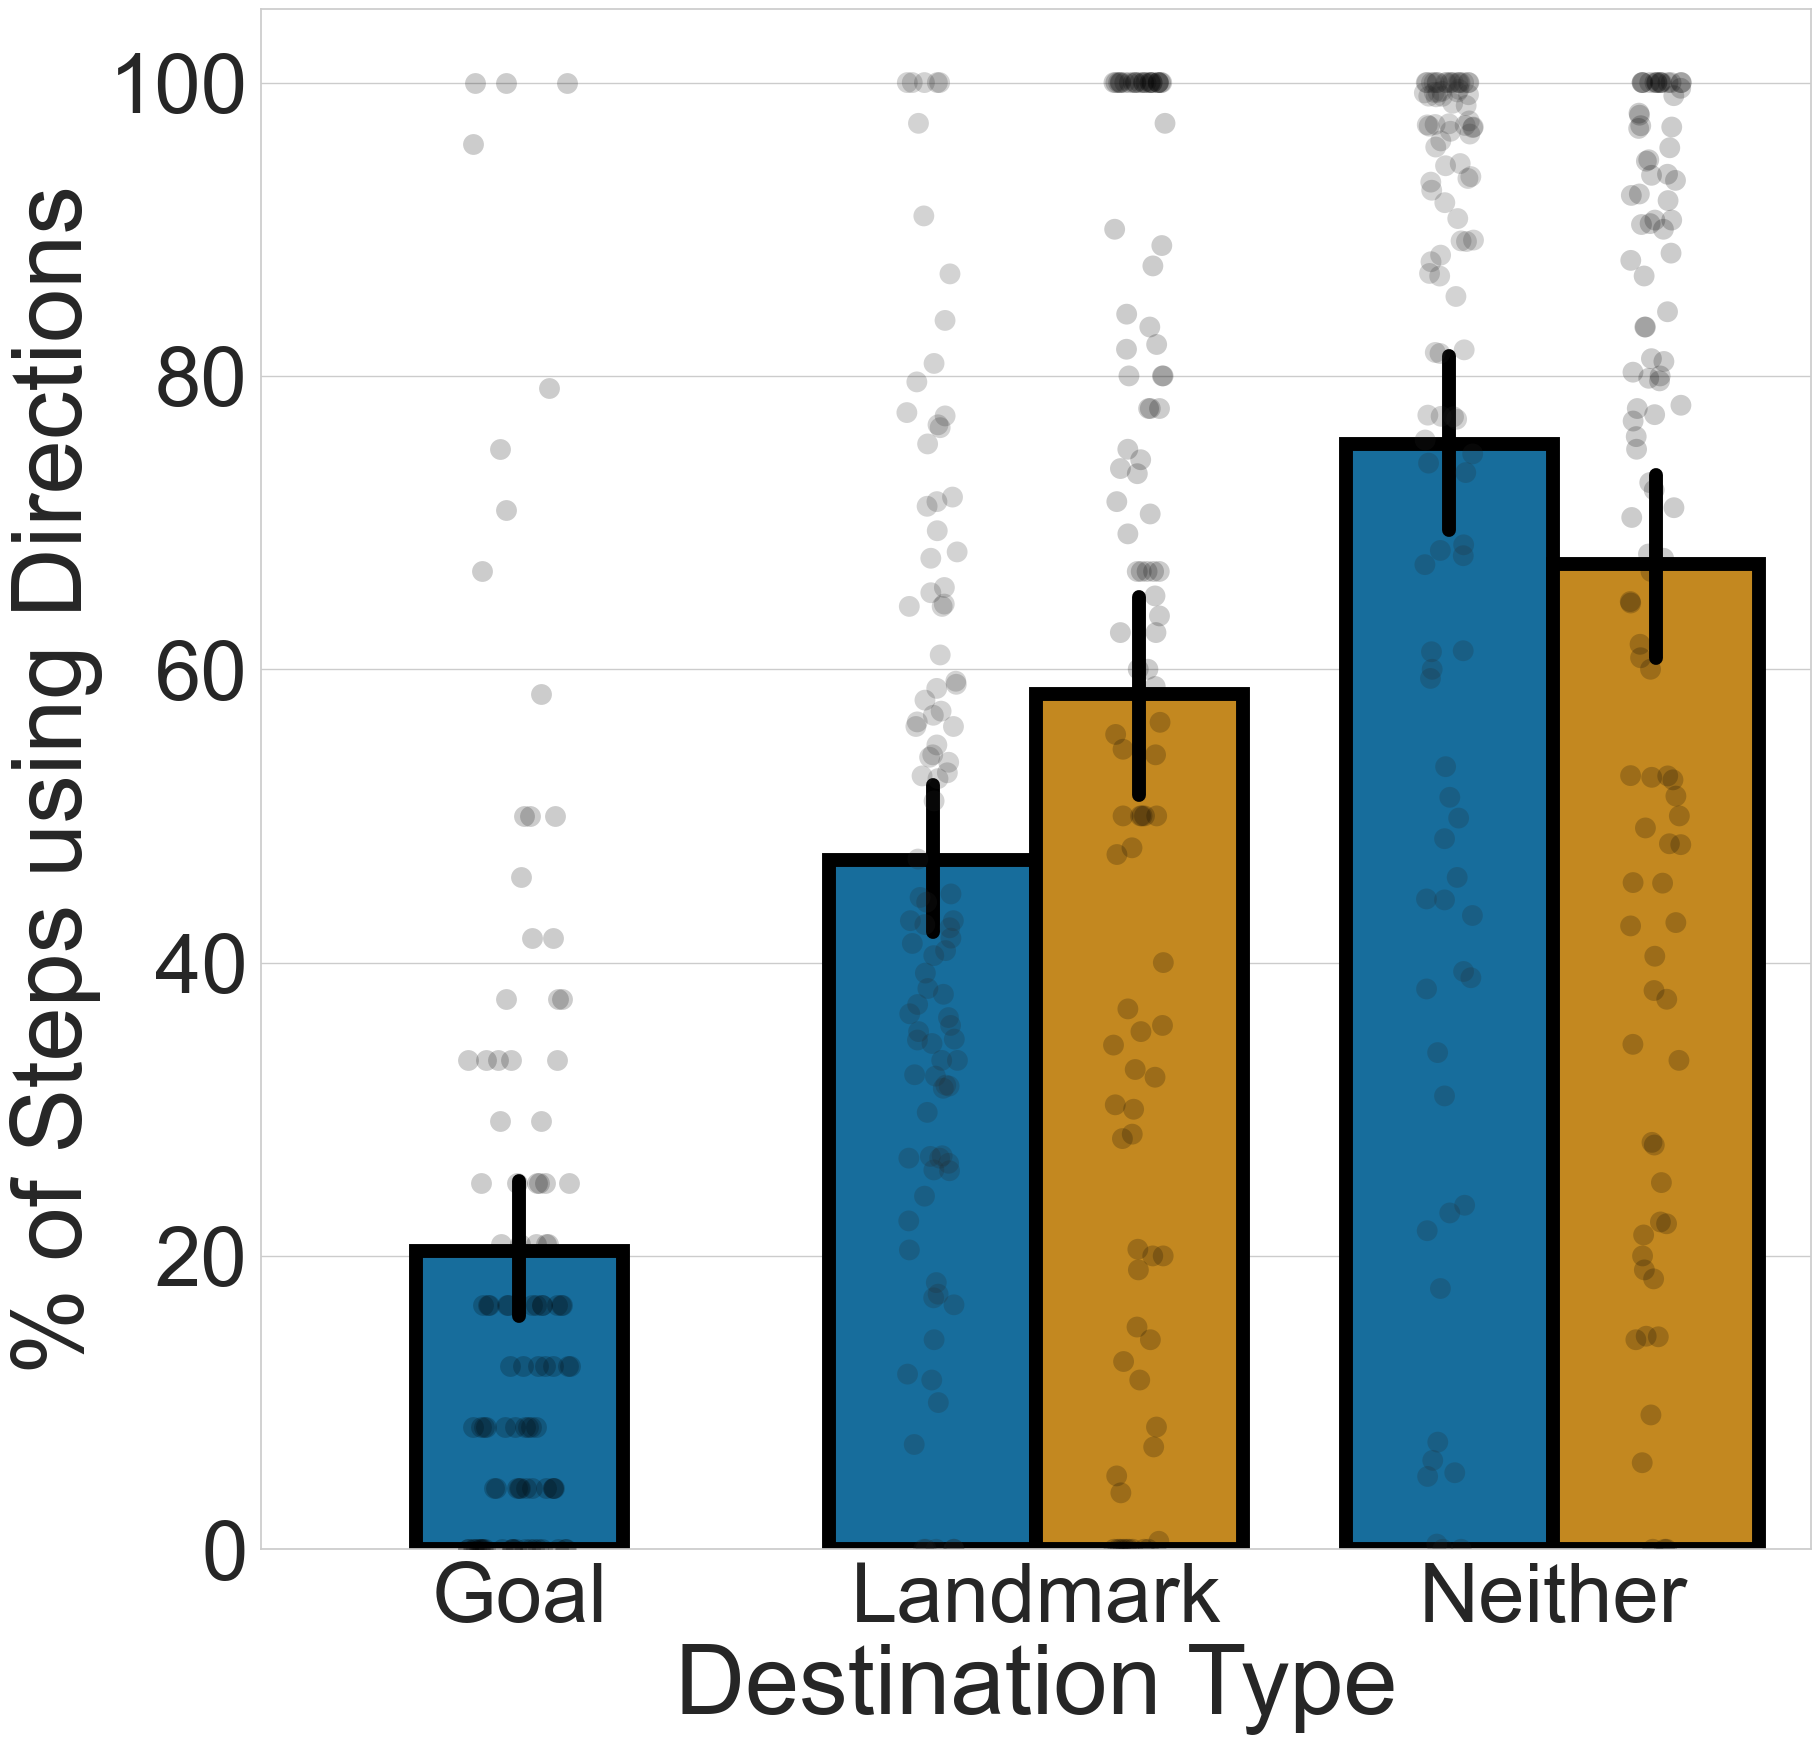

In [7]:
df2_steps['resptype'] = df2_steps['resptype'].astype('category')
df2_steps['prevvisited'] = df2_steps['prevvisited'].astype('str')
df2_steps['prevvisited'] = df2_steps['prevvisited'].astype('category')
df2_steps['newobjtype'] = df2_steps['newobjtype'].astype('category')
temp = df2_steps.reset_index().groupby(['partno', 'newobjtype', 'prevvisited'], as_index = False)['resptype'].value_counts(normalize = True, dropna = True)
# temp = temp[temp['resptype'] == 'd'].reset_index().groupby(['model', 'desttype', 'landmarkencountered'], as_index = False)['proportion'].mean()
temp = temp[temp['resptype'] == 'd']
temp.reset_index(drop = True, inplace = True)
temp = temp[~((temp['newobjtype'] == 'goal') & (temp['prevvisited'] == 'True'))]

fig = plt.figure(figsize = (20,20))

g = sns.barplot(x = 'newobjtype', y = 'proportion', hue = 'prevvisited', data = temp[temp['newobjtype'] != 'goal'], ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black',  alpha = 1, order = ['goal', 'landmark', 'none'])
g = sns.barplot(x = 'newobjtype', y = 'proportion', data = temp[temp['newobjtype'] == 'goal'],   ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black', hue_order = ['False', 'True'], alpha = 1, dodge = True, order = ['goal', 'landmark', 'none'], width = 0.4)

g2 = sns.stripplot(x = 'newobjtype', y = 'proportion', hue = 'prevvisited', dodge = 0.5, data = temp[temp['newobjtype'] != 'goal'], alpha = .2,  size = 15, color = 'black', hue_order = ['False', 'True'], order = ['goal', 'landmark', 'none'])
g2 = sns.stripplot(x = 'newobjtype', y = 'proportion',  data = temp[temp['newobjtype'] == 'goal'], alpha = .2,  size = 15, color = 'black',  order = ['goal', 'landmark', 'none'])
g.set_ylabel('% of Steps using Directions', fontsize = 70)
g.set_xlabel('Destination Type', fontsize = 70)
#font size

g.set_xticklabels(['Goal', 'Landmark', 'Neither'], fontsize = 60)
# no legend
g.get_legend().remove()
g.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
g.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize = 60)

In [57]:
df3_steps['freeorforced']

0        0
1        0
2        0
3        0
4        0
        ..
82869    1
82870    1
82871    1
82872    1
82873    1
Name: freeorforced, Length: 82874, dtype: int64

In [65]:
df3_steps[(df3_steps['freeorforced'] == 0)]

Unnamed: 0  currentxloc  currentyloc  newxloc  newyloc  trialno  \
0               0            5            3        4        3        1   
1               1            4            3        3        3        1   
2               2            3            3        2        3        1   
3               3            2            3        2        4        1   
4               4            2            4        1        4        1   
...           ...          ...          ...      ...      ...      ...   
38321       38321            2            3        2        4       23   
38322       38322            2            5        2        4       24   
38323       38323            2            4        2        3       24   
38324       38324            2            3        3        3       24   
38325       38325            3            3        4        3       24   

                     prolificid  stepno  blockno  goalxloc  ...  currloctype  \
0      5589c7cefdf99b18bd86cf31       0        1         3  ...   inner ring   
1      5589c7cefdf99b18bd86cf31       1        1         3  ...   inner ring   
2      5589c7cefdf99b18bd86cf31       2        1         3  ...   inner ring   
3      5589c7cefdf99b18bd86cf31       3        1         3  ...   outer ring   
4      5589c7cefdf99b18bd86cf31       4        1         3  ...   outer ring   
...                         ...     ...      ...       ...  ...          ...   
38321  64950eb7e2cb12bc4dc6d9d2       3        4         2  ...   outer ring   
38322  64950eb7e2cb12bc4dc6d9d2       0        4         4  ...   outer ring   
38323  64950eb7e2cb12bc4dc6d9d2       1        4         4  ...   outer ring   
38324  64950eb7e2cb12bc4dc6d9d2       2        4         4  ...   outer ring   
38325  64950eb7e2cb12bc4dc6d9d2       3        4         4  ...   inner ring   

        edge  landmarkpresorder  currlandmarkpresorder  \
0      False                 []                     []   
1      False                 []                     []   
2      False                [3]                     []   
3      False                 []                    [3]   
4      False                 []                     []   
...      ...                ...                    ...   
38321  False                 []                     []   
38322  False                 []                     []   
38323  False                 []                     []   
38324  False            [3, 11]                     []   
38325  False                 []                [3, 11]   

       correctoverchancelevel sbsod_mediansplit nsq_mediansplit  \
0                        0.50            better          better   
1                        0.50            better          better   
2                       -0.25            better          better   
3                        0.50            better          better   
4                       -0.50            better          better   
...                       ...               ...             ...   
38321                    0.75            better          better   
38322                    0.50            better          better   
38323                    0.50            better          better   
38324                    0.75            better          better   
38325                    0.75            better          better   

      accuracyoverchance condition  day  
0                   0.50      free  1.0  
1                   0.50      free  1.0  
2                  -0.25      free  1.0  
3                   0.50      free  1.0  
4                  -0.50      free  1.0  
...                  ...       ...  ...  
38321               0.75      free  1.0  
38322               0.50      free  1.0  
38323               0.50      free  1.0  
38324               0.75      free  1.0  
38325               0.75      free  1.0  

[16754 rows x 49 columns]

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_98238/337387994.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.barplot(x = 'newobjtype', y = 'proportion', hue = 'prevvisited', data = temp[temp['newobjtype'] != 'goal'], ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black',  alpha = 1, order = ['goal', 'landmark', 'none'])
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_98238/337387994.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.barplot(x = 'newobjtype', y = 'proportion', data = temp[temp['newobjtype'] == 'goal'],   ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black', hue_order = ['False', 'True'], alpha = 1, dodge = True, order = ['goal', 'landmark', 'none'], width = 0.4)
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/site-

[Text(0, 0.0, '0'),
 Text(0, 0.2, '20'),
 Text(0, 0.4, '40'),
 Text(0, 0.6, '60'),
 Text(0, 0.8, '80'),
 Text(0, 1.0, '100')]

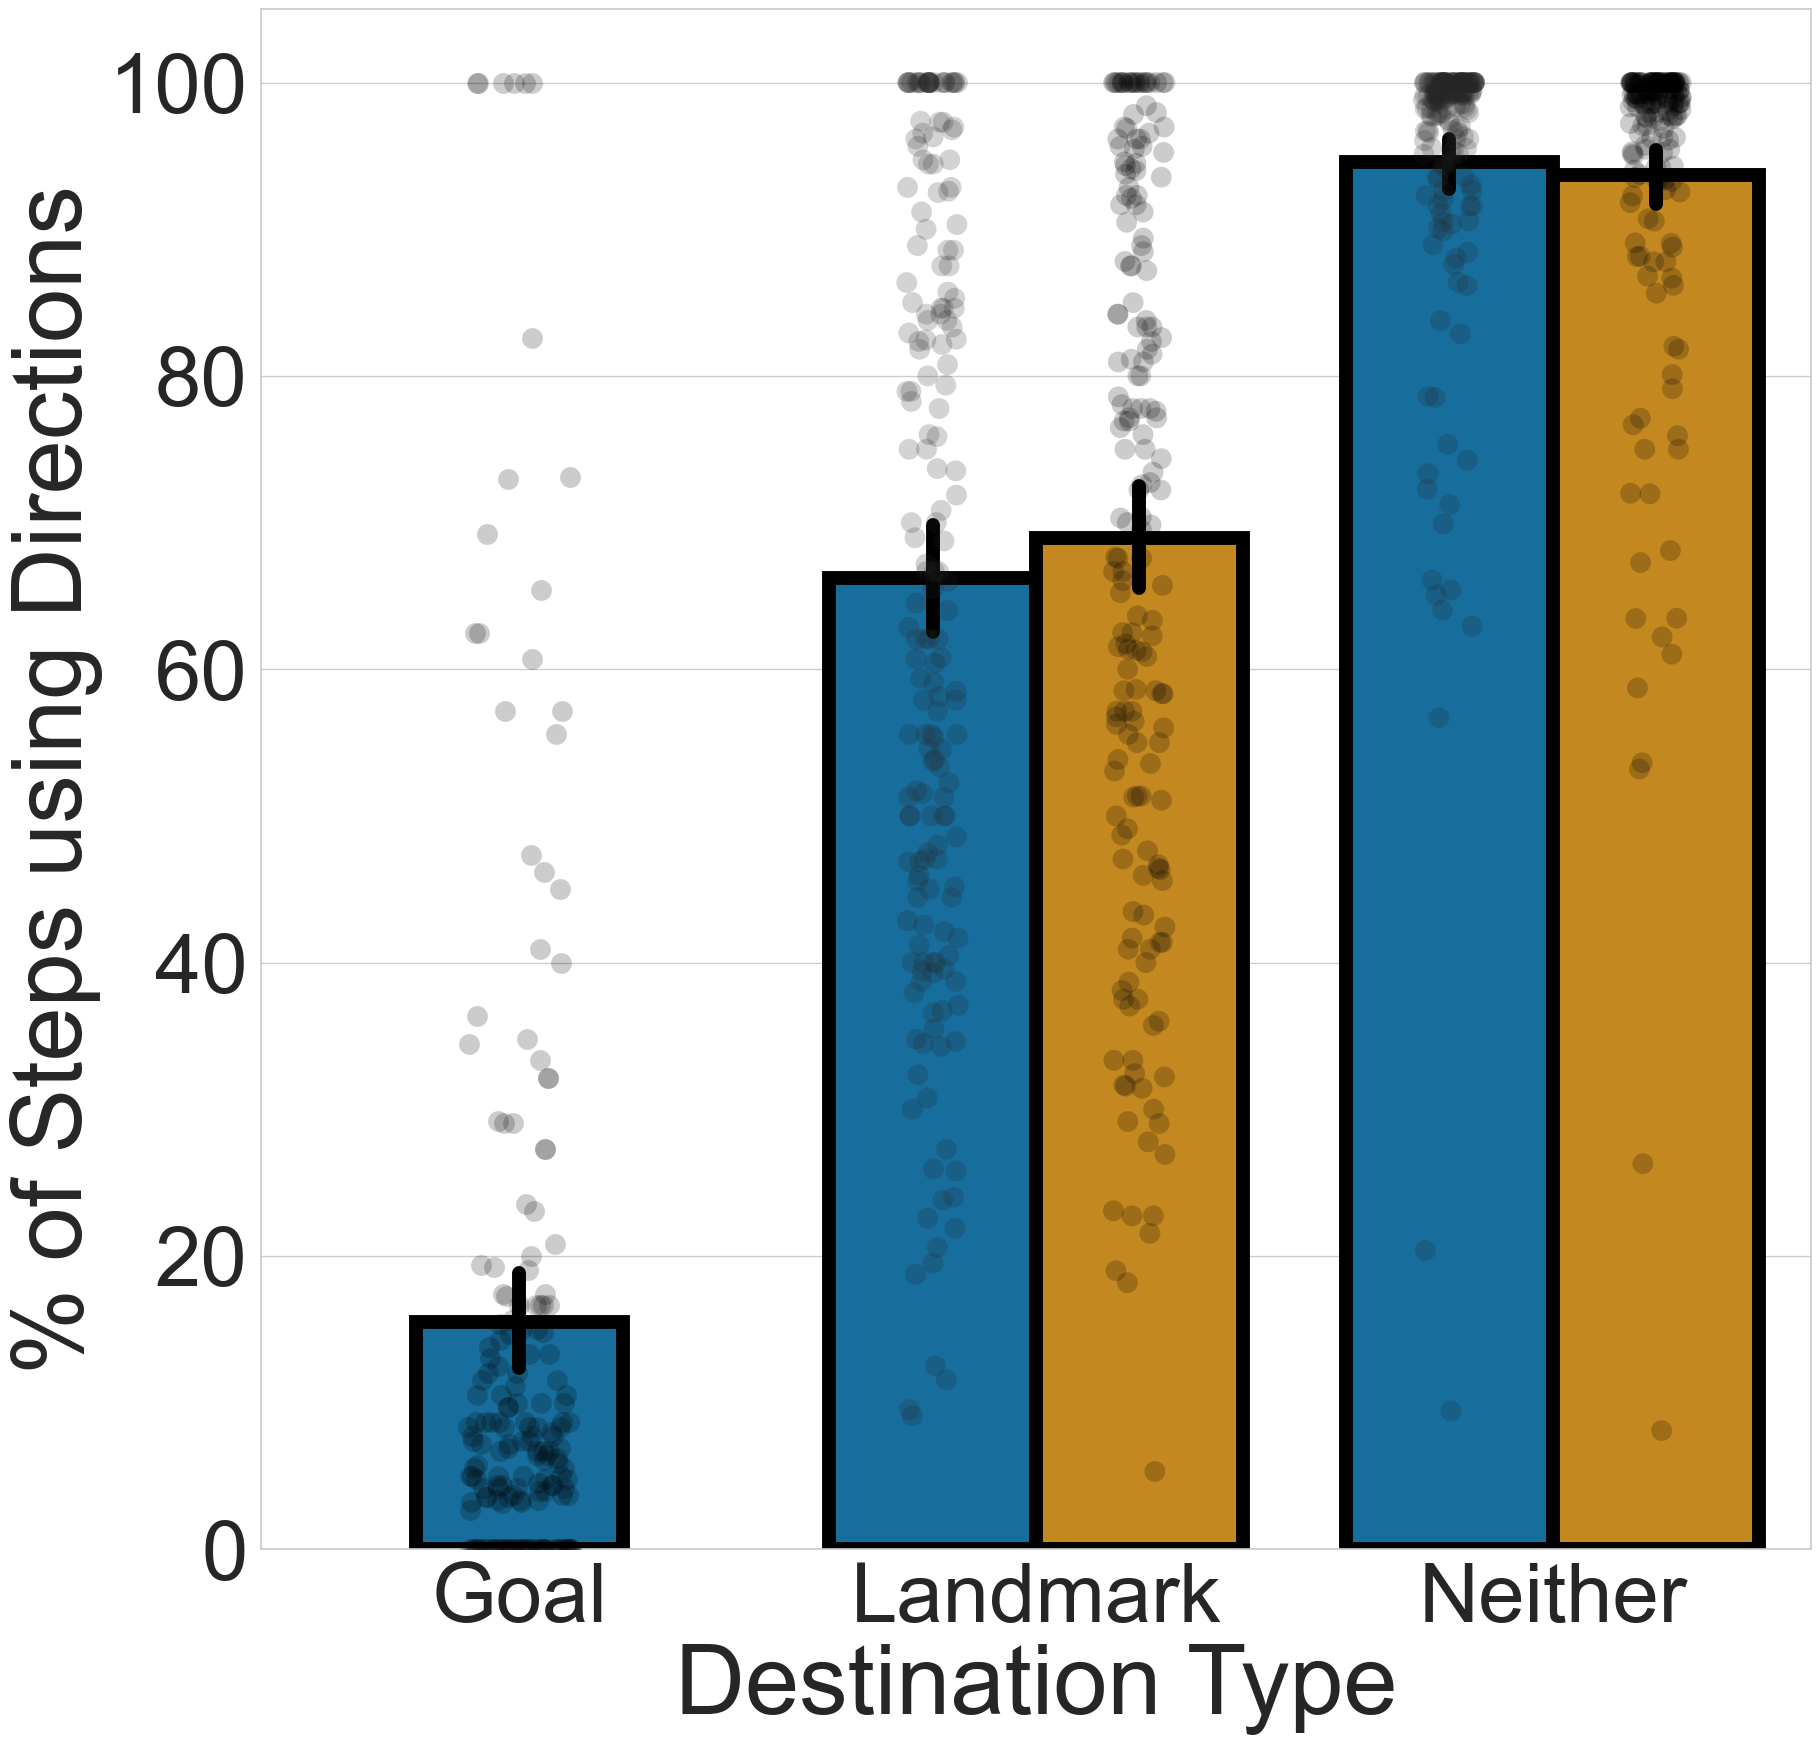

In [9]:
df3_steps['resptype'] = df3_steps['resptype'].astype('category')
df3_steps['prevvisited'] = df3_steps['prevvisited'].astype('str')
df3_steps['prevvisited'] = df3_steps['prevvisited'].astype('category')
df3_steps['newobjtype'] = df3_steps['newobjtype'].astype('category')
temp = df3_steps.reset_index().groupby(['partno', 'newobjtype', 'prevvisited'], as_index = False)['resptype'].value_counts(normalize = True, dropna = True)
# temp = temp[temp['resptype'] == 'd'].reset_index().groupby(['model', 'desttype', 'landmarkencountered'], as_index = False)['proportion'].mean()
temp = temp[temp['resptype'] == 'd']
temp.reset_index(drop = True, inplace = True)
temp = temp[~((temp['newobjtype'] == 'goal') & (temp['prevvisited'] == 'True'))]

fig = plt.figure(figsize = (20,20))

g = sns.barplot(x = 'newobjtype', y = 'proportion', hue = 'prevvisited', data = temp[temp['newobjtype'] != 'goal'], ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black',  alpha = 1, order = ['goal', 'landmark', 'none'])
g = sns.barplot(x = 'newobjtype', y = 'proportion', data = temp[temp['newobjtype'] == 'goal'],   ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black', hue_order = ['False', 'True'], alpha = 1, dodge = True, order = ['goal', 'landmark', 'none'], width = 0.4)

g2 = sns.stripplot(x = 'newobjtype', y = 'proportion', hue = 'prevvisited', dodge = 0.5, data = temp[temp['newobjtype'] != 'goal'], alpha = .2,  size = 15, color = 'black', hue_order = ['False', 'True'], order = ['goal', 'landmark', 'none'])
g2 = sns.stripplot(x = 'newobjtype', y = 'proportion',  data = temp[temp['newobjtype'] == 'goal'], alpha = .2,  size = 15, color = 'black',  order = ['goal', 'landmark', 'none'])
g.set_ylabel('% of Steps using Directions', fontsize = 70)
g.set_xlabel('Destination Type', fontsize = 70)
#font size

g.set_xticklabels(['Goal', 'Landmark', 'Neither'], fontsize = 60)
# no legend
g.get_legend().remove()
g.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
g.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize = 60)

/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_72079/721185368.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

[Text(0, 0.0, '0'),
 Text(0, 0.2, '20'),
 Text(0, 0.4, '40'),
 Text(0, 0.6000000000000001, '60'),
 Text(0, 0.8, '80'),
 Text(0, 1.0, '100'),
 Text(0, 1.2000000000000002, '')]

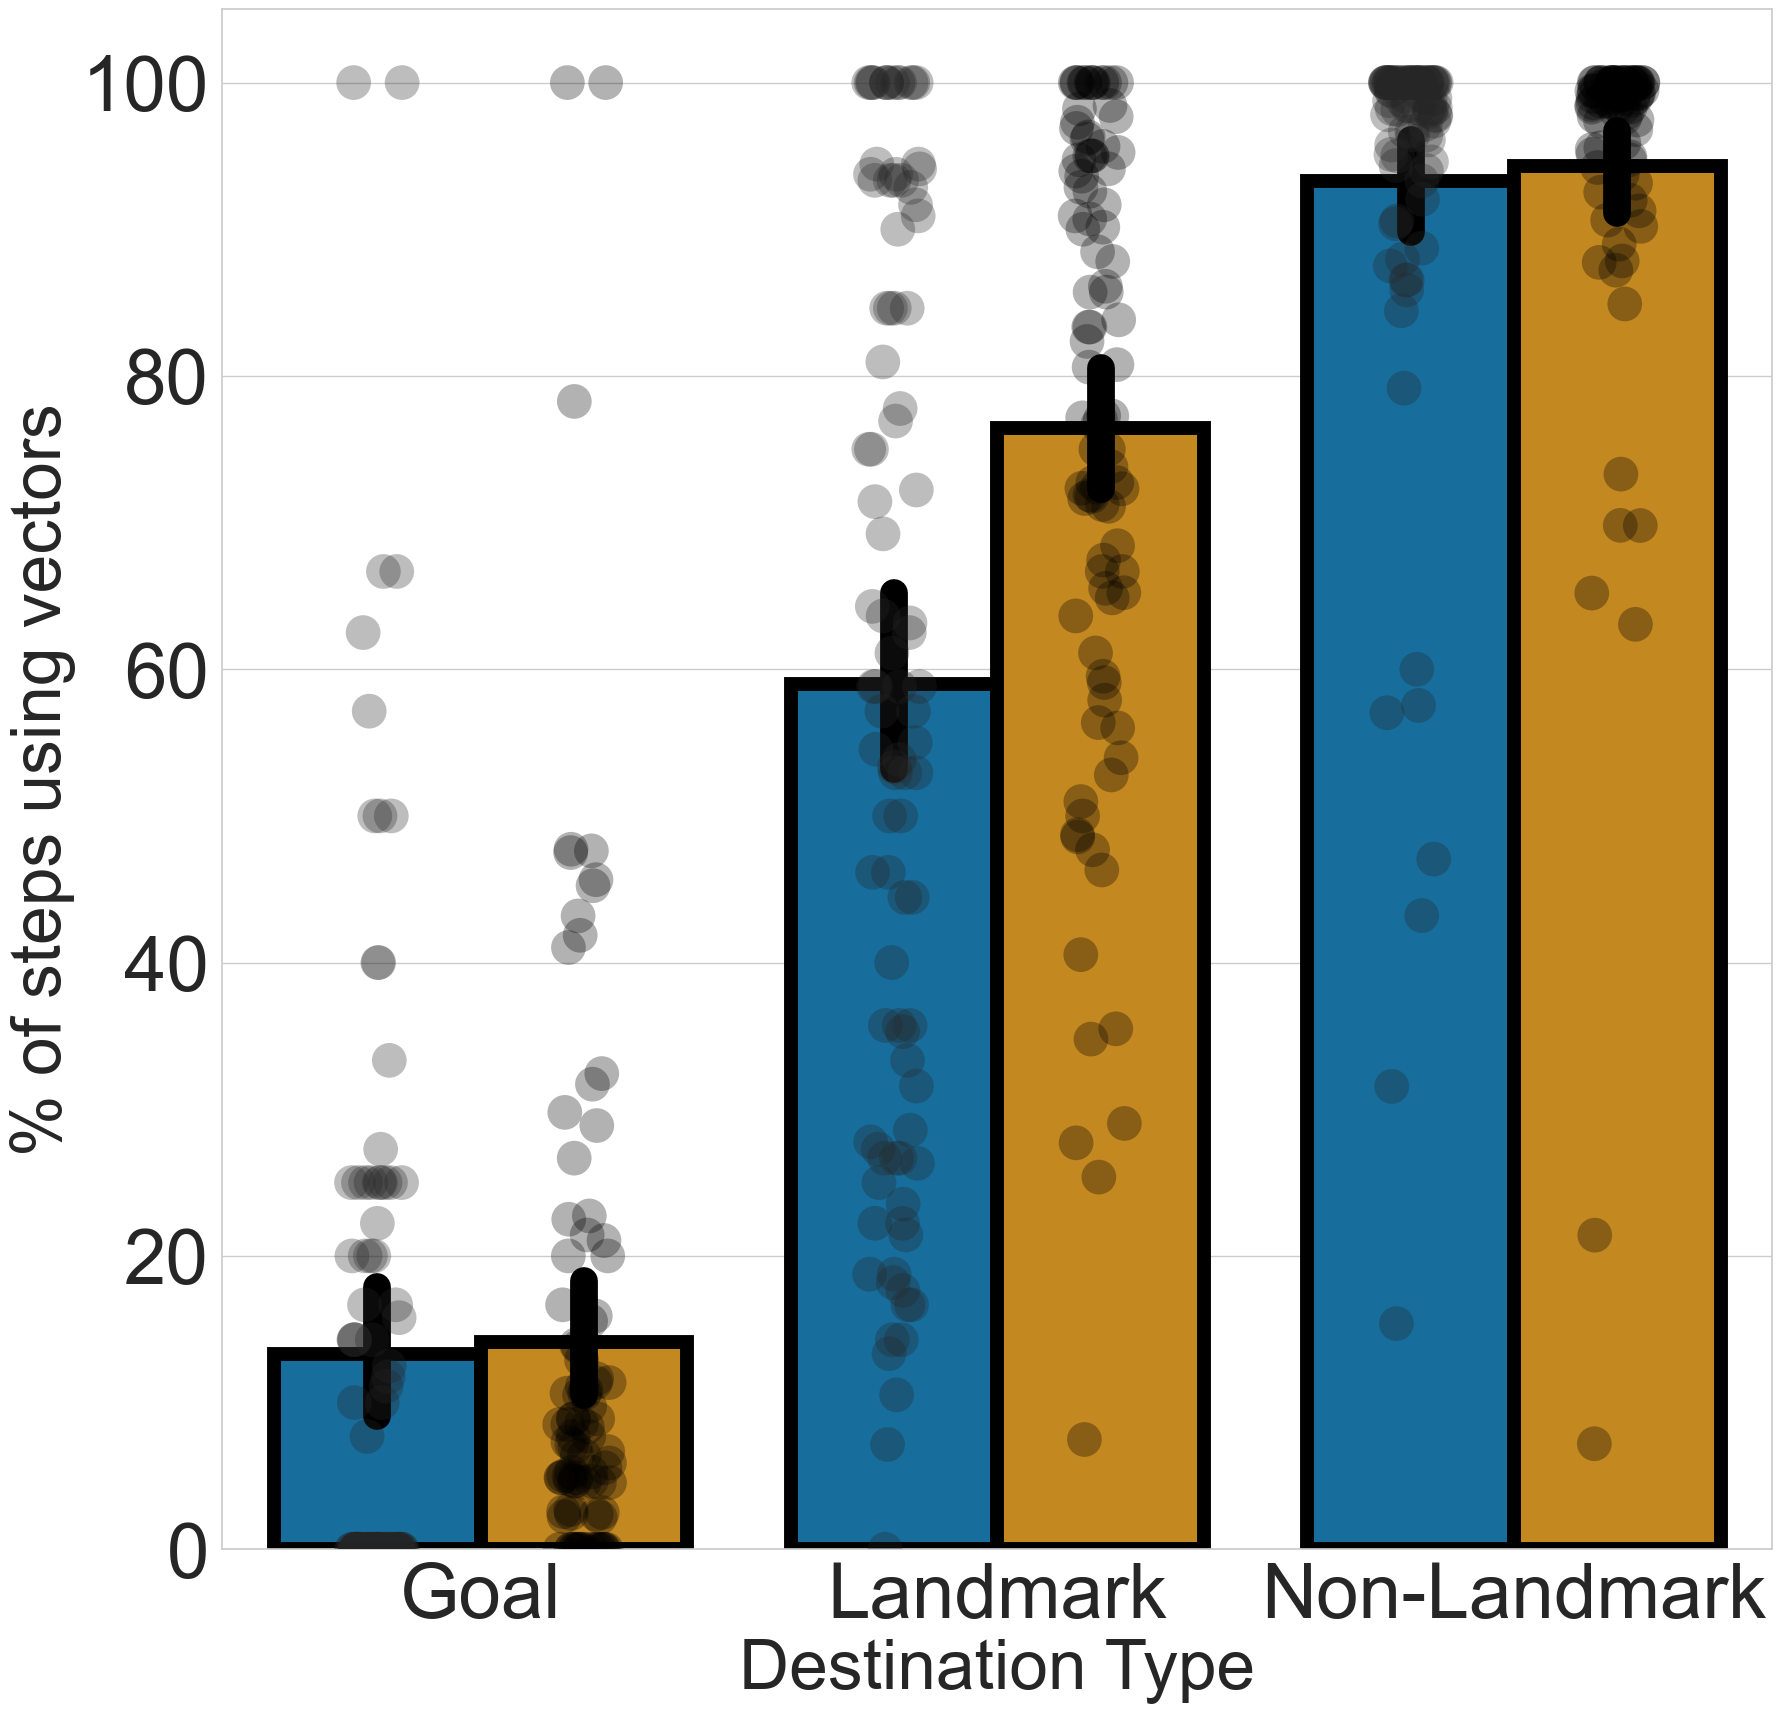

In [57]:
df3_steps['resptype'] = df3_steps['resptype'].astype('category')
df3_steps['landmarkencountered'] = df3_steps['landmarkencountered'].astype(str)
temp = df3_steps[(df3_steps['day'] == 2) & (df3_steps['condition'] == 'forced')].groupby(['partno', 'newobjtype', 'landmarkencountered'], as_index = False)['resptype'].value_counts(normalize = True, dropna = True)
temp.reset_index(drop = True, inplace = True)
fig = plt.figure(figsize = (20,20))

g = sns.barplot(x = 'newobjtype', y = 'proportion', hue = 'landmarkencountered', data = temp[temp['resptype'] == 'd'],   ci = 95, palette = 'colorblind', errwidth = 20, edgecolor = 'black', linewidth = 10, errcolor='black', hue_order = ['False', 'True'])


g2 = sns.stripplot(x = 'newobjtype', y = 'proportion', hue = 'landmarkencountered', dodge = 0.5, data = temp[temp['resptype'] == 'd'], alpha = .3,  size = 25,  hue_order = ['False', 'True'], color = 'black')

g.set_ylabel('% of steps using vectors', fontsize = 50)
g.set_xlabel('Destination Type', fontsize = 50)
#font size

g.set_xticklabels(['Goal','Landmark', 'Non-Landmark'])
# no legend
g.get_legend().remove()
g.set_yticklabels(['0', '20', '40', '60', '80', '100'])



/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

[Text(0, 0.0, '0'),
 Text(0, 0.2, '20'),
 Text(0, 0.4, '40'),
 Text(0, 0.6000000000000001, '60'),
 Text(0, 0.8, '80'),
 Text(0, 1.0, '100'),
 Text(0, 1.2000000000000002, '')]

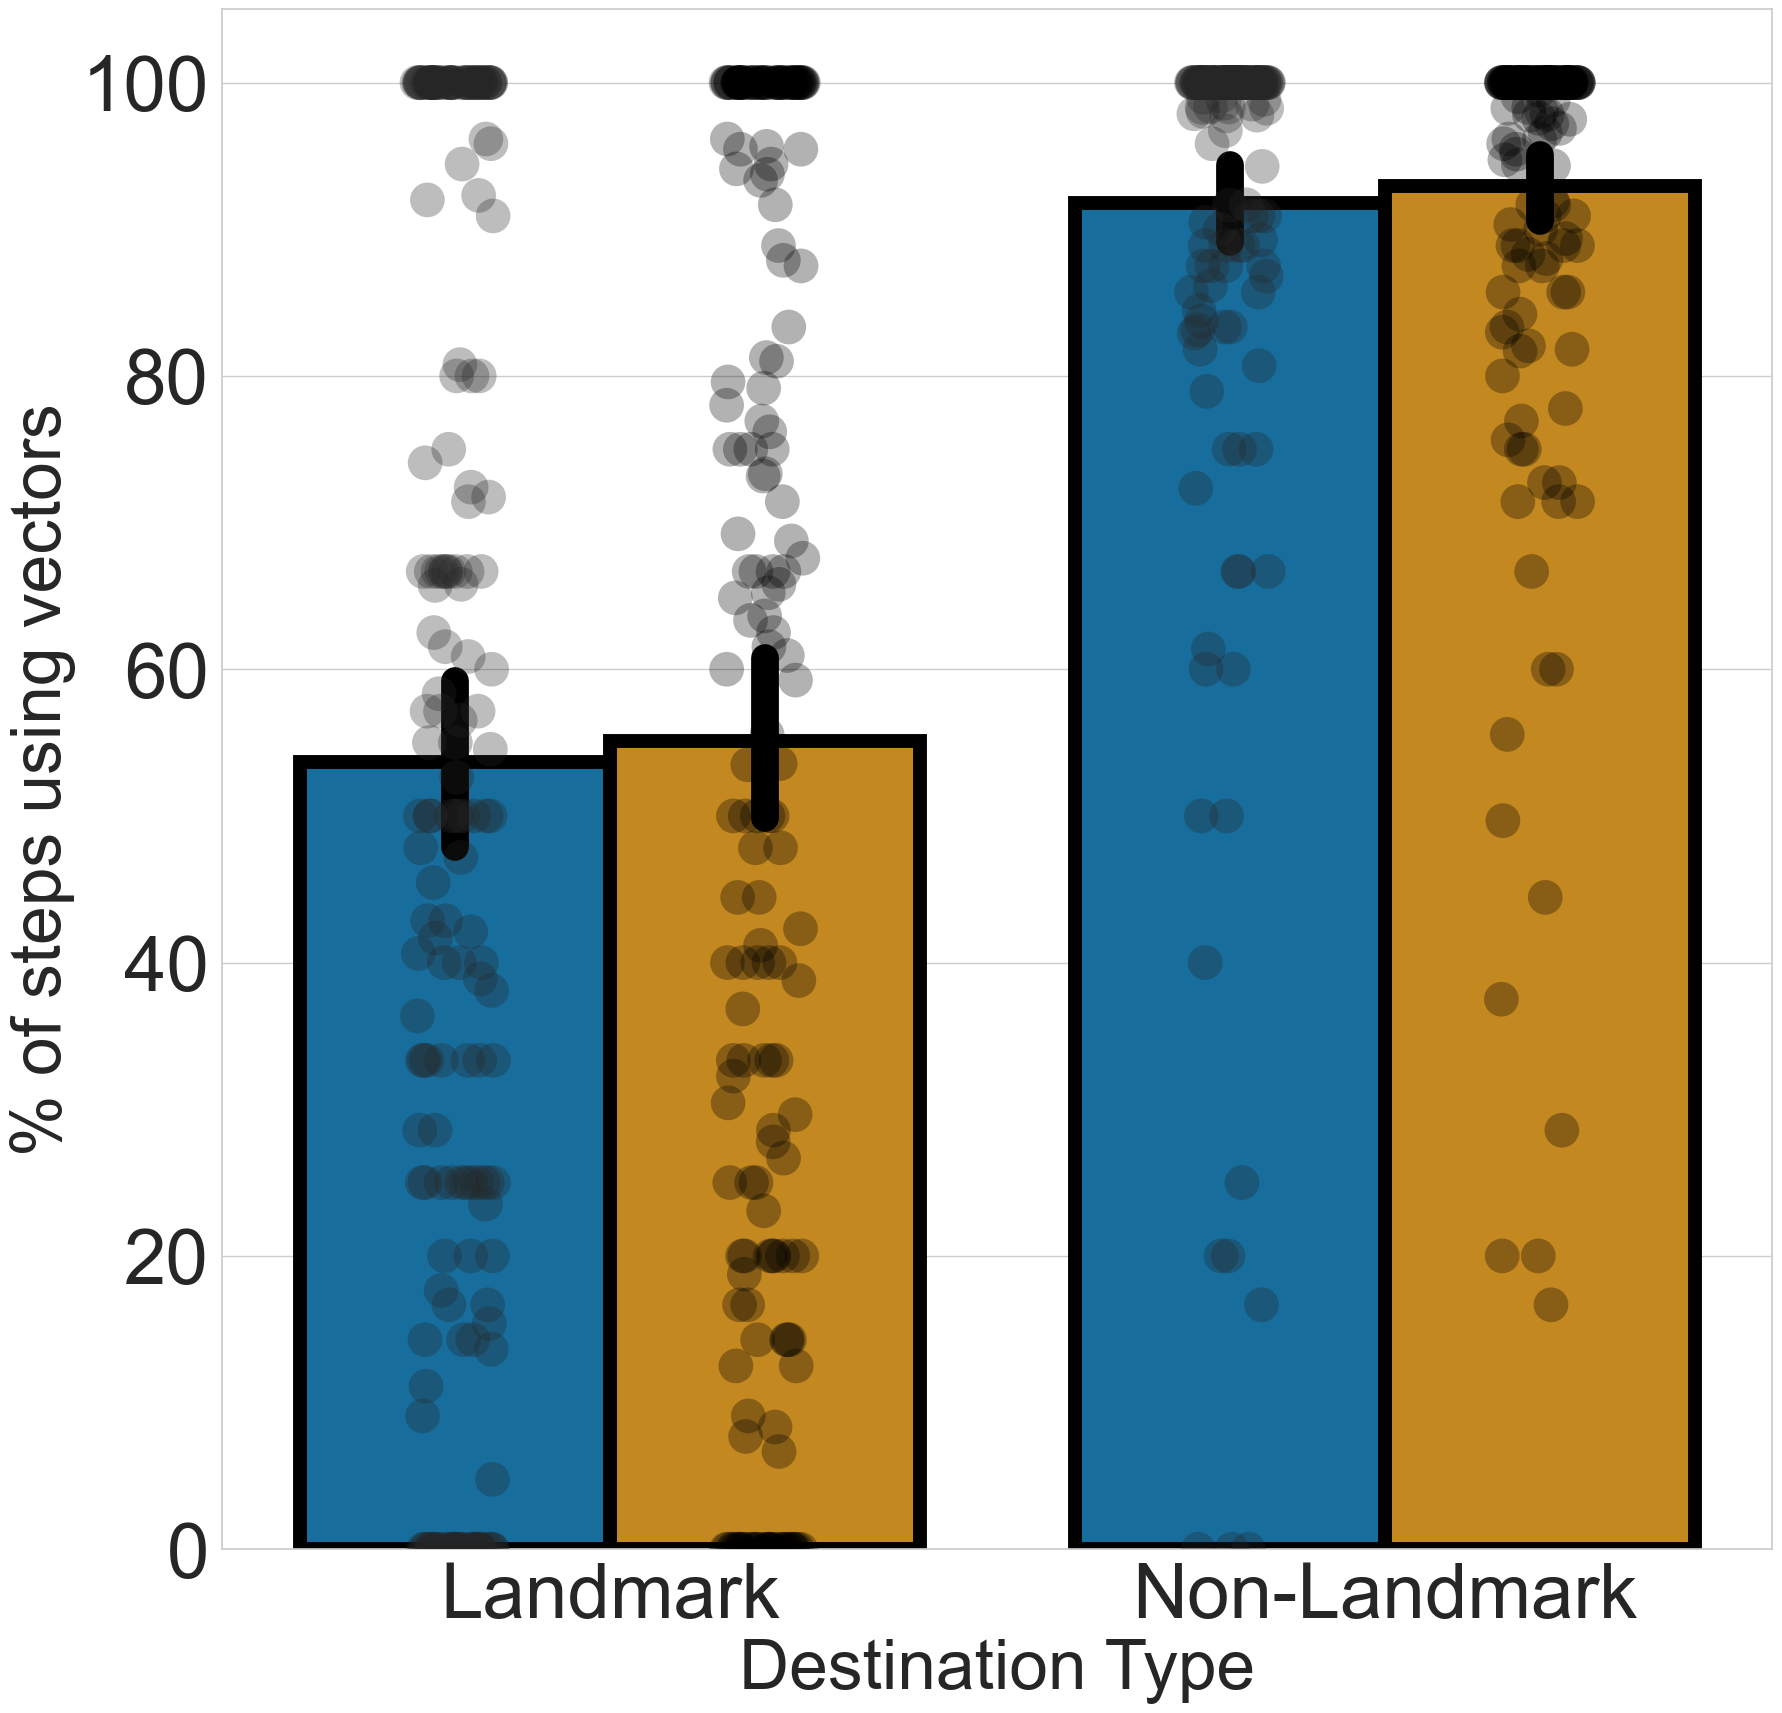

In [62]:
df3_steps['prevvisited'] = df3_steps['prevvisited'].astype(str)
temp = df3_steps[(df3_steps['day'] == 1)].groupby(['partno', 'newobjtype', 'prevvisited'], as_index = False)['resptype'].value_counts(normalize = True, dropna = True)
temp = temp[temp['newobjtype'] != 'goal']
temp.reset_index(drop = True, inplace = True)
fig = plt.figure(figsize = (20,20))

g = sns.barplot(x = 'newobjtype', y = 'proportion', hue = 'prevvisited', data = temp[temp['resptype'] == 'd'],   ci = 95, palette = 'colorblind', errwidth = 20, edgecolor = 'black', linewidth = 10, errcolor='black')


g2 = sns.stripplot(x = 'newobjtype', y = 'proportion', hue = 'prevvisited', dodge = 0.5, data = temp[temp['resptype'] == 'd'], alpha = .3,  size = 25, color = 'black')

g.set_ylabel('% of steps using vectors', fontsize = 50)
g.set_xlabel('Destination Type', fontsize = 50)
#font size

g.set_xticklabels(['Landmark', 'Non-Landmark'])
# no legend
g.get_legend().remove()
g.set_yticklabels(['0', '20', '40', '60', '80', '100'])



In [34]:
#statistics
#lin regress model from equation
import statsmodels.api as sm

df2_part['resp_directionperc_dm'] = df2_part['resp_directionperc'] - df2_part['resp_directionperc'].mean()
df2_part['resp_directionperc_dm2'] = df2_part['resp_directionperc_dm']**2
# df2_part['resp_directionperc_dm'] = (df2_part['resp_directionperc_dm'] - df2_part['resp_directionperc_dm'].mean())/df2_part['resp_directionperc_dm'].std()
# df2_part['resp_directionperc_dm2'] = (df2_part['resp_directionperc_dm2'] - df2_part['resp_directionperc_dm2'].mean())/df2_part['resp_directionperc_dm2'].std()
df2_part['resp_logsteps_dm'] = df2_part['resp_logsteps'] - df2_part['resp_logsteps'].mean()

reg_formula = 'resp_logsteps ~ resp_directionperc_dm*obstacles + resp_directionperc_dm2*obstacles'
reg_formula = 'resp_logsteps ~ resp_directionperc_dm + resp_directionperc_dm2'
reg_model = sm.OLS.from_formula(reg_formula, data = df2_part).fit()
reg_model.summary()

/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          resp_logsteps   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     32.75
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.35e-11
Time:                        17:40:09   Log-Likelihood:                -23.488
No. Observations:                 100   AIC:                             52.98
Df Residuals:                      97   BIC:                             60.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.2327      0.041     54.975      0.000       2.152       2.313
resp_directionperc_dm     -0.6165      0.174     -3.538      0.001      -0.962      -0.271
resp_directionperc_dm2     1.3710      0.453      3.028      0.003       0.472       2.270
==============================================================================
Omnibus:                       32.879   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.031
Skew:                           1.295   Prob(JB):                     4.59e-15
Kurtosis:                       6.024   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
df2['resp_directionperc'] = [df2_part['resp_directionperc'][df2_part['partno'] == x].iloc[0] for x in df2['partno']]
df2['resp_directionperc_dm'] = df2['resp_directionperc'] - df2['resp_directionperc'].mean()
df2['resp_directionperc_dm2'] = df2['resp_directionperc_dm']**2


In [65]:
df2['sbsodscore'] = [df2_part[df2_part['prolificid'] == x]['sbsodscore'].iloc[0] for x in df2['prolificid']]

In [72]:
#lin regress df2_part sbsodscore and resp_directionperc
import statsmodels.api as sm
reg_formula = 'sbsodscore ~ resp_directionperc'
reg_model = sm.OLS.from_formula(reg_formula, data = df2_part).fit()
reg_model.summary()

/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sbsodscore   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1947
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.660
Time:                        16:55:43   Log-Likelihood:                -153.34
No. Observations:                 100   AIC:                             310.7
Df Residuals:                      98   BIC:                             315.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8670      0.314     12.334      0.000       3.245       4.489
resp_directionperc     0.2080      0.471      0.441      0.660      -0.727       1.143
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.278
Skew:                           0.129   Prob(JB):                        0.870
Kurtosis:                       2.993   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
%%R -i df2
library(lme4)
library(lmerTest)
library(lmtest)

df2$sbsodscore <- df2$sbsodscore - mean(df2$sbsodscore)
model = lmer(resp_logsteps ~ trialno + sbsodscore + I(sbsodscore ^ 2) + (1 + trialno + sbsodscore + I(sbsodscore ^ 2)|partno), data = df2)
summary(model)

model2 = lmer(resp_logsteps ~ trialno + sbsodscore + I(sbsodscore ^ 2) + (1 + trialno|partno), data = df2)
summary(model2)
print(lrtest(model, model2))

model3 = lmer(resp_logsteps ~ trialno + sbsodscore + I(sbsodscore ^ 2) + (1|prolificid), data = df2)
summary(model3)
print(lrtest(model2, model3))




/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "resp_explorexclicks". Fall back to string conversion. The error is: integer 64422746634575537 does not fit 'int'
  warnings.warn('Error while trying to convert '
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "resp_exploreyclicks". Fall back to string conversion. The error is: integer 76472553553644736 does not fit 'int'
  warnings.warn('Error while trying to convert '


Likelihood ratio test

Model 1: resp_logsteps ~ trialno + sbsodscore + I(sbsodscore^2) + (1 + 
    trialno + sbsodscore + I(sbsodscore^2) | partno)
Model 2: resp_logsteps ~ trialno + sbsodscore + I(sbsodscore^2) + (1 + 
    trialno | partno)
  #Df  LogLik Df Chisq Pr(>Chisq)
1  15 -2890.5                    
2   8 -2891.8 -7 2.601     0.9193
Likelihood ratio test

Model 1: resp_logsteps ~ trialno + sbsodscore + I(sbsodscore^2) + (1 + 
    trialno | partno)
Model 2: resp_logsteps ~ trialno + sbsodscore + I(sbsodscore^2) + (1 | 
    prolificid)
  #Df  LogLik Df  Chisq Pr(>Chisq)  
1   8 -2891.8                       
2   6 -2894.6 -2 5.6882    0.05819 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [69]:
%%R
summary(model2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: resp_logsteps ~ trialno + sbsodscore + I(sbsodscore^2) + (1 +  
    trialno | partno)
   Data: df2

REML criterion at convergence: 5783.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1848 -0.7490 -0.2026  0.6477  3.6544 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 partno   (Intercept) 0.161663 0.40207       
          trialno     0.000199 0.01411  -0.40
 Residual             0.589262 0.76763       
Number of obs: 2400, groups:  partno, 100

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       2.399718   0.058997 114.233189  40.676  < 2e-16 ***
trialno          -0.008434   0.002667  99.119945  -3.162  0.00208 ** 
sbsodscore       -0.009546   0.035851  97.136219  -0.266  0.79059    
I(sbsodscore^2)   0.014005   0.022703  97.136219   0.617  0.53877    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’



Correlation of Fixed Effects:
            (Intr) trialn sbsdsc
trialno     -0.550              
sbsodscore   0.040  0.000       
I(sbsdsc^2) -0.485  0.000 -0.082
optimizer (nloptwrap) convergence code: 0 (OK)
Model failed to converge with max|grad| = 0.0256459 (tol = 0.002, component 1)



In [43]:
df2_steps['resp_directionperc_dm'] = [df2_part['resp_directionperc_dm'][df2_part['prolificid'] == x].iloc[0] for x in df2_steps['partno']]
df2_steps['resp_directionperc_dm2'] = [df2_part['resp_directionperc_dm2'][df2_part['prolificid'] == x].iloc[0] for x in df2_steps['partno']]


In [44]:
%%R -i df2_steps

model <- glmer(correct ~ resp_directionperc_dm + resp_directionperc_dm2 + (1 + resp_directionperc_dm + resp_directionperc_dm2|partno), data = df2_steps, family = binomial)
summary(model)

/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "landmarkxlocs". Fall back to string conversion. The error is: integer 45253723427576653 does not fit 'int'
  warnings.warn('Error while trying to convert '
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "landmarkylocs". Fall back to string conversion. The error is: integer 47564326564563433 does not fit 'int'
  warnings.warn('Error while trying to convert '
R[write to console]: boundary (singular) fit: see help('isSingular')



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: correct ~ resp_directionperc_dm + resp_directionperc_dm2 + (1 +  
    resp_directionperc_dm + resp_directionperc_dm2 | partno)
   Data: df2_steps

     AIC      BIC   logLik deviance df.resid 
 50648.0  50725.1 -25315.0  50630.0    38593 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9555 -0.7853 -0.6846  1.1683  1.7995 

Random effects:
 Groups Name                   Variance Std.Dev. Corr       
 partno (Intercept)            0.06938  0.2634              
        resp_directionperc_dm  0.20972  0.4580   -0.54      
        resp_directionperc_dm2 1.97074  1.4038   -0.88  0.88
Number of obs: 38602, groups:  partno, 100

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -0.67229    0.03468 -19.388   <2e-16 ***
resp_directionperc_dm  -0.37878    0.15403  -2.459   0.0139 *  
resp_directionp

In [45]:
%%R -i df2_steps
model2 <- glmer(correct ~ resp_directionperc_dm + resp_directionperc_dm2 + (1 + resp_directionperc_dm|partno), data = df2_steps, family = binomial)
summary(model2)
print(lrtest(model, model2))

/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "landmarkxlocs". Fall back to string conversion. The error is: integer 45253723427576653 does not fit 'int'
  warnings.warn('Error while trying to convert '
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "landmarkylocs". Fall back to string conversion. The error is: integer 47564326564563433 does not fit 'int'
  warnings.warn('Error while trying to convert '
R[write to console]: boundary (singular) fit: see help('isSingular')



Likelihood ratio test

Model 1: correct ~ resp_directionperc_dm + resp_directionperc_dm2 + (1 + 
    resp_directionperc_dm + resp_directionperc_dm2 | partno)
Model 2: correct ~ resp_directionperc_dm + resp_directionperc_dm2 + (1 + 
    resp_directionperc_dm | partno)
  #Df LogLik Df  Chisq Pr(>Chisq)
1   9 -25315                     
2   6 -25318 -3 5.3005     0.1511


In [47]:
%%R
summary(model2)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod

]
 Family: binomial  ( logit )
Formula: correct ~ resp_directionperc_dm + resp_directionperc_dm2 + (1 +  
    resp_directionperc_dm | partno)
   Data: df2_steps

     AIC      BIC   logLik deviance df.resid 
 50647.3  50698.7 -25317.7  50635.3    38596 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9564 -0.7829 -0.6838  1.1795  1.8337 

Random effects:
 Groups Name                  Variance Std.Dev. Corr
 partno (Intercept)           0.04733  0.2176       
        resp_directionperc_dm 0.01765  0.1328   1.00
Number of obs: 38602, groups:  partno, 100

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -0.67205    0.03286 -20.452  < 2e-16 ***
resp_directionperc_dm  -0.42605    0.15457  -2.756  0.00585 ** 
resp_directionperc_dm2  0.43312    0.36520   1.186  0.23563    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) rsp_d_
rsp_drctnp_ -0.403       
rsp

In [49]:
%%R 
model3 <- glmer(correct ~ resp_directionperc_dm + resp_directionperc_dm2 + (1|partno), data = df2_steps, family = binomial)
summary(model3)
lrtest(model2, model3)

Likelihood ratio test

Model 1: correct ~ resp_directionperc_dm + resp_directionperc_dm2 + (1 + 
    resp_directionperc_dm | partno)
Model 2: correct ~ resp_directionperc_dm + resp_directionperc_dm2 + (1 | 
    partno)
  #Df LogLik Df  Chisq Pr(>Chisq)
1   6 -25318                     
2   4 -25318 -2 1.5295     0.4654


In [50]:
%%R 
summary(model3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: correct ~ resp_directionperc_dm + resp_directionperc_dm2 + (1 |  
    partno)
   Data: df2_steps

     AIC      BIC   logLik deviance df.resid 
 50644.8  50679.1 -25318.4  50636.8    38598 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9600 -0.7826 -0.6877  1.1780  1.7842 

Random effects:
 Groups Name        Variance Std.Dev.
 partno (Intercept) 0.04604  0.2146  
Number of obs: 38602, groups:  partno, 100

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -0.68672    0.03235 -21.225   <2e-16 ***
resp_directionperc_dm  -0.33611    0.13474  -2.495   0.0126 *  
resp_directionperc_dm2  0.69594    0.34614   2.011   0.0444 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) rsp_d_
rsp_drctnp_ -0.407       
rsp_drctn_2 -0.638

In [52]:
#load df_free, df_part_free, df_probe_free, df_steps_free
df_free = pd.read_csv('df_free.csv')
df_part_free = pd.read_csv('df_part_free.csv')
df_probe_free = pd.read_csv('df_probe_free.csv')
df_steps_free = pd.read_csv('df_steps_free.csv')

#load df_forced, df_part_forced, df_probe_forced, df_steps_forced
df_forced = pd.read_csv('df_forced.csv')
df_part_forced = pd.read_csv('df_part_forced.csv')
df_probe_forced = pd.read_csv('df_probe_forced.csv')
df_steps_forced = pd.read_csv('df_steps_forced.csv')

#combine df_free and df_forced

#add column to df_free and df_forced to indicate the condition
df_free['condition'] = 'free'
df_forced['condition'] = 'forced'
df3 = pd.concat([df_free, df_forced])

df_part_free['condition'] = 'free'
df_part_forced['condition'] = 'forced'
df3_part = pd.concat([df_part_free, df_part_forced])


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/2532324808.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels([np.round(np.exp(x)).astype(int) for x in yticks])


[Text(0, 1.4000000000000001, '4'),
 Text(0, 1.6, '5'),
 Text(0, 1.8000000000000003, '6'),
 Text(0, 2.0, '7'),
 Text(0, 2.2, '9'),
 Text(0, 2.4000000000000004, '11'),
 Text(0, 2.6000000000000005, '13'),
 Text(0, 2.8000000000000003, '16')]

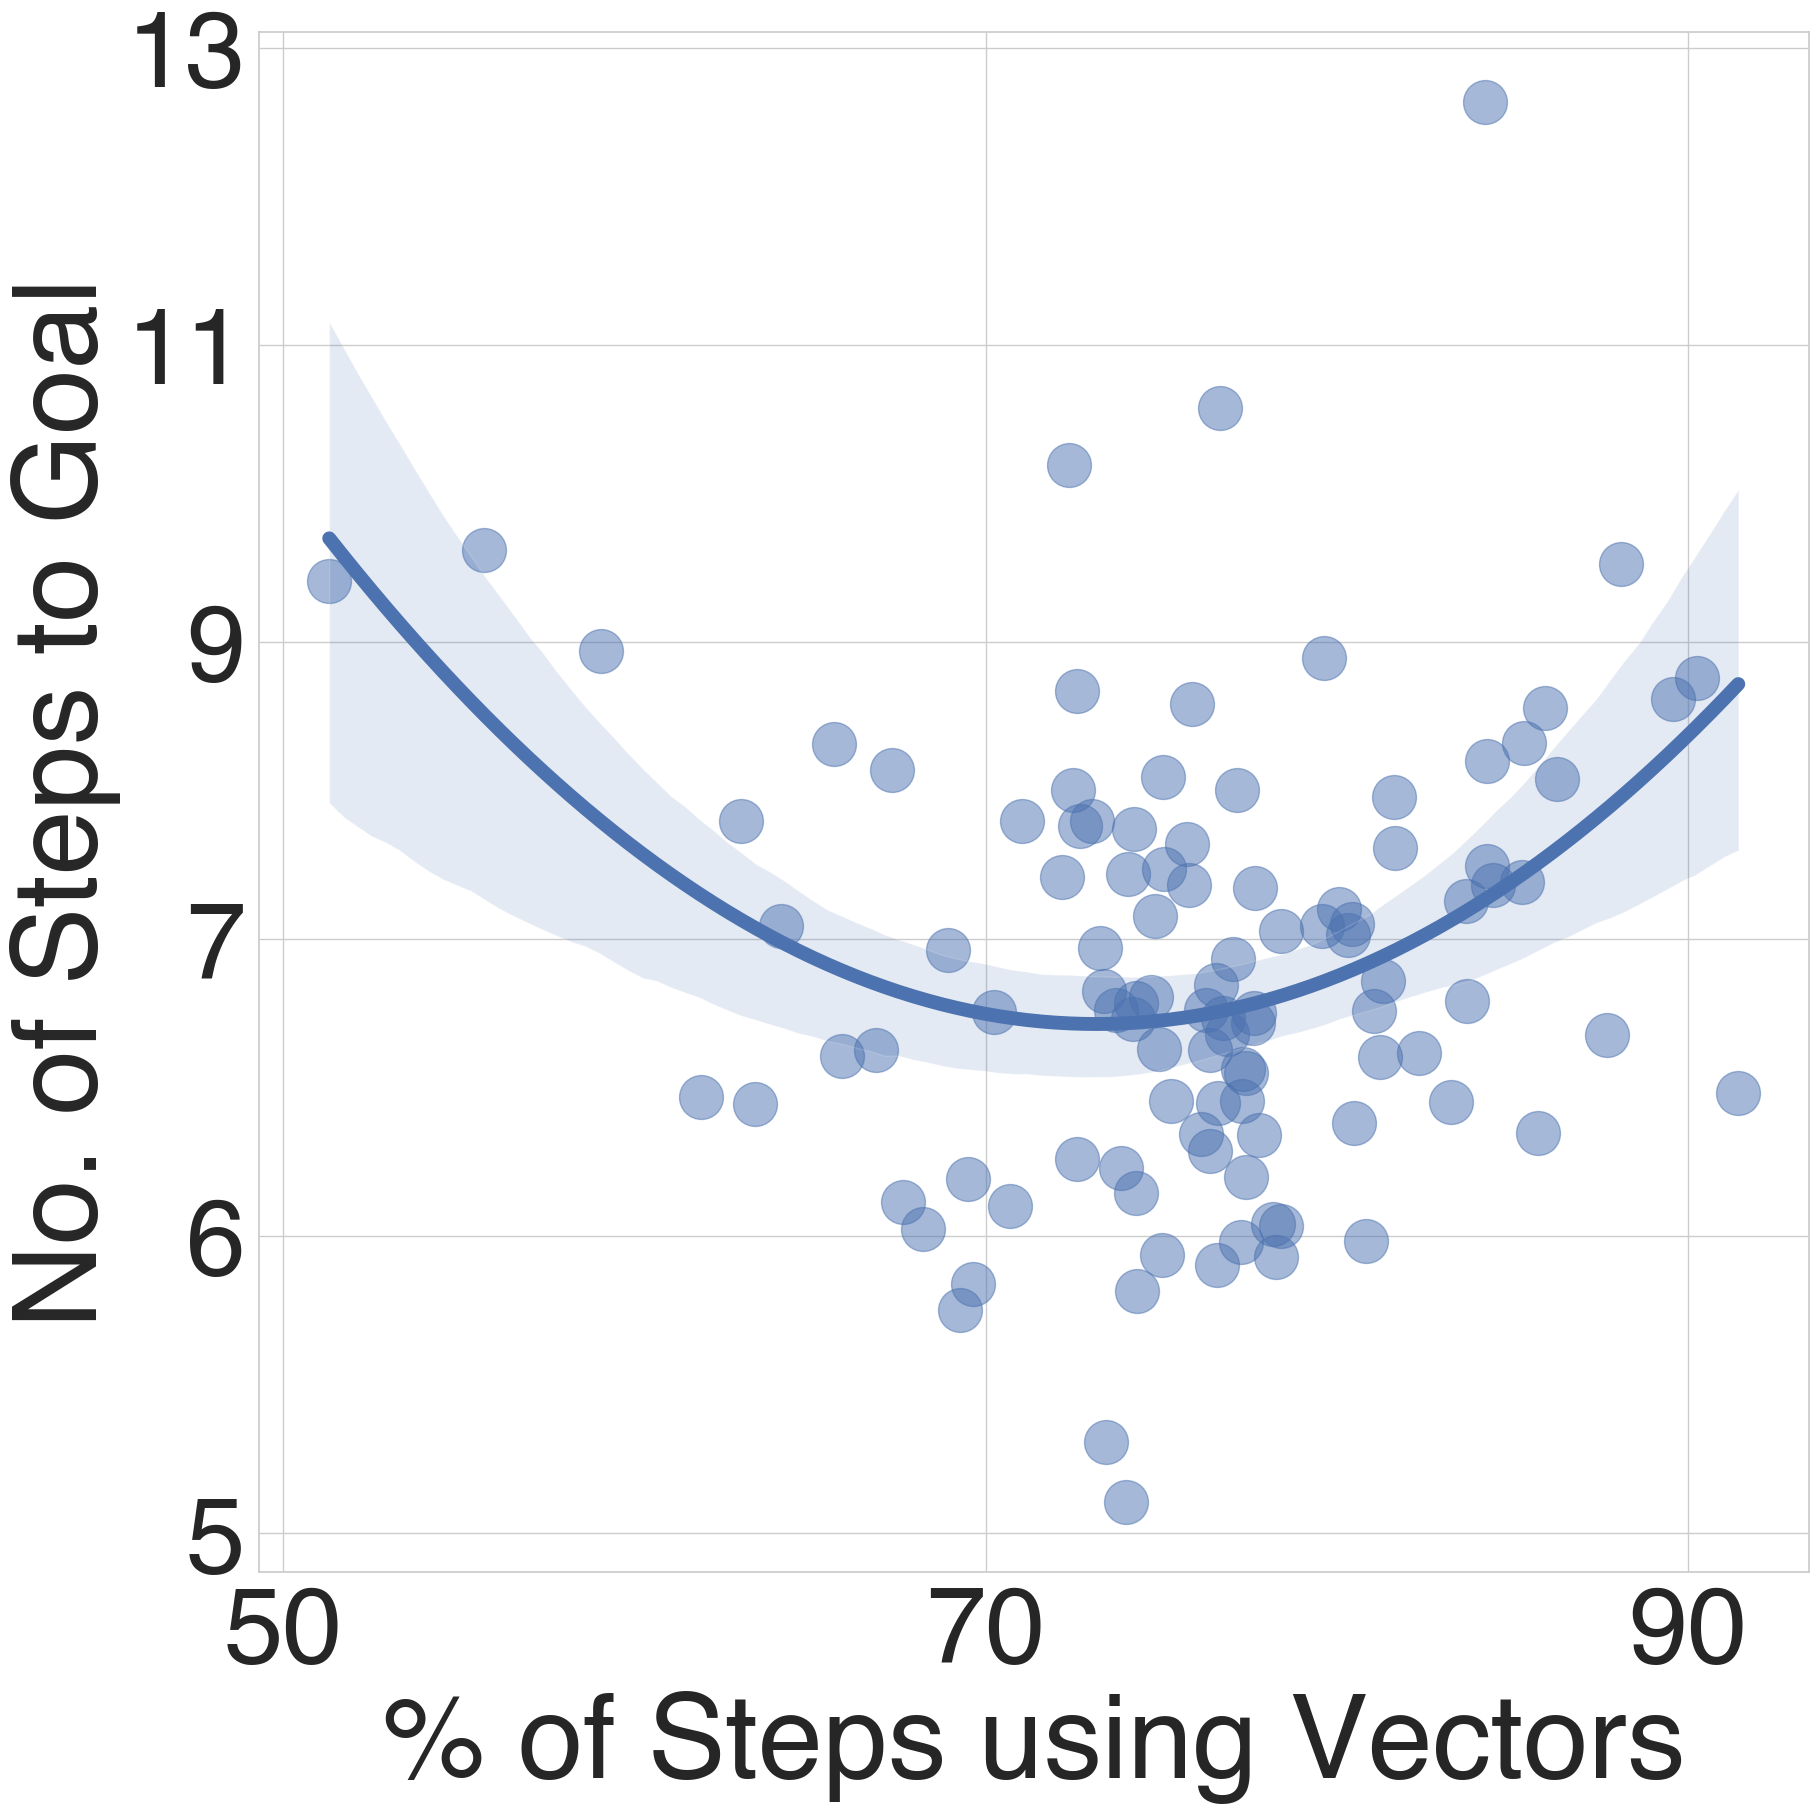

In [62]:
# %% relationship between %vectors and steps
temp = df3.groupby(['partno'])[['resp_logsteps', 'resp_steps','resp_directionperc']].mean().reset_index()
# temp['obstacles'] = [df_part['obstacles'][df_part['partno'] == x].iloc[0] for x in temp['partno']]
fig, ax = plt.subplots(figsize = (20,20))
g = sns.regplot(data = temp, x = 'resp_directionperc', y = 'resp_logsteps', order = 2, line_kws = {'linewidth': 10}, scatter_kws = {'s': 1000, 'alpha': 0.5})
g.set(xlabel = 'Proportion of Steps using Vectors', ylabel = 'No. of Steps to Goal')
#xlabel font weight
g.set_xlabel('% of Steps using Vectors', fontweight = 'bold')
#ylabel font weight
g.set_ylabel('No. of Steps to Goal', fontweight = 'bold')
#get x tick labels
g.set_xticks([0.5, 0.7, 0.9])
g.set_xticklabels([50, 70, 90])
yticks = g.get_yticks()
g.set_yticklabels([np.round(np.exp(x)).astype(int) for x in yticks])
# g.set(xlim = (0,1))
#legend
# leg = ax.legend(loc = 'up÷per left', fontsize = 50, title_fontsize = 50, labels =  ['_', 'Open Field', '_', '_', 'Cluttered'])

#add markers at (0.81

In [65]:
#statistics
#lin regress model from equation

df3_part['resp_directionperc_dm'] = df3_part['resp_directionperc'] - df3_part['resp_directionperc'].mean()
df3_part['resp_directionperc_dm2'] = df3_part['resp_directionperc_dm']**2
# df2_part['resp_directionperc_dm'] = (df2_part['resp_directionperc_dm'] - df2_part['resp_directionperc_dm'].mean())/df2_part['resp_directionperc_dm'].std()
# df2_part['resp_directionperc_dm2'] = (df2_part['resp_directionperc_dm2'] - df2_part['resp_directionperc_dm2'].mean())/df2_part['resp_directionperc_dm2'].std()
df3_part['resp_logsteps_dm'] = df3_part['resp_logsteps'] - df3_part['resp_logsteps'].mean()

reg_formula = 'resp_logsteps ~ resp_directionperc_dm*obstacles + resp_directionperc_dm2*obstacles'
reg_formula = 'resp_logsteps ~ resp_directionperc_dm + resp_directionperc_dm2'
reg_model = sm.OLS.from_formula(reg_formula, data = df3_part).fit()
reg_model.summary()

/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          resp_logsteps   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     25.87
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.29e-10
Time:                        18:41:39   Log-Likelihood:                 25.199
No. Observations:                 185   AIC:                            -44.40
Df Residuals:                     182   BIC:                            -34.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.9343      0.017    115.960      0.000       1.901       1.967
resp_directionperc_dm      0.5593      0.161      3.467      0.001       0.241       0.878
resp_directionperc_dm2     3.1584      0.440      7.182      0.000       2.291       4.026
==============================================================================
Omnibus:                       20.978   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.652
Skew:                           0.807   Prob(JB):                     4.44e-06
Kurtosis:                       3.772   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
%%R -i df2_steps
library(lme4)
library(lmerTest)
library(lmtest)

df2_steps$resptype <- as.factor(df2_steps$resptype)
#change newobjtype ref to none
df2_steps$newobjtype <- as.factor(df2_steps$newobjtype)
df2_steps$newobjtype <- relevel(df2_steps$newobjtype, ref = "none")
model <- glmer(resptype ~ trialno + newobjtype + (1 + trialno + newobjtype|partno), data = df2_steps, family = binomial, control = glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e5)))
summary(model)


/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "landmarkxlocs". Fall back to string conversion. The error is: integer 45253723427576653 does not fit 'int'
  warnings.warn('Error while trying to convert '
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "landmarkylocs". Fall back to string conversion. The error is: integer 47564326564563433 does not fit 'int'
  warnings.warn('Error while trying to convert '


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resptype ~ trialno + newobjtype + (1 + trialno + newobjtype |  
    partno)
   Data: df2_steps
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

     AIC      BIC   logLik deviance df.resid 
 30730.8  30850.7 -15351.4  30702.8    38588 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-124.599   -0.414   -0.060    0.512   17.687 

Random effects:
 Groups Name               Variance Std.Dev. Corr             
 partno (Intercept)        9.06495  3.0108                    
        trialno            0.01855  0.1362   -0.08            
        newobjtypegoal     5.20436  2.2813   -0.49 -0.35      
        newobjtypelandmark 3.38156  1.8389   -0.87 -0.10  0.59
Number of obs: 38602, groups:  partno, 100

Fixed effects:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.70557    0.30858  -

In [73]:
%%R 
model2 <- glmer(resptype ~ trialno + newobjtype + (1 + newobjtype|partno), data = df2_steps, family = binomial, control = glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e5)))
summary(model2)
print(lrtest(model, model2))

Likelihood ratio test

Model 1: resptype ~ trialno + newobjtype + (1 + trialno + newobjtype | 
    partno)
Model 2: resptype ~ trialno + newobjtype + (1 + newobjtype | partno)
  #Df LogLik Df  Chisq Pr(>Chisq)    
1  14 -15351                         
2  10 -16192 -4 1681.7  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [74]:
%%R
#use model 1
summary(model)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resptype ~ trialno + newobjtype + (1 + trialno + newobjtype |  
    partno)
   Data: df2_steps
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

     AIC      BIC   logLik deviance df.resid 
 30730.8  30850.7 -15351.4  30702.8    38588 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-124.599   -0.414   -0.060    0.512   17.687 

Random effects:
 Groups Name               Variance Std.Dev. Corr             
 partno (Intercept)        9.06495  3.0108                    
        trialno            0.01855  0.1362   -0.08            
        newobjtypegoal     5.20436  2.2813   -0.49 -0.35      
        newobjtypelandmark 3.38156  1.8389   -0.87 -0.10  0.59
Number of obs: 38602, groups:  partno, 100

Fixed effects:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.70557    0.30858  -

In [76]:

%%R 
model <- glmer(resptype ~ trialno + newobjtype*landmarkencountered + (1 + trialno + newobjtype*landmarkencountered|partno), data = df2_steps, family = binomial, control = glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e5)))
summary(model)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resptype ~ trialno + newobjtype * landmarkencountered + (1 +  
    trialno + newobjtype * landmarkencountered | partno)
   Data: df2_steps
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

     AIC      BIC   logLik deviance df.resid 
 29218.4  29518.1 -14574.2  29148.4    38567 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-130.186   -0.385   -0.052    0.460   15.358 

Random effects:
 Groups Name                                       Variance Std.Dev. Corr 
 partno (Intercept)                                11.37477 3.3727        
        trialno                                     0.01969 0.1403   -0.08
        newobjtypegoal                              6.19295 2.4886   -0.67
        newobjtypelandmark                          5.80133 2.4086   -0.81
        landmarkencounteredTRUE                     2.73

In [78]:
%%R
model2 <- glmer(resptype ~ trialno + newobjtype * landmarkencountered  + (1 + trialno + newobjtype + landmarkencountered|partno), data = df2_steps, family = binomial)
summary(model2)

#lrt
lrtest(model, model2)



Likelihood ratio test

Model 1: resptype ~ trialno + newobjtype * landmarkencountered + (1 + 
    trialno + newobjtype * landmarkencountered | partno)
Model 2: resptype ~ trialno + newobjtype * landmarkencountered + (1 + 
    trialno + newobjtype + landmarkencountered | partno)
  #Df LogLik  Df  Chisq Pr(>Chisq)    
1  35 -14574                          
2  22 -14650 -13 152.48  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [80]:
#logistic reg: resp type and prevvisited
get_ipython().run_cell_magic(
"R",
"-i df2_steps",
'''
library(lme4)
library(lmerTest)
library(lmtest)
df2_steps$resptype <- as.factor(df2_steps$resptype)
#change newobjtype ref to none
df2_steps$newobjtype <- as.factor(df2_steps$newobjtype)
df2_steps$newobjtype <- relevel(df2_steps$newobjtype, ref = "none")
#delete newobhtype = goal
df2_steps <- df2_steps[df2_steps$newobjtype != 'goal',]
model <- glmer(resptype ~ trialno + newobjtype * prevvisited + (1 + trialno + newobjtype * prevvisited|partno), data = df2_steps, family = binomial)
summary(model)

''')

/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "landmarkxlocs". Fall back to string conversion. The error is: integer 45253723427576653 does not fit 'int'
  warnings.warn('Error while trying to convert '
/Users/denislan/opt/anaconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "landmarkylocs". Fall back to string conversion. The error is: integer 47564326564563433 does not fit 'int'
  warnings.warn('Error while trying to convert '


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resptype ~ trialno + newobjtype * prevvisited + (1 + trialno +  
    newobjtype * prevvisited | partno)
   Data: df2_steps

     AIC      BIC   logLik deviance df.resid 
 28191.4  28361.3 -14075.7  28151.4    36182 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-151.010   -0.423   -0.056    0.497   38.933 

Random effects:
 Groups Name                               Variance Std.Dev. Corr             
 partno (Intercept)                        10.01435 3.1645                    
        trialno                             0.02668 0.1633   -0.02            
        newobjtypelandmark                  4.78429 2.1873   -0.88 -0.21      
        prevvisitedTRUE                     0.99037 0.9952   -0.75 -0.27  0.72
        newobjtypelandmark:prevvisitedTRUE  2.03153 1.4253    0.84  0.43 -0.92
      
      
      
      
      
 -0.83
Number 

In [83]:
%%R
model2 <- glmer(resptype ~ trialno + newobjtype * prevvisited  + (1 + newobjtype * prevvisited |partno), data = df2_steps, family = binomial)
summary(model2)

#lrt
print(lrtest(model, model2))    
#use model 1 (see results above)

Likelihood ratio test

Model 1: resptype ~ trialno + newobjtype * prevvisited + (1 + trialno + 
    newobjtype * prevvisited | partno)
Model 2: resptype ~ trialno + newobjtype * prevvisited + (1 + newobjtype * 
    prevvisited | partno)
  #Df LogLik Df  Chisq Pr(>Chisq)    
1  20 -14076                         
2  15 -14972 -5 1792.6  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [84]:
df_steps_free['condition'] = 'free'
df_steps_forced['condition'] = 'forced'
df3_steps = pd.concat([df_steps_free, df_steps_forced])

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 0 7
day2 inds: 154 197
day1 inds: 8 15
day2 inds: 198 231
day1 inds: 16 19
day2 inds: 232 235
day1 inds: 20 27
day2 inds: 236 245
day1 inds: 28 33
day2 inds: 246 251
day1 inds: 34 41
day2 inds: 252 261
day1 inds: 42 45
day2 inds: 262 265
day1 inds: 46 49
day2 inds: 266 317
day1 inds: 50 53
day2 inds: 318 331
day1 inds: 54 61
day2 inds: 332 335
day1 inds: 62 65
day2 inds: 336 343
day1 inds: 66 71
day2 inds: 344 383
day1 inds: 72 79
day2 inds: 384 387
day1 inds: 80 83
day2 inds: 388 399
day1 inds: 84 89
day2 inds: 400 403
day1 inds: 90 95
day2 inds: 404 407
day1 inds: 96 109
day2 inds: 408 435
day1 inds: 110 115
day2 inds: 436 455
day1 inds: 116 121
day2 inds: 456 501
day1 inds: 122 133
day2 inds: 502 517
day1 inds: 134 137
day2 inds: 518 551
day1 inds: 138 141
day2 inds: 552 593
day1 inds: 142 149
day2 inds: 594 607
day1 inds: 150 153
day2 inds: 608 611
day1 inds: 612 621
day2 inds: 816 861
day1 inds: 622 639
day2 inds: 862 865
day1 inds: 640 643
day2 inds: 866 873


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 644 649
day2 inds: 874 887
day1 inds: 650 653
day2 inds: 888 893
day1 inds: 654 657
day2 inds: 894 907
day1 inds: 658 661
day2 inds: 908 911
day1 inds: 662 665
day2 inds: 912 915
day1 inds: 666 673
day2 inds: 916 931
day1 inds: 674 677
day2 inds: 932 939
day1 inds: 678 685
day2 inds: 940 943
day1 inds: 686 689
day2 inds: 944 947
day1 inds: 690 695
day2 inds: 948 955
day1 inds: 696 713
day2 inds: 956 963
day1 inds: 714 723
day2 inds: 964 967
day1 inds: 724 727
day2 inds: 968 973
day1 inds: 728 739
day2 inds: 974 977
day1 inds: 740 743
day2 inds: 978 987
day1 inds: 744 747
day2 inds: 988 995
day1 inds: 748 753
day2 inds: 996 1001
day1 inds: 754 759
day2 inds: 1002 1011
day1 inds: 760 777
day2 inds: 1012 1021
day1 inds: 778 797
day2 inds: 1022 1027
day1 inds: 798 815
day2 inds: 1028 1031
day1 inds: 1032 1035
day2 inds: 1194 1199
day1 inds: 1036 1041
day2 inds: 1200 1227
day1 inds: 1042 1045
day2 inds: 1228 1231
day1 inds: 1046 1051
day2 inds: 1232 1239
day1 inds: 1052 1057
day2

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 1076 1081
day2 inds: 1326 1333
day1 inds: 1082 1087
day2 inds: 1334 1345
day1 inds: 1088 1097
day2 inds: 1346 1349
day1 inds: 1098 1103
day2 inds: 1350 1355
day1 inds: 1104 1109
day2 inds: 1356 1359
day1 inds: 1110 1113
day2 inds: 1360 1365
day1 inds: 1114 1117
day2 inds: 1366 1369
day1 inds: 1118 1127
day2 inds: 1370 1377
day1 inds: 1128 1133
day2 inds: 1378 1383
day1 inds: 1134 1137
day2 inds: 1384 1387
day1 inds: 1138 1141
day2 inds: 1388 1391
day1 inds: 1142 1161
day2 inds: 1392 1395
day1 inds: 1162 1165
day2 inds: 1396 1401
day1 inds: 1166 1175
day2 inds: 1402 1405
day1 inds: 1176 1187
day2 inds: 1406 1419
day1 inds: 1188 1193
day2 inds: 1420 1425
day1 inds: 1426 1429
day2 inds: 1584 1587
day1 inds: 1430 1433
day2 inds: 1588 1621
day1 inds: 1434 1437
day2 inds: 1622 1625
day1 inds: 1438 1441
day2 inds: 1626 1629
day1 inds: 1442 1445
day2 inds: 1630 1635
day1 inds: 1446 1449
day2 inds: 1636 1641
day1 inds: 1450 1453
day2 inds: 1642 1649
day1 inds: 1454 1471
day2 inds: 16

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 1486 1491
day2 inds: 1666 1669
day1 inds: 1492 1507
day2 inds: 1670 1675
day1 inds: 1508 1513
day2 inds: 1676 1683
day1 inds: 1514 1517
day2 inds: 1684 1695
day1 inds: 1518 1523
day2 inds: 1696 1701
day1 inds: 1524 1527
day2 inds: 1702 1707
day1 inds: 1528 1531
day2 inds: 1708 1713
day1 inds: 1532 1537
day2 inds: 1714 1719
day1 inds: 1538 1545
day2 inds: 1720 1727
day1 inds: 1546 1555
day2 inds: 1728 1733
day1 inds: 1556 1567
day2 inds: 1734 1739
day1 inds: 1568 1573
day2 inds: 1740 1743
day1 inds: 1574 1577
day2 inds: 1744 1747
day1 inds: 1578 1583
day2 inds: 1748 1753
day1 inds: 1754 1783
day2 inds: 2124 2127
day1 inds: 1784 1791
day2 inds: 2128 2149
day1 inds: 1792 1799
day2 inds: 2150 2157
day1 inds: 1800 1813
day2 inds: 2158 2165
day1 inds: 1814 1839
day2 inds: 2166 2185
day1 inds: 1840 1849
day2 inds: 2186 2189
day1 inds: 1850 1859
day2 inds: 2190 2201
day1 inds: 1860 1865
day2 inds: 2202 2229
day1 inds: 1866 1877
day2 inds: 2230 2235
day1 inds: 1878 1899
day2 inds: 22

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 2024 2035
day2 inds: 2366 2377
day1 inds: 2036 2049
day2 inds: 2378 2389
day1 inds: 2050 2061
day2 inds: 2390 2399
day1 inds: 2062 2077
day2 inds: 2400 2405
day1 inds: 2078 2087
day2 inds: 2406 2415
day1 inds: 2088 2101
day2 inds: 2416 2437
day1 inds: 2102 2113
day2 inds: 2438 2457
day1 inds: 2114 2123
day2 inds: 2458 2477
day1 inds: 2478 2481
day2 inds: 2634 2639
day1 inds: 2482 2489
day2 inds: 2640 2643
day1 inds: 2490 2495
day2 inds: 2644 2647
day1 inds: 2496 2501
day2 inds: 2648 2655
day1 inds: 2502 2507
day2 inds: 2656 2659
day1 inds: 2508 2511
day2 inds: 2660 2663
day1 inds: 2512 2517
day2 inds: 2664 2677
day1 inds: 2518 2523
day2 inds: 2678 2685
day1 inds: 2524 2527
day2 inds: 2686 2691
day1 inds: 2528 2535
day2 inds: 2692 2697
day1 inds: 2536 2541
day2 inds: 2698 2703
day1 inds: 2542 2553
day2 inds: 2704 2709
day1 inds: 2554 2557
day2 inds: 2710 2717
day1 inds: 2558 2563
day2 inds: 2718 2721
day1 inds: 2564 2575
day2 inds: 2722 2727
day1 inds: 2576 2581
day2 inds: 27

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 2592 2597
day2 inds: 2758 2763
day1 inds: 2598 2605
day2 inds: 2764 2767
day1 inds: 2606 2609
day2 inds: 2768 2771
day1 inds: 2610 2615
day2 inds: 2772 2777
day1 inds: 2616 2629
day2 inds: 2778 2783
day1 inds: 2630 2633
day2 inds: 2784 2787
day1 inds: 2788 2793
day2 inds: 2962 2971
day1 inds: 2794 2799
day2 inds: 2972 2983
day1 inds: 2800 2807
day2 inds: 2984 2993
day1 inds: 2808 2813
day2 inds: 2994 3051
day1 inds: 2814 2821
day2 inds: 3052 3069
day1 inds: 2822 2829
day2 inds: 3070 3073
day1 inds: 2830 2839
day2 inds: 3074 3091
day1 inds: 2840 2845
day2 inds: 3092 3101
day1 inds: 2846 2851
day2 inds: 3102 3109
day1 inds: 2852 2861
day2 inds: 3110 3113
day1 inds: 2862 2867
day2 inds: 3114 3119
day1 inds: 2868 2877
day2 inds: 3120 3125
day1 inds: 2878 2885
day2 inds: 3126 3129
day1 inds: 2886 2895
day2 inds: 3130 3133
day1 inds: 2896 2901
day2 inds: 3134 3137
day1 inds: 2902 2909
day2 inds: 3138 3141
day1 inds: 2910 2919
day2 inds: 3142 3149
day1 inds: 2920 2925
day2 inds: 31

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 2950 2955
day2 inds: 3180 3185
day1 inds: 2956 2961
day2 inds: 3186 3191
day1 inds: 3192 3195
day2 inds: 3338 3345
day1 inds: 3196 3217
day2 inds: 3346 3351
day1 inds: 3218 3221
day2 inds: 3352 3367
day1 inds: 3222 3227
day2 inds: 3368 3371
day1 inds: 3228 3231
day2 inds: 3372 3379
day1 inds: 3232 3235
day2 inds: 3380 3383
day1 inds: 3236 3239
day2 inds: 3384 3389
day1 inds: 3240 3243
day2 inds: 3390 3429
day1 inds: 3244 3253
day2 inds: 3430 3435
day1 inds: 3254 3259
day2 inds: 3436 3443
day1 inds: 3260 3263
day2 inds: 3444 3455
day1 inds: 3264 3267
day2 inds: 3456 3459
day1 inds: 3268 3273
day2 inds: 3460 3463
day1 inds: 3274 3283
day2 inds: 3464 3471
day1 inds: 3284 3287
day2 inds: 3472 3475
day1 inds: 3288 3291
day2 inds: 3476 3479
day1 inds: 3292 3297
day2 inds: 3480 3495
day1 inds: 3298 3301
day2 inds: 3496 3505
day1 inds: 3302 3311
day2 inds: 3506 3509
day1 inds: 3312 3315
day2 inds: 3510 3513
day1 inds: 3316 3319
day2 inds: 3514 3519
day1 inds: 3320 3329
day2 inds: 35

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 3548 3551
day2 inds: 3776 3781
day1 inds: 3552 3555
day2 inds: 3782 3803
day1 inds: 3556 3567
day2 inds: 3804 3829
day1 inds: 3568 3587
day2 inds: 3830 3835
day1 inds: 3588 3593
day2 inds: 3836 3839
day1 inds: 3594 3605
day2 inds: 3840 3845
day1 inds: 3606 3611
day2 inds: 3846 3849
day1 inds: 3612 3615
day2 inds: 3850 3853
day1 inds: 3616 3625
day2 inds: 3854 3867
day1 inds: 3626 3631
day2 inds: 3868 3871
day1 inds: 3632 3635
day2 inds: 3872 3941
day1 inds: 3636 3639
day2 inds: 3942 3959
day1 inds: 3640 3647
day2 inds: 3960 3965
day1 inds: 3648 3695
day2 inds: 3966 3973
day1 inds: 3696 3699
day2 inds: 3974 3983
day1 inds: 3700 3703
day2 inds: 3984 3997
day1 inds: 3704 3707
day2 inds: 3998 4019
day1 inds: 3708 3711
day2 inds: 4020 4023
day1 inds: 3712 3715
day2 inds: 4024 4027
day1 inds: 3716 3719
day2 inds: 4028 4041
day1 inds: 3720 3723
day2 inds: 4042 4045
day1 inds: 4046 4053
day2 inds: 4310 4331
day1 inds: 4054 4061
day2 inds: 4332 4367
day1 inds: 4062 4087
day2 inds: 43

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 4110 4117
day2 inds: 4570 4623
day1 inds: 4118 4121
day2 inds: 4624 4627
day1 inds: 4122 4133
day2 inds: 4628 4631
day1 inds: 4134 4159
day2 inds: 4632 4643
day1 inds: 4160 4165
day2 inds: 4644 4649
day1 inds: 4166 4169
day2 inds: 4650 4659
day1 inds: 4170 4193
day2 inds: 4660 4695
day1 inds: 4194 4207
day2 inds: 4696 4701
day1 inds: 4208 4219
day2 inds: 4702 4707
day1 inds: 4220 4231
day2 inds: 4708 4715
day1 inds: 4232 4237
day2 inds: 4716 4735
day1 inds: 4238 4263
day2 inds: 4736 4773
day1 inds: 4264 4269
day2 inds: 4774 4789
day1 inds: 4270 4279
day2 inds: 4790 4813
day1 inds: 4280 4285
day2 inds: 4814 4829
day1 inds: 4286 4295
day2 inds: 4830 4847
day1 inds: 4296 4301
day2 inds: 4848 4873
day1 inds: 4302 4309
day2 inds: 4874 4877
day1 inds: 4878 4885
day2 inds: 5010 5017
day1 inds: 4886 4889
day2 inds: 5018 5021
day1 inds: 4890 4895
day2 inds: 5022 5025
day1 inds: 4896 4899
day2 inds: 5026 5033
day1 inds: 4900 4907
day2 inds: 5034 5037
day1 inds: 4908 4913
day2 inds: 50

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 4936 4941
day2 inds: 5070 5073
day1 inds: 4942 4949
day2 inds: 5074 5081
day1 inds: 4950 4955
day2 inds: 5082 5087
day1 inds: 4956 4961
day2 inds: 5088 5095
day1 inds: 4962 4967
day2 inds: 5096 5099
day1 inds: 4968 4971
day2 inds: 5100 5107
day1 inds: 4972 4977
day2 inds: 5108 5111
day1 inds: 4978 4983
day2 inds: 5112 5115
day1 inds: 4984 4987
day2 inds: 5116 5121


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 4988 4991
day2 inds: 5122 5127
day1 inds: 4992 4995
day2 inds: 5128 5133
day1 inds: 4996 5001
day2 inds: 5134 5139
day1 inds: 5002 5005
day2 inds: 5140 5143
day1 inds: 5006 5009
day2 inds: 5144 5153
day1 inds: 5154 5157
day2 inds: 5274 5283
day1 inds: 5158 5163
day2 inds: 5284 5289
day1 inds: 5164 5167
day2 inds: 5290 5305
day1 inds: 5168 5173
day2 inds: 5306 5311
day1 inds: 5174 5181
day2 inds: 5312 5315
day1 inds: 5182 5185
day2 inds: 5316 5319
day1 inds: 5186 5189
day2 inds: 5320 5323
day1 inds: 5190 5195
day2 inds: 5324 5327
day1 inds: 5196 5199
day2 inds: 5328 5343
day1 inds: 5200 5205
day2 inds: 5344 5351
day1 inds: 5206 5209
day2 inds: 5352 5355
day1 inds: 5210 5213
day2 inds: 5356 5371
day1 inds: 5214 5219
day2 inds: 5372 5381
day1 inds: 5220 5223
day2 inds: 5382 5387
day1 inds: 5224 5227
day2 inds: 5388 5395
day1 inds: 5228 5233
day2 inds: 5396 5425
day1 inds: 5234 5241
day2 inds: 5426 5431
day1 inds: 5242 5247
day2 inds: 5432 5439
day1 inds: 5248 5251
day2 inds: 54

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 5252 5257
day2 inds: 5456 5459
day1 inds: 5258 5261
day2 inds: 5460 5475
day1 inds: 5262 5265
day2 inds: 5476 5481
day1 inds: 5266 5269
day2 inds: 5482 5487
day1 inds: 5270 5273
day2 inds: 5488 5493
day1 inds: 5494 5499
day2 inds: 5640 5647
day1 inds: 5500 5505
day2 inds: 5648 5653
day1 inds: 5506 5509
day2 inds: 5654 5663
day1 inds: 5510 5513
day2 inds: 5664 5667
day1 inds: 5514 5517
day2 inds: 5668 5675
day1 inds: 5518 5523
day2 inds: 5676 5681
day1 inds: 5524 5531
day2 inds: 5682 5685
day1 inds: 5532 5535
day2 inds: 5686 5689
day1 inds: 5536 5539
day2 inds: 5690 5703
day1 inds: 5540 5543
day2 inds: 5704 5707
day1 inds: 5544 5551
day2 inds: 5708 5713
day1 inds: 5552 5555
day2 inds: 5714 5719
day1 inds: 5556 5569
day2 inds: 5720 5725
day1 inds: 5570 5573
day2 inds: 5726 5729
day1 inds: 5574 5577
day2 inds: 5730 5735
day1 inds: 5578 5581
day2 inds: 5736 5739
day1 inds: 5582 5591
day2 inds: 5740 5743
day1 inds: 5592 5597
day2 inds: 5744 5749
day1 inds: 5598 5601
day2 inds: 57

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 5632 5639
day2 inds: 5770 5773
day1 inds: 5774 5779
day2 inds: 5932 5939
day1 inds: 5780 5785
day2 inds: 5940 5949
day1 inds: 5786 5789
day2 inds: 5950 5957
day1 inds: 5790 5793
day2 inds: 5958 5963
day1 inds: 5794 5799
day2 inds: 5964 5981
day1 inds: 5800 5805
day2 inds: 5982 5991
day1 inds: 5806 5815
day2 inds: 5992 6001
day1 inds: 5816 5821
day2 inds: 6002 6011
day1 inds: 5822 5829
day2 inds: 6012 6019
day1 inds: 5830 5835
day2 inds: 6020 6027
day1 inds: 5836 5847
day2 inds: 6028 6031
day1 inds: 5848 5859
day2 inds: 6032 6037
day1 inds: 5860 5863
day2 inds: 6038 6047
day1 inds: 5864 5869
day2 inds: 6048 6061
day1 inds: 5870 5873
day2 inds: 6062 6067
day1 inds: 5874 5885
day2 inds: 6068 6079
day1 inds: 5886 5889
day2 inds: 6080 6083
day1 inds: 5890 5893
day2 inds: 6084 6089
day1 inds: 5894 5899
day2 inds: 6090 6095
day1 inds: 5900 5907
day2 inds: 6096 6101
day1 inds: 5908 5913
day2 inds: 6102 6109
day1 inds: 5914 5921
day2 inds: 6110 6117
day1 inds: 5922 5925
day2 inds: 61

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 6146 6151
day2 inds: 6320 6329
day1 inds: 6152 6157
day2 inds: 6330 6335
day1 inds: 6158 6165
day2 inds: 6336 6343
day1 inds: 6166 6169
day2 inds: 6344 6351
day1 inds: 6170 6175
day2 inds: 6352 6355
day1 inds: 6176 6181
day2 inds: 6356 6361
day1 inds: 6182 6203
day2 inds: 6362 6371
day1 inds: 6204 6207
day2 inds: 6372 6379
day1 inds: 6208 6215
day2 inds: 6380 6383
day1 inds: 6216 6219
day2 inds: 6384 6387
day1 inds: 6220 6223
day2 inds: 6388 6393
day1 inds: 6224 6229
day2 inds: 6394 6403
day1 inds: 6230 6233
day2 inds: 6404 6415
day1 inds: 6234 6239
day2 inds: 6416 6419
day1 inds: 6240 6265
day2 inds: 6420 6431
day1 inds: 6266 6271
day2 inds: 6432 6441
day1 inds: 6272 6277
day2 inds: 6442 6445
day1 inds: 6278 6283
day2 inds: 6446 6465
day1 inds: 6284 6287
day2 inds: 6466 6471
day1 inds: 6288 6295
day2 inds: 6472 6479
day1 inds: 6480 6485
day2 inds: 6672 6691
day1 inds: 6486 6491
day2 inds: 6692 6725
day1 inds: 6492 6505
day2 inds: 6726 6749
day1 inds: 6506 6513
day2 inds: 67

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 6534 6541
day2 inds: 6854 6861
day1 inds: 6542 6545
day2 inds: 6862 6865
day1 inds: 6546 6551
day2 inds: 6866 6869
day1 inds: 6552 6559
day2 inds: 6870 6875
day1 inds: 6560 6579
day2 inds: 6876 6881
day1 inds: 6580 6583
day2 inds: 6882 6887
day1 inds: 6584 6587
day2 inds: 6888 6891
day1 inds: 6588 6591
day2 inds: 6892 6895
day1 inds: 6592 6605
day2 inds: 6896 6901
day1 inds: 6606 6615
day2 inds: 6902 6927
day1 inds: 6616 6619
day2 inds: 6928 6931
day1 inds: 6620 6639
day2 inds: 6932 6935
day1 inds: 6640 6643
day2 inds: 6936 6939
day1 inds: 6644 6659
day2 inds: 6940 6943
day1 inds: 6660 6663
day2 inds: 6944 6947
day1 inds: 6664 6671
day2 inds: 6948 6951
day1 inds: 6952 6955
day2 inds: 7094 7097
day1 inds: 6956 6961
day2 inds: 7098 7103
day1 inds: 6962 6967
day2 inds: 7104 7119
day1 inds: 6968 6971
day2 inds: 7120 7151
day1 inds: 6972 6979
day2 inds: 7152 7155
day1 inds: 6980 6983
day2 inds: 7156 7165
day1 inds: 6984 6991
day2 inds: 7166 7171
day1 inds: 6992 6999
day2 inds: 71

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 7014 7019
day2 inds: 7282 7285
day1 inds: 7020 7025
day2 inds: 7286 7293
day1 inds: 7026 7029
day2 inds: 7294 7301
day1 inds: 7030 7033
day2 inds: 7302 7307
day1 inds: 7034 7045
day2 inds: 7308 7319
day1 inds: 7046 7053
day2 inds: 7320 7325
day1 inds: 7054 7059
day2 inds: 7326 7329
day1 inds: 7060 7063
day2 inds: 7330 7335
day1 inds: 7064 7069
day2 inds: 7336 7349
day1 inds: 7070 7075
day2 inds: 7350 7359
day1 inds: 7076 7083
day2 inds: 7360 7365
day1 inds: 7084 7087
day2 inds: 7366 7373
day1 inds: 7088 7093
day2 inds: 7374 7377
day1 inds: 7378 7381
day2 inds: 7558 7579
day1 inds: 7382 7391
day2 inds: 7580 7583
day1 inds: 7392 7397
day2 inds: 7584 7597
day1 inds: 7398 7401
day2 inds: 7598 7603
day1 inds: 7402 7405
day2 inds: 7604 7609
day1 inds: 7406 7411
day2 inds: 7610 7613
day1 inds: 7412 7423
day2 inds: 7614 7617
day1 inds: 7424 7427
day2 inds: 7618 7623
day1 inds: 7428 7431
day2 inds: 7624 7627
day1 inds: 7432 7435
day2 inds: 7628 7633
day1 inds: 7436 7439
day2 inds: 76

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 7532 7535
day2 inds: 7704 7713
day1 inds: 7536 7539
day2 inds: 7714 7717
day1 inds: 7540 7543
day2 inds: 7718 7729
day1 inds: 7544 7553
day2 inds: 7730 7735
day1 inds: 7554 7557
day2 inds: 7736 7741
day1 inds: 7742 7753
day2 inds: 7952 7961
day1 inds: 7754 7757
day2 inds: 7962 7997
day1 inds: 7758 7773
day2 inds: 7998 8003
day1 inds: 7774 7781
day2 inds: 8004 8037
day1 inds: 7782 7789
day2 inds: 8038 8043
day1 inds: 7790 7793
day2 inds: 8044 8047
day1 inds: 7794 7797
day2 inds: 8048 8069
day1 inds: 7798 7811
day2 inds: 8070 8087
day1 inds: 7812 7815
day2 inds: 8088 8129
day1 inds: 7816 7835
day2 inds: 8130 8143
day1 inds: 7836 7839
day2 inds: 8144 8147
day1 inds: 7840 7845
day2 inds: 8148 8165
day1 inds: 7846 7849
day2 inds: 8166 8215
day1 inds: 7850 7891
day2 inds: 8216 8221
day1 inds: 7892 7901
day2 inds: 8222 8227
day1 inds: 7902 7905
day2 inds: 8228 8239
day1 inds: 7906 7909
day2 inds: 8240 8251
day1 inds: 7910 7917
day2 inds: 8252 8273
day1 inds: 7918 7921
day2 inds: 82

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 8390 8397
day2 inds: 8634 8641
day1 inds: 8398 8411
day2 inds: 8642 8663
day1 inds: 8412 8415
day2 inds: 8664 8669
day1 inds: 8416 8423
day2 inds: 8670 8685
day1 inds: 8424 8431
day2 inds: 8686 8703
day1 inds: 8432 8441
day2 inds: 8704 8707
day1 inds: 8442 8455
day2 inds: 8708 8713
day1 inds: 8456 8463
day2 inds: 8714 8719
day1 inds: 8464 8479
day2 inds: 8720 8725
day1 inds: 8480 8483
day2 inds: 8726 8729
day1 inds: 8484 8497
day2 inds: 8730 8733
day1 inds: 8498 8505
day2 inds: 8734 8737
day1 inds: 8506 8511
day2 inds: 8738 8747
day1 inds: 8512 8517
day2 inds: 8748 8769
day1 inds: 8518 8525
day2 inds: 8770 8775
day1 inds: 8526 8533
day2 inds: 8776 8787
day1 inds: 8534 8545
day2 inds: 8788 8793
day1 inds: 8546 8551
day2 inds: 8794 8797


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 8552 8555
day2 inds: 8798 8803
day1 inds: 8556 8565
day2 inds: 8804 8813
day1 inds: 8814 8821
day2 inds: 9148 9199
day1 inds: 8822 8831
day2 inds: 9200 9203
day1 inds: 8832 8851
day2 inds: 9204 9211
day1 inds: 8852 8875
day2 inds: 9212 9219
day1 inds: 8876 8885
day2 inds: 9220 9231
day1 inds: 8886 8889
day2 inds: 9232 9237
day1 inds: 8890 8893
day2 inds: 9238 9245
day1 inds: 8894 8897
day2 inds: 9246 9249
day1 inds: 8898 8971
day2 inds: 9250 9263


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 8972 9015
day2 inds: 9264 9299
day1 inds: 9016 9029
day2 inds: 9300 9303
day1 inds: 9030 9037
day2 inds: 9304 9311
day1 inds: 9038 9045
day2 inds: 9312 9323
day1 inds: 9046 9063
day2 inds: 9324 9329
day1 inds: 9064 9071
day2 inds: 9330 9339
day1 inds: 9072 9085
day2 inds: 9340 9367
day1 inds: 9086 9101
day2 inds: 9368 9375
day1 inds: 9102 9105
day2 inds: 9376 9379
day1 inds: 9106 9109
day2 inds: 9380 9383
day1 inds: 9110 9127
day2 inds: 9384 9389
day1 inds: 9128 9131
day2 inds: 9390 9399
day1 inds: 9132 9137
day2 inds: 9400 9411
day1 inds: 9138 9143
day2 inds: 9412 9415
day1 inds: 9144 9147
day2 inds: 9416 9419
day1 inds: 9420 9459
day2 inds: 9842 9845
day1 inds: 9460 9463
day2 inds: 9846 9853
day1 inds: 9464 9543
day2 inds: 9854 9869
day1 inds: 9544 9547
day2 inds: 9870 9877
day1 inds: 9548 9553
day2 inds: 9878 9881
day1 inds: 9554 9563
day2 inds: 9882 9921
day1 inds: 9564 9567
day2 inds: 9922 9929
day1 inds: 9568 9573
day2 inds: 9930 9937
day1 inds: 9574 9617
day2 inds: 99

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 9680 9685
day2 inds: 10036 10039
day1 inds: 9686 9689
day2 inds: 10040 10061
day1 inds: 9690 9699
day2 inds: 10062 10065
day1 inds: 9700 9739
day2 inds: 10066 10081
day1 inds: 9740 9789
day2 inds: 10082 10085
day1 inds: 9790 9793
day2 inds: 10086 10091
day1 inds: 9794 9799
day2 inds: 10092 10097
day1 inds: 9800 9803
day2 inds: 10098 10111
day1 inds: 9804 9811
day2 inds: 10112 10115
day1 inds: 9812 9823
day2 inds: 10116 10121
day1 inds: 9824 9831
day2 inds: 10122 10129
day1 inds: 9832 9841
day2 inds: 10130 10133
day1 inds: 10134 10137
day2 inds: 10278 10281
day1 inds: 10138 10145
day2 inds: 10282 10285
day1 inds: 10146 10149
day2 inds: 10286 10291
day1 inds: 10150 10157
day2 inds: 10292 10295
day1 inds: 10158 10163
day2 inds: 10296 10299
day1 inds: 10164 10169
day2 inds: 10300 10303
day1 inds: 10170 10173
day2 inds: 10304 10307
day1 inds: 10174 10181
day2 inds: 10308 10317
day1 inds: 10182 10185
day2 inds: 10318 10327
day1 inds: 10186 10189
day2 inds: 10328 10333
day1 inds: 1

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 10224 10227
day2 inds: 10374 10377
day1 inds: 10228 10231
day2 inds: 10378 10383
day1 inds: 10232 10239
day2 inds: 10384 10389
day1 inds: 10240 10249
day2 inds: 10390 10393
day1 inds: 10250 10253
day2 inds: 10394 10407
day1 inds: 10254 10259
day2 inds: 10408 10411
day1 inds: 10260 10267
day2 inds: 10412 10417
day1 inds: 10268 10277
day2 inds: 10418 10429
day1 inds: 10430 10433
day2 inds: 10574 10583
day1 inds: 10434 10439
day2 inds: 10584 10593
day1 inds: 10440 10445
day2 inds: 10594 10609
day1 inds: 10446 10451
day2 inds: 10610 10615
day1 inds: 10452 10455
day2 inds: 10616 10619
day1 inds: 10456 10475
day2 inds: 10620 10623
day1 inds: 10476 10485
day2 inds: 10624 10633
day1 inds: 10486 10489
day2 inds: 10634 10637
day1 inds: 10490 10501
day2 inds: 10638 10659
day1 inds: 10502 10505
day2 inds: 10660 10663
day1 inds: 10506 10511
day2 inds: 10664 10673
day1 inds: 10512 10517
day2 inds: 10674 10693
day1 inds: 10518 10523
day2 inds: 10694 10697
day1 inds: 10524 10529
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 10554 10559
day2 inds: 10772 10781
day1 inds: 10560 10563
day2 inds: 10782 10787
day1 inds: 10564 10567
day2 inds: 10788 10793
day1 inds: 10568 10573
day2 inds: 10794 10801
day1 inds: 10802 10813
day2 inds: 10992 10997
day1 inds: 10814 10817
day2 inds: 10998 11011
day1 inds: 10818 10821
day2 inds: 11012 11035
day1 inds: 10822 10827
day2 inds: 11036 11041
day1 inds: 10828 10833
day2 inds: 11042 11063
day1 inds: 10834 10843
day2 inds: 11064 11071
day1 inds: 10844 10847
day2 inds: 11072 11075
day1 inds: 10848 10853
day2 inds: 11076 11083
day1 inds: 10854 10857
day2 inds: 11084 11087
day1 inds: 10858 10869
day2 inds: 11088 11095
day1 inds: 10870 10885
day2 inds: 11096 11101
day1 inds: 10886 10915
day2 inds: 11102 11131
day1 inds: 10916 10919
day2 inds: 11132 11139
day1 inds: 10920 10925
day2 inds: 11140 11147
day1 inds: 10926 10931
day2 inds: 11148 11151
day1 inds: 10932 10937
day2 inds: 11152 11157
day1 inds: 10938 10941
day2 inds: 11158 11161
day1 inds: 10942 10945
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 11214 11219
day2 inds: 11394 11397
day1 inds: 11220 11223
day2 inds: 11398 11403
day1 inds: 11224 11243
day2 inds: 11404 11407
day1 inds: 11244 11253
day2 inds: 11408 11411
day1 inds: 11254 11271
day2 inds: 11412 11423
day1 inds: 11272 11287
day2 inds: 11424 11427
day1 inds: 11288 11291
day2 inds: 11428 11431
day1 inds: 11292 11295
day2 inds: 11432 11435
day1 inds: 11296 11299
day2 inds: 11436 11443
day1 inds: 11300 11311
day2 inds: 11444 11447
day1 inds: 11312 11323
day2 inds: 11448 11459
day1 inds: 11324 11327
day2 inds: 11460 11463
day1 inds: 11328 11333
day2 inds: 11464 11469
day1 inds: 11334 11341
day2 inds: 11470 11473
day1 inds: 11342 11353
day2 inds: 11474 11479
day1 inds: 11354 11357
day2 inds: 11480 11485
day1 inds: 11358 11361
day2 inds: 11486 11491
day1 inds: 11362 11367
day2 inds: 11492 11495
day1 inds: 11368 11371
day2 inds: 11496 11501
day1 inds: 11372 11375
day2 inds: 11502 11505
day1 inds: 11376 11379
day2 inds: 11506 11511
day1 inds: 11380 11383
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 11574 11577
day2 inds: 11686 11691
day1 inds: 11578 11581
day2 inds: 11692 11697
day1 inds: 11582 11587
day2 inds: 11698 11703
day1 inds: 11588 11591
day2 inds: 11704 11707
day1 inds: 11592 11597
day2 inds: 11708 11713
day1 inds: 11598 11601
day2 inds: 11714 11721
day1 inds: 11602 11607
day2 inds: 11722 11729
day1 inds: 11608 11611
day2 inds: 11730 11737
day1 inds: 11612 11615
day2 inds: 11738 11741
day1 inds: 11616 11619
day2 inds: 11742 11745
day1 inds: 11620 11623
day2 inds: 11746 11751
day1 inds: 11624 11629
day2 inds: 11752 11755
day1 inds: 11630 11635
day2 inds: 11756 11761
day1 inds: 11636 11639
day2 inds: 11762 11769
day1 inds: 11640 11643
day2 inds: 11770 11773
day1 inds: 11644 11647
day2 inds: 11774 11781
day1 inds: 11648 11653
day2 inds: 11782 11785
day1 inds: 11654 11657
day2 inds: 11786 11791
day1 inds: 11658 11661
day2 inds: 11792 11797
day1 inds: 11662 11665
day2 inds: 11798 11803
day1 inds: 11804 11813
day2 inds: 11968 11987
day1 inds: 11814 11817
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 11850 11853
day2 inds: 12030 12035
day1 inds: 11854 11857
day2 inds: 12036 12053
day1 inds: 11858 11867
day2 inds: 12054 12075
day1 inds: 11868 11877
day2 inds: 12076 12081
day1 inds: 11878 11889
day2 inds: 12082 12093
day1 inds: 11890 11897
day2 inds: 12094 12097
day1 inds: 11898 11903
day2 inds: 12098 12103
day1 inds: 11904 11909
day2 inds: 12104 12107
day1 inds: 11910 11915
day2 inds: 12108 12111
day1 inds: 11916 11921
day2 inds: 12112 12115
day1 inds: 11922 11925
day2 inds: 12116 12121
day1 inds: 11926 11933
day2 inds: 12122 12125
day1 inds: 11934 11943
day2 inds: 12126 12129
day1 inds: 11944 11951
day2 inds: 12130 12135
day1 inds: 11952 11959
day2 inds: 12136 12139
day1 inds: 11960 11963
day2 inds: 12140 12143
day1 inds: 11964 11967
day2 inds: 12144 12149
day1 inds: 12150 12157
day2 inds: 12260 12273
day1 inds: 12158 12161
day2 inds: 12274 12279
day1 inds: 12162 12165
day2 inds: 12280 12285
day1 inds: 12166 12169
day2 inds: 12286 12291
day1 inds: 12170 12173
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 12202 12205
day2 inds: 12344 12349
day1 inds: 12206 12209
day2 inds: 12350 12355
day1 inds: 12210 12213
day2 inds: 12356 12363
day1 inds: 12214 12217
day2 inds: 12364 12369
day1 inds: 12218 12221
day2 inds: 12370 12373
day1 inds: 12222 12225
day2 inds: 12374 12381
day1 inds: 12226 12229
day2 inds: 12382 12385
day1 inds: 12230 12233
day2 inds: 12386 12389
day1 inds: 12234 12237
day2 inds: 12390 12401
day1 inds: 12238 12241
day2 inds: 12402 12405
day1 inds: 12242 12245
day2 inds: 12406 12435
day1 inds: 12246 12259
day2 inds: 12436 12439
day1 inds: 12440 12443
day2 inds: 12586 12589
day1 inds: 12444 12449
day2 inds: 12590 12635
day1 inds: 12450 12463
day2 inds: 12636 12655
day1 inds: 12464 12467
day2 inds: 12656 12659
day1 inds: 12468 12473
day2 inds: 12660 12663
day1 inds: 12474 12483
day2 inds: 12664 12675
day1 inds: 12484 12487
day2 inds: 12676 12685
day1 inds: 12488 12491
day2 inds: 12686 12689
day1 inds: 12492 12501
day2 inds: 12690 12693
day1 inds: 12502 12505
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 12530 12539
day2 inds: 12718 12721
day1 inds: 12540 12543
day2 inds: 12722 12725
day1 inds: 12544 12549
day2 inds: 12726 12731
day1 inds: 12550 12555
day2 inds: 12732 12737
day1 inds: 12556 12561
day2 inds: 12738 12745
day1 inds: 12562 12565
day2 inds: 12746 12749
day1 inds: 12566 12571
day2 inds: 12750 12755
day1 inds: 12572 12577
day2 inds: 12756 12767
day1 inds: 12578 12581
day2 inds: 12768 12771
day1 inds: 12582 12585
day2 inds: 12772 12789
day1 inds: 12790 12793
day2 inds: 12976 13005
day1 inds: 12794 12799
day2 inds: 13006 13009
day1 inds: 12800 12805
day2 inds: 13010 13025
day1 inds: 12806 12811
day2 inds: 13026 13035
day1 inds: 12812 12815
day2 inds: 13036 13053
day1 inds: 12816 12819
day2 inds: 13054 13057
day1 inds: 12820 12829
day2 inds: 13058 13073
day1 inds: 12830 12833
day2 inds: 13074 13085
day1 inds: 12834 12843
day2 inds: 13086 13089
day1 inds: 12844 12849
day2 inds: 13090 13093
day1 inds: 12850 12857
day2 inds: 13094 13097
day1 inds: 12858 12865
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 12894 12897
day2 inds: 13124 13129
day1 inds: 12898 12903
day2 inds: 13130 13167
day1 inds: 12904 12907
day2 inds: 13168 13173
day1 inds: 12908 12915
day2 inds: 13174 13179
day1 inds: 12916 12921
day2 inds: 13180 13241
day1 inds: 12922 12947
day2 inds: 13242 13251
day1 inds: 12948 12957
day2 inds: 13252 13255
day1 inds: 12958 12965
day2 inds: 13256 13263
day1 inds: 12966 12975
day2 inds: 13264 13277
day1 inds: 13278 13291
day2 inds: 13404 13407
day1 inds: 13292 13295
day2 inds: 13408 13411
day1 inds: 13296 13301
day2 inds: 13412 13419
day1 inds: 13302 13311
day2 inds: 13420 13423
day1 inds: 13312 13315
day2 inds: 13424 13427
day1 inds: 13316 13319
day2 inds: 13428 13431
day1 inds: 13320 13323
day2 inds: 13432 13439
day1 inds: 13324 13327
day2 inds: 13440 13445
day1 inds: 13328 13331
day2 inds: 13446 13455
day1 inds: 13332 13335
day2 inds: 13456 13463
day1 inds: 13336 13339
day2 inds: 13464 13467
day1 inds: 13340 13345
day2 inds: 13468 13475
day1 inds: 13346 13351
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 13374 13377
day2 inds: 13520 13531
day1 inds: 13378 13381
day2 inds: 13532 13535
day1 inds: 13382 13387
day2 inds: 13536 13541
day1 inds: 13388 13395
day2 inds: 13542 13547
day1 inds: 13396 13399
day2 inds: 13548 13551
day1 inds: 13400 13403
day2 inds: 13552 13555
day1 inds: 13556 13561
day2 inds: 13804 13809
day1 inds: 13562 13569
day2 inds: 13810 13823
day1 inds: 13570 13577
day2 inds: 13824 13827
day1 inds: 13578 13585
day2 inds: 13828 13833
day1 inds: 13586 13589
day2 inds: 13834 13837
day1 inds: 13590 13605
day2 inds: 13838 13847
day1 inds: 13606 13609
day2 inds: 13848 13851
day1 inds: 13610 13621
day2 inds: 13852 13857
day1 inds: 13622 13629
day2 inds: 13858 13861
day1 inds: 13630 13633
day2 inds: 13862 13865
day1 inds: 13634 13643
day2 inds: 13866 13885
day1 inds: 13644 13655
day2 inds: 13886 13899
day1 inds: 13656 13667
day2 inds: 13900 13907
day1 inds: 13668 13689
day2 inds: 13908 13911
day1 inds: 13690 13693
day2 inds: 13912 13925
day1 inds: 13694 13715
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 13720 13741
day2 inds: 13940 13951
day1 inds: 13742 13755
day2 inds: 13952 13965
day1 inds: 13756 13765
day2 inds: 13966 13969
day1 inds: 13766 13769
day2 inds: 13970 13973
day1 inds: 13770 13777
day2 inds: 13974 13977
day1 inds: 13778 13793
day2 inds: 13978 13987
day1 inds: 13794 13803
day2 inds: 13988 13995
day1 inds: 13996 13999
day2 inds: 14128 14135
day1 inds: 14000 14003
day2 inds: 14136 14139
day1 inds: 14004 14009
day2 inds: 14140 14143
day1 inds: 14010 14013
day2 inds: 14144 14147
day1 inds: 14014 14017
day2 inds: 14148 14151
day1 inds: 14018 14021
day2 inds: 14152 14155
day1 inds: 14022 14027
day2 inds: 14156 14171
day1 inds: 14028 14049
day2 inds: 14172 14177
day1 inds: 14050 14053
day2 inds: 14178 14181
day1 inds: 14054 14057
day2 inds: 14182 14187
day1 inds: 14058 14063
day2 inds: 14188 14191
day1 inds: 14064 14073
day2 inds: 14192 14195
day1 inds: 14074 14079
day2 inds: 14196 14199
day1 inds: 14080 14083
day2 inds: 14200 14205
day1 inds: 14084 14087
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 14102 14105
day2 inds: 14224 14229
day1 inds: 14106 14109
day2 inds: 14230 14247
day1 inds: 14110 14113
day2 inds: 14248 14251
day1 inds: 14114 14117
day2 inds: 14252 14257
day1 inds: 14118 14121
day2 inds: 14258 14263
day1 inds: 14122 14127
day2 inds: 14264 14267
day1 inds: 14268 14271
day2 inds: 14496 14507
day1 inds: 14272 14277
day2 inds: 14508 14519
day1 inds: 14278 14287
day2 inds: 14520 14523
day1 inds: 14288 14293
day2 inds: 14524 14529
day1 inds: 14294 14309
day2 inds: 14530 14551
day1 inds: 14310 14315
day2 inds: 14552 14559
day1 inds: 14316 14325
day2 inds: 14560 14573
day1 inds: 14326 14351
day2 inds: 14574 14579
day1 inds: 14352 14365
day2 inds: 14580 14591
day1 inds: 14366 14375
day2 inds: 14592 14599
day1 inds: 14376 14379
day2 inds: 14600 14605
day1 inds: 14380 14385
day2 inds: 14606 14617
day1 inds: 14386 14401
day2 inds: 14618 14629
day1 inds: 14402 14405
day2 inds: 14630 14633
day1 inds: 14406 14409
day2 inds: 14634 14647
day1 inds: 14410 14413
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 14452 14479
day2 inds: 14754 14761
day1 inds: 14480 14485
day2 inds: 14762 14765
day1 inds: 14486 14491
day2 inds: 14766 14777
day1 inds: 14492 14495
day2 inds: 14778 14783
day1 inds: 14784 14789
day2 inds: 15084 15089
day1 inds: 14790 14797
day2 inds: 15090 15099
day1 inds: 14798 14827
day2 inds: 15100 15105
day1 inds: 14828 14831
day2 inds: 15106 15115
day1 inds: 14832 14839
day2 inds: 15116 15127
day1 inds: 14840 14845
day2 inds: 15128 15133
day1 inds: 14846 14861
day2 inds: 15134 15137
day1 inds: 14862 14895
day2 inds: 15138 15163
day1 inds: 14896 14925
day2 inds: 15164 15167
day1 inds: 14926 14933
day2 inds: 15168 15171
day1 inds: 14934 14939
day2 inds: 15172 15183
day1 inds: 14940 14943
day2 inds: 15184 15189
day1 inds: 14944 14947
day2 inds: 15190 15193
day1 inds: 14948 14951
day2 inds: 15194 15197
day1 inds: 14952 14999
day2 inds: 15198 15201
day1 inds: 15000 15013
day2 inds: 15202 15225
day1 inds: 15014 15019
day2 inds: 15226 15233
day1 inds: 15020 15023
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 15038 15055
day2 inds: 15244 15249
day1 inds: 15056 15059
day2 inds: 15250 15259
day1 inds: 15060 15073
day2 inds: 15260 15265
day1 inds: 15074 15079
day2 inds: 15266 15269
day1 inds: 15080 15083
day2 inds: 15270 15277
day1 inds: 15278 15285
day2 inds: 15576 15619
day1 inds: 15286 15289
day2 inds: 15620 15639
day1 inds: 15290 15295
day2 inds: 15640 15645
day1 inds: 15296 15321
day2 inds: 15646 15661
day1 inds: 15322 15325
day2 inds: 15662 15685
day1 inds: 15326 15331
day2 inds: 15686 15695
day1 inds: 15332 15339
day2 inds: 15696 15713


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 15340 15343
day2 inds: 15714 15717
day1 inds: 15344 15349
day2 inds: 15718 15723
day1 inds: 15350 15353
day2 inds: 15724 15765
day1 inds: 15354 15357
day2 inds: 15766 15771
day1 inds: 15358 15361
day2 inds: 15772 15777
day1 inds: 15362 15369
day2 inds: 15778 15801
day1 inds: 15370 15381
day2 inds: 15802 15823


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 15382 15395
day2 inds: 15824 15841
day1 inds: 15396 15485
day2 inds: 15842 15921
day1 inds: 15486 15495
day2 inds: 15922 15927
day1 inds: 15496 15499
day2 inds: 15928 15933
day1 inds: 15500 15503
day2 inds: 15934 15945
day1 inds: 15504 15507
day2 inds: 15946 15949
day1 inds: 15508 15517
day2 inds: 15950 15959
day1 inds: 15518 15567
day2 inds: 15960 15963
day1 inds: 15568 15571
day2 inds: 15964 15991
day1 inds: 15572 15575
day2 inds: 15992 15995
day1 inds: 15996 15999
day2 inds: 16140 16145


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 16000 16007
day2 inds: 16146 16151
day1 inds: 16008 16013
day2 inds: 16152 16161
day1 inds: 16014 16017
day2 inds: 16162 16165
day1 inds: 16018 16021
day2 inds: 16166 16171
day1 inds: 16022 16029
day2 inds: 16172 16179
day1 inds: 16030 16033
day2 inds: 16180 16183
day1 inds: 16034 16039
day2 inds: 16184 16187
day1 inds: 16040 16047
day2 inds: 16188 16207
day1 inds: 16048 16055
day2 inds: 16208 16213
day1 inds: 16056 16059
day2 inds: 16214 16221
day1 inds: 16060 16069
day2 inds: 16222 16225
day1 inds: 16070 16075
day2 inds: 16226 16229
day1 inds: 16076 16079
day2 inds: 16230 16233
day1 inds: 16080 16083
day2 inds: 16234 16239
day1 inds: 16084 16087
day2 inds: 16240 16257
day1 inds: 16088 16091
day2 inds: 16258 16263
day1 inds: 16092 16097
day2 inds: 16264 16269
day1 inds: 16098 16101
day2 inds: 16270 16295
day1 inds: 16102 16107
day2 inds: 16296 16299
day1 inds: 16108 16115
day2 inds: 16300 16307
day1 inds: 16116 16123
day2 inds: 16308 16327


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 16124 16131
day2 inds: 16328 16333
day1 inds: 16132 16139
day2 inds: 16334 16339
day1 inds: 16340 16343
day2 inds: 16442 16445
day1 inds: 16344 16347
day2 inds: 16446 16471
day1 inds: 16348 16351
day2 inds: 16472 16475
day1 inds: 16352 16355
day2 inds: 16476 16495
day1 inds: 16356 16359
day2 inds: 16496 16505
day1 inds: 16360 16363
day2 inds: 16506 16509
day1 inds: 16364 16367
day2 inds: 16510 16547
day1 inds: 16368 16371
day2 inds: 16548 16551
day1 inds: 16372 16375
day2 inds: 16552 16555
day1 inds: 16376 16379
day2 inds: 16556 16559
day1 inds: 16380 16383
day2 inds: 16560 16563
day1 inds: 16384 16387
day2 inds: 16564 16573
day1 inds: 16388 16393
day2 inds: 16574 16579
day1 inds: 16394 16397
day2 inds: 16580 16583
day1 inds: 16398 16401
day2 inds: 16584 16589
day1 inds: 16402 16405
day2 inds: 16590 16593
day1 inds: 16406 16409
day2 inds: 16594 16599
day1 inds: 16410 16413
day2 inds: 16600 16609
day1 inds: 16414 16417
day2 inds: 16610 16613


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 16418 16421
day2 inds: 16614 16617
day1 inds: 16422 16425
day2 inds: 16618 16623
day1 inds: 16426 16429
day2 inds: 16624 16629
day1 inds: 16430 16435
day2 inds: 16630 16633
day1 inds: 16436 16441
day2 inds: 16634 16637
day1 inds: 16638 16643
day2 inds: 16836 16843
day1 inds: 16644 16649
day2 inds: 16844 16853
day1 inds: 16650 16663
day2 inds: 16854 16859
day1 inds: 16664 16667
day2 inds: 16860 16911
day1 inds: 16668 16685
day2 inds: 16912 16915
day1 inds: 16686 16689
day2 inds: 16916 16931
day1 inds: 16690 16699
day2 inds: 16932 16973
day1 inds: 16700 16703
day2 inds: 16974 16987
day1 inds: 16704 16707
day2 inds: 16988 16995
day1 inds: 16708 16735
day2 inds: 16996 17001
day1 inds: 16736 16739
day2 inds: 17002 17007
day1 inds: 16740 16743
day2 inds: 17008 17013
day1 inds: 16744 16749
day2 inds: 17014 17019
day1 inds: 16750 16755
day2 inds: 17020 17049
day1 inds: 16756 16761
day2 inds: 17050 17055
day1 inds: 16762 16767
day2 inds: 17056 17061
day1 inds: 16768 16773
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 16800 16803
day2 inds: 17102 17115
day1 inds: 16804 16809
day2 inds: 17116 17135
day1 inds: 16810 16835
day2 inds: 17136 17141
day1 inds: 17142 17145
day2 inds: 17286 17295
day1 inds: 17146 17149
day2 inds: 17296 17299
day1 inds: 17150 17157
day2 inds: 17300 17303
day1 inds: 17158 17161
day2 inds: 17304 17307
day1 inds: 17162 17169
day2 inds: 17308 17311
day1 inds: 17170 17173
day2 inds: 17312 17323
day1 inds: 17174 17177
day2 inds: 17324 17329
day1 inds: 17178 17185
day2 inds: 17330 17333
day1 inds: 17186 17191
day2 inds: 17334 17337
day1 inds: 17192 17197
day2 inds: 17338 17341
day1 inds: 17198 17213
day2 inds: 17342 17345
day1 inds: 17214 17217
day2 inds: 17346 17367
day1 inds: 17218 17231
day2 inds: 17368 17371
day1 inds: 17232 17237
day2 inds: 17372 17377
day1 inds: 17238 17243
day2 inds: 17378 17381
day1 inds: 17244 17249
day2 inds: 17382 17385
day1 inds: 17250 17253
day2 inds: 17386 17389
day1 inds: 17254 17257
day2 inds: 17390 17393
day1 inds: 17258 17261
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 17428 17435
day2 inds: 17606 17625
day1 inds: 17436 17439
day2 inds: 17626 17635
day1 inds: 17440 17451
day2 inds: 17636 17643
day1 inds: 17452 17455
day2 inds: 17644 17647
day1 inds: 17456 17461
day2 inds: 17648 17659
day1 inds: 17462 17471
day2 inds: 17660 17663
day1 inds: 17472 17485
day2 inds: 17664 17673
day1 inds: 17486 17489
day2 inds: 17674 17685
day1 inds: 17490 17501
day2 inds: 17686 17711
day1 inds: 17502 17505
day2 inds: 17712 17719
day1 inds: 17506 17513
day2 inds: 17720 17727
day1 inds: 17514 17519
day2 inds: 17728 17737
day1 inds: 17520 17523
day2 inds: 17738 17743
day1 inds: 17524 17529
day2 inds: 17744 17747
day1 inds: 17530 17535
day2 inds: 17748 17753
day1 inds: 17536 17543
day2 inds: 17754 17757
day1 inds: 17544 17553
day2 inds: 17758 17765
day1 inds: 17554 17559
day2 inds: 17766 17769
day1 inds: 17560 17565
day2 inds: 17770 17777
day1 inds: 17566 17571
day2 inds: 17778 17789
day1 inds: 17572 17583
day2 inds: 17790 17793
day1 inds: 17584 17593
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 17840 17845
day2 inds: 18028 18035
day1 inds: 17846 17851
day2 inds: 18036 18041
day1 inds: 17852 17859
day2 inds: 18042 18047
day1 inds: 17860 17873
day2 inds: 18048 18055
day1 inds: 17874 17883
day2 inds: 18056 18059


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 17884 17897
day2 inds: 18060 18065
day1 inds: 17898 17901
day2 inds: 18066 18069
day1 inds: 17902 17907
day2 inds: 18070 18083
day1 inds: 17908 17913
day2 inds: 18084 18089
day1 inds: 17914 17931
day2 inds: 18090 18093
day1 inds: 17932 17941
day2 inds: 18094 18099
day1 inds: 17942 17945
day2 inds: 18100 18109
day1 inds: 17946 17955
day2 inds: 18110 18117
day1 inds: 17956 17963
day2 inds: 18118 18125
day1 inds: 17964 17973
day2 inds: 18126 18131
day1 inds: 17974 17979
day2 inds: 18132 18135
day1 inds: 17980 17985
day2 inds: 18136 18139
day1 inds: 17986 17989
day2 inds: 18140 18151
day1 inds: 17990 17993
day2 inds: 18152 18155
day1 inds: 17994 17997
day2 inds: 18156 18165
day1 inds: 17998 18001
day2 inds: 18166 18171
day1 inds: 18172 18183
day2 inds: 18392 18405
day1 inds: 18184 18249
day2 inds: 18406 18417
day1 inds: 18250 18253
day2 inds: 18418 18435
day1 inds: 18254 18257
day2 inds: 18436 18443
day1 inds: 18258 18261
day2 inds: 18444 18459
day1 inds: 18262 18265
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 18266 18269
day2 inds: 18464 18481
day1 inds: 18270 18275
day2 inds: 18482 18487
day1 inds: 18276 18281
day2 inds: 18488 18495
day1 inds: 18282 18285
day2 inds: 18496 18513
day1 inds: 18286 18295
day2 inds: 18514 18517
day1 inds: 18296 18301
day2 inds: 18518 18523
day1 inds: 18302 18305
day2 inds: 18524 18529
day1 inds: 18306 18315
day2 inds: 18530 18535
day1 inds: 18316 18319
day2 inds: 18536 18549
day1 inds: 18320 18323
day2 inds: 18550 18559
day1 inds: 18324 18333
day2 inds: 18560 18563
day1 inds: 18334 18337
day2 inds: 18564 18569
day1 inds: 18338 18349
day2 inds: 18570 18575
day1 inds: 18350 18353
day2 inds: 18576 18581
day1 inds: 18354 18357
day2 inds: 18582 18587
day1 inds: 18358 18361
day2 inds: 18588 18595
day1 inds: 18362 18383
day2 inds: 18596 18599
day1 inds: 18384 18391
day2 inds: 18600 18603
day1 inds: 18604 18607
day2 inds: 18724 18729
day1 inds: 18608 18613
day2 inds: 18730 18733
day1 inds: 18614 18621
day2 inds: 18734 18739
day1 inds: 18622 18625
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 18642 18645
day2 inds: 18764 18773
day1 inds: 18646 18651
day2 inds: 18774 18777
day1 inds: 18652 18655
day2 inds: 18778 18783
day1 inds: 18656 18659
day2 inds: 18784 18787
day1 inds: 18660 18665
day2 inds: 18788 18793
day1 inds: 18666 18669
day2 inds: 18794 18797
day1 inds: 18670 18677
day2 inds: 18798 18803
day1 inds: 18678 18681
day2 inds: 18804 18809
day1 inds: 18682 18685
day2 inds: 18810 18817
day1 inds: 18686 18691
day2 inds: 18818 18827
day1 inds: 18692 18697
day2 inds: 18828 18833
day1 inds: 18698 18703
day2 inds: 18834 18845
day1 inds: 18704 18709
day2 inds: 18846 18849
day1 inds: 18710 18713
day2 inds: 18850 18853
day1 inds: 18714 18717
day2 inds: 18854 18859
day1 inds: 18718 18723
day2 inds: 18860 18867
day1 inds: 18868 18879
day2 inds: 19238 19283
day1 inds: 18880 18883
day2 inds: 19284 19291
day1 inds: 18884 18897
day2 inds: 19292 19313
day1 inds: 18898 18909
day2 inds: 19314 19375
day1 inds: 18910 18949
day2 inds: 19376 19507
day1 inds: 18950 19013
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 19090 19099
day2 inds: 19726 19741
day1 inds: 19100 19107
day2 inds: 19742 19803
day1 inds: 19108 19117
day2 inds: 19804 19807
day1 inds: 19118 19137
day2 inds: 19808 19827
day1 inds: 19138 19141
day2 inds: 19828 19841
day1 inds: 19142 19173
day2 inds: 19842 19859
day1 inds: 19174 19179
day2 inds: 19860 19863
day1 inds: 19180 19189
day2 inds: 19864 19873
day1 inds: 19190 19207
day2 inds: 19874 19893
day1 inds: 19208 19213
day2 inds: 19894 19905
day1 inds: 19214 19221
day2 inds: 19906 19913
day1 inds: 19222 19237
day2 inds: 19914 19919
day1 inds: 19920 19923
day2 inds: 20244 20251
day1 inds: 19924 19939
day2 inds: 20252 20257
day1 inds: 19940 19949
day2 inds: 20258 20293
day1 inds: 19950 19953
day2 inds: 20294 20297
day1 inds: 19954 19963
day2 inds: 20298 20303
day1 inds: 19964 19967
day2 inds: 20304 20321
day1 inds: 19968 20039
day2 inds: 20322 20325
day1 inds: 20040 20063
day2 inds: 20326 20333
day1 inds: 20064 20067
day2 inds: 20334 20337
day1 inds: 20068 20077
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 20186 20189
day2 inds: 20436 20469
day1 inds: 20190 20195
day2 inds: 20470 20475
day1 inds: 20196 20215
day2 inds: 20476 20481
day1 inds: 20216 20219
day2 inds: 20482 20485
day1 inds: 20220 20223
day2 inds: 20486 20489
day1 inds: 20224 20227
day2 inds: 20490 20519
day1 inds: 20228 20243
day2 inds: 20520 20523
day1 inds: 20524 20531
day2 inds: 20706 20709
day1 inds: 20532 20535
day2 inds: 20710 20717
day1 inds: 20536 20541
day2 inds: 20718 20739
day1 inds: 20542 20549
day2 inds: 20740 20747
day1 inds: 20550 20557
day2 inds: 20748 20753
day1 inds: 20558 20565
day2 inds: 20754 20757
day1 inds: 20566 20573
day2 inds: 20758 20763
day1 inds: 20574 20579
day2 inds: 20764 20767
day1 inds: 20580 20583
day2 inds: 20768 20773
day1 inds: 20584 20587
day2 inds: 20774 20781
day1 inds: 20588 20593
day2 inds: 20782 20785
day1 inds: 20594 20597
day2 inds: 20786 20793
day1 inds: 20598 20609
day2 inds: 20794 20801
day1 inds: 20610 20613
day2 inds: 20802 20821
day1 inds: 20614 20621
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 20664 20671
day2 inds: 20862 20865
day1 inds: 20672 20685
day2 inds: 20866 20871
day1 inds: 20686 20693
day2 inds: 20872 20877
day1 inds: 20694 20701
day2 inds: 20878 20883
day1 inds: 20702 20705
day2 inds: 20884 20889
day1 inds: 20890 20897
day2 inds: 21032 21041
day1 inds: 20898 20907
day2 inds: 21042 21049
day1 inds: 20908 20911
day2 inds: 21050 21057
day1 inds: 20912 20915
day2 inds: 21058 21061
day1 inds: 20916 20919
day2 inds: 21062 21065
day1 inds: 20920 20923
day2 inds: 21066 21069
day1 inds: 20924 20929
day2 inds: 21070 21073
day1 inds: 20930 20933
day2 inds: 21074 21079
day1 inds: 20934 20939
day2 inds: 21080 21085
day1 inds: 20940 20945
day2 inds: 21086 21091


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 20946 20951
day2 inds: 21092 21099
day1 inds: 20952 20955
day2 inds: 21100 21103
day1 inds: 20956 20961
day2 inds: 21104 21109
day1 inds: 20962 20967
day2 inds: 21110 21115
day1 inds: 20968 20971
day2 inds: 21116 21125
day1 inds: 20972 20981
day2 inds: 21126 21131
day1 inds: 20982 20991
day2 inds: 21132 21135
day1 inds: 20992 20997
day2 inds: 21136 21225
day1 inds: 20998 21001
day2 inds: 21226 21251
day1 inds: 21002 21007
day2 inds: 21252 21265
day1 inds: 21008 21013
day2 inds: 21266 21273
day1 inds: 21014 21019
day2 inds: 21274 21277
day1 inds: 21020 21025
day2 inds: 21278 21297
day1 inds: 21026 21031
day2 inds: 21298 21307
day1 inds: 21308 21313
day2 inds: 21462 21467


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 21314 21321
day2 inds: 21468 21471
day1 inds: 21322 21329
day2 inds: 21472 21489
day1 inds: 21330 21335
day2 inds: 21490 21495
day1 inds: 21336 21343
day2 inds: 21496 21503
day1 inds: 21344 21349
day2 inds: 21504 21511
day1 inds: 21350 21359
day2 inds: 21512 21519
day1 inds: 21360 21369
day2 inds: 21520 21523
day1 inds: 21370 21377
day2 inds: 21524 21541
day1 inds: 21378 21381
day2 inds: 21542 21551
day1 inds: 21382 21387
day2 inds: 21552 21561
day1 inds: 21388 21391
day2 inds: 21562 21569
day1 inds: 21392 21395
day2 inds: 21570 21577
day1 inds: 21396 21399
day2 inds: 21578 21583
day1 inds: 21400 21405
day2 inds: 21584 21591
day1 inds: 21406 21409
day2 inds: 21592 21595
day1 inds: 21410 21417
day2 inds: 21596 21599
day1 inds: 21418 21423
day2 inds: 21600 21603
day1 inds: 21424 21429
day2 inds: 21604 21609
day1 inds: 21430 21437
day2 inds: 21610 21613
day1 inds: 21438 21443
day2 inds: 21614 21621
day1 inds: 21444 21447
day2 inds: 21622 21629
day1 inds: 21448 21451
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 21648 21659
day2 inds: 21852 21861
day1 inds: 21660 21665
day2 inds: 21862 21915
day1 inds: 21666 21697
day2 inds: 21916 21921
day1 inds: 21698 21703
day2 inds: 21922 21927
day1 inds: 21704 21709
day2 inds: 21928 21951
day1 inds: 21710 21715
day2 inds: 21952 21955
day1 inds: 21716 21719
day2 inds: 21956 21959
day1 inds: 21720 21731
day2 inds: 21960 21963
day1 inds: 21732 21735
day2 inds: 21964 21973
day1 inds: 21736 21739
day2 inds: 21974 21977
day1 inds: 21740 21743
day2 inds: 21978 21987
day1 inds: 21744 21749
day2 inds: 21988 21997
day1 inds: 21750 21757
day2 inds: 21998 22001
day1 inds: 21758 21765
day2 inds: 22002 22051
day1 inds: 21766 21769
day2 inds: 22052 22059
day1 inds: 21770 21777
day2 inds: 22060 22063
day1 inds: 21778 21783
day2 inds: 22064 22067
day1 inds: 21784 21821
day2 inds: 22068 22077
day1 inds: 21822 21827
day2 inds: 22078 22083
day1 inds: 21828 21833
day2 inds: 22084 22089
day1 inds: 21834 21837
day2 inds: 22090 22097


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 21838 21843
day2 inds: 22098 22103
day1 inds: 21844 21847
day2 inds: 22104 22109
day1 inds: 22110 22113
day2 inds: 22280 22333
day1 inds: 22114 22117
day2 inds: 22334 22341
day1 inds: 22118 22131
day2 inds: 22342 22393
day1 inds: 22132 22137
day2 inds: 22394 22401
day1 inds: 22138 22145
day2 inds: 22402 22405
day1 inds: 22146 22153
day2 inds: 22406 22413
day1 inds: 22154 22159
day2 inds: 22414 22417
day1 inds: 22160 22165
day2 inds: 22418 22421
day1 inds: 22166 22171
day2 inds: 22422 22427
day1 inds: 22172 22181
day2 inds: 22428 22437
day1 inds: 22182 22185
day2 inds: 22438 22445
day1 inds: 22186 22193
day2 inds: 22446 22449
day1 inds: 22194 22203
day2 inds: 22450 22453
day1 inds: 22204 22213
day2 inds: 22454 22457
day1 inds: 22214 22219
day2 inds: 22458 22461
day1 inds: 22220 22223
day2 inds: 22462 22471
day1 inds: 22224 22227
day2 inds: 22472 22479
day1 inds: 22228 22231
day2 inds: 22480 22483
day1 inds: 22232 22237
day2 inds: 22484 22489
day1 inds: 22238 22241
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 22552 22555
day2 inds: 22684 22689
day1 inds: 22556 22561
day2 inds: 22690 22693
day1 inds: 22562 22569
day2 inds: 22694 22701
day1 inds: 22570 22575
day2 inds: 22702 22707
day1 inds: 22576 22579
day2 inds: 22708 22711
day1 inds: 22580 22585
day2 inds: 22712 22715
day1 inds: 22586 22591
day2 inds: 22716 22719
day1 inds: 22592 22597
day2 inds: 22720 22751
day1 inds: 22598 22601
day2 inds: 22752 22755
day1 inds: 22602 22605
day2 inds: 22756 22759
day1 inds: 22606 22617
day2 inds: 22760 22763
day1 inds: 22618 22623
day2 inds: 22764 22767
day1 inds: 22624 22627
day2 inds: 22768 22795
day1 inds: 22628 22631
day2 inds: 22796 22799
day1 inds: 22632 22635
day2 inds: 22800 22803
day1 inds: 22636 22639
day2 inds: 22804 22807
day1 inds: 22640 22643
day2 inds: 22808 22811
day1 inds: 22644 22655
day2 inds: 22812 22817
day1 inds: 22656 22659
day2 inds: 22818 22823
day1 inds: 22660 22663
day2 inds: 22824 22827
day1 inds: 22664 22669
day2 inds: 22828 22831
day1 inds: 22670 22673
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 22864 22867
day2 inds: 22978 22981
day1 inds: 22868 22871
day2 inds: 22982 22987
day1 inds: 22872 22877
day2 inds: 22988 22995
day1 inds: 22878 22881
day2 inds: 22996 22999
day1 inds: 22882 22885
day2 inds: 23000 23003
day1 inds: 22886 22889
day2 inds: 23004 23009
day1 inds: 22890 22893
day2 inds: 23010 23013
day1 inds: 22894 22899
day2 inds: 23014 23017
day1 inds: 22900 22903
day2 inds: 23018 23029
day1 inds: 22904 22907
day2 inds: 23030 23033
day1 inds: 22908 22917
day2 inds: 23034 23037
day1 inds: 22918 22923
day2 inds: 23038 23041
day1 inds: 22924 22927
day2 inds: 23042 23045
day1 inds: 22928 22931
day2 inds: 23046 23049
day1 inds: 22932 22935
day2 inds: 23050 23053
day1 inds: 22936 22939
day2 inds: 23054 23057
day1 inds: 22940 22943
day2 inds: 23058 23065
day1 inds: 22944 22947
day2 inds: 23066 23071
day1 inds: 22948 22951
day2 inds: 23072 23079
day1 inds: 22952 22955
day2 inds: 23080 23083
day1 inds: 23084 23089
day2 inds: 23220 23247
day1 inds: 23090 23093
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 23122 23127
day2 inds: 23304 23309
day1 inds: 23128 23131
day2 inds: 23310 23313
day1 inds: 23132 23137
day2 inds: 23314 23317
day1 inds: 23138 23143
day2 inds: 23318 23325
day1 inds: 23144 23147
day2 inds: 23326 23331
day1 inds: 23148 23151
day2 inds: 23332 23339
day1 inds: 23152 23157
day2 inds: 23340 23345
day1 inds: 23158 23163
day2 inds: 23346 23359
day1 inds: 23164 23169
day2 inds: 23360 23365
day1 inds: 23170 23175
day2 inds: 23366 23371
day1 inds: 23176 23181
day2 inds: 23372 23387
day1 inds: 23182 23185
day2 inds: 23388 23405
day1 inds: 23186 23191
day2 inds: 23406 23409
day1 inds: 23192 23197
day2 inds: 23410 23413
day1 inds: 23198 23203
day2 inds: 23414 23417
day1 inds: 23204 23211
day2 inds: 23418 23421
day1 inds: 23212 23219
day2 inds: 23422 23439
day1 inds: 23440 23463
day2 inds: 23754 23757
day1 inds: 23464 23469
day2 inds: 23758 23763
day1 inds: 23470 23473
day2 inds: 23764 23771
day1 inds: 23474 23483
day2 inds: 23772 23775
day1 inds: 23484 23489
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 23522 23527
day2 inds: 23894 23907
day1 inds: 23528 23535
day2 inds: 23908 23915
day1 inds: 23536 23543
day2 inds: 23916 23927
day1 inds: 23544 23553
day2 inds: 23928 23931
day1 inds: 23554 23563
day2 inds: 23932 23941
day1 inds: 23564 23587
day2 inds: 23942 23967
day1 inds: 23588 23593
day2 inds: 23968 23981
day1 inds: 23594 23627
day2 inds: 23982 23989
day1 inds: 23628 23661
day2 inds: 23990 24023
day1 inds: 23662 23695
day2 inds: 24024 24029
day1 inds: 23696 23707
day2 inds: 24030 24033
day1 inds: 23708 23711
day2 inds: 24034 24039
day1 inds: 23712 23727
day2 inds: 24040 24045
day1 inds: 23728 23735
day2 inds: 24046 24051
day1 inds: 23736 23745
day2 inds: 24052 24119
day1 inds: 23746 23753
day2 inds: 24120 24125
day1 inds: 24126 24129
day2 inds: 24224 24227
day1 inds: 24130 24133
day2 inds: 24228 24239
day1 inds: 24134 24137
day2 inds: 24240 24243
day1 inds: 24138 24141
day2 inds: 24244 24249
day1 inds: 24142 24145
day2 inds: 24250 24255
day1 inds: 24146 24149
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 24174 24177
day2 inds: 24296 24317
day1 inds: 24178 24181
day2 inds: 24318 24321
day1 inds: 24182 24185
day2 inds: 24322 24325
day1 inds: 24186 24189
day2 inds: 24326 24329
day1 inds: 24190 24193
day2 inds: 24330 24333
day1 inds: 24194 24197
day2 inds: 24334 24343
day1 inds: 24198 24201
day2 inds: 24344 24349
day1 inds: 24202 24205
day2 inds: 24350 24355
day1 inds: 24206 24209
day2 inds: 24356 24361
day1 inds: 24210 24215
day2 inds: 24362 24373
day1 inds: 24216 24219
day2 inds: 24374 24381
day1 inds: 24220 24223
day2 inds: 24382 24387
day1 inds: 24388 24393
day2 inds: 24522 24529
day1 inds: 24394 24403
day2 inds: 24530 24533
day1 inds: 24404 24407
day2 inds: 24534 24537
day1 inds: 24408 24411
day2 inds: 24538 24541
day1 inds: 24412 24415
day2 inds: 24542 24545
day1 inds: 24416 24419
day2 inds: 24546 24551
day1 inds: 24420 24425
day2 inds: 24552 24555
day1 inds: 24426 24429
day2 inds: 24556 24561
day1 inds: 24430 24433
day2 inds: 24562 24565
day1 inds: 24434 24437
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 24460 24471
day2 inds: 24596 24599
day1 inds: 24472 24479
day2 inds: 24600 24607
day1 inds: 24480 24483
day2 inds: 24608 24611
day1 inds: 24484 24493
day2 inds: 24612 24619
day1 inds: 24494 24497
day2 inds: 24620 24629
day1 inds: 24498 24501
day2 inds: 24630 24641
day1 inds: 24502 24505
day2 inds: 24642 24665
day1 inds: 24506 24511
day2 inds: 24666 24671
day1 inds: 24512 24517
day2 inds: 24672 24675
day1 inds: 24518 24521
day2 inds: 24676 24681
day1 inds: 24682 24685
day2 inds: 24902 24907
day1 inds: 24686 24727
day2 inds: 24908 24919
day1 inds: 24728 24735
day2 inds: 24920 24923
day1 inds: 24736 24741
day2 inds: 24924 24931
day1 inds: 24742 24751
day2 inds: 24932 24935
day1 inds: 24752 24755
day2 inds: 24936 24941
day1 inds: 24756 24759
day2 inds: 24942 24945
day1 inds: 24760 24763
day2 inds: 24946 24951
day1 inds: 24764 24773
day2 inds: 24952 24957
day1 inds: 24774 24783
day2 inds: 24958 24963
day1 inds: 24784 24791
day2 inds: 24964 24967
day1 inds: 24792 24797
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 24866 24869
day2 inds: 25010 25053
day1 inds: 24870 24873
day2 inds: 25054 25057
day1 inds: 24874 24879
day2 inds: 25058 25063
day1 inds: 24880 24885
day2 inds: 25064 25109
day1 inds: 24886 24897
day2 inds: 25110 25113
day1 inds: 24898 24901
day2 inds: 25114 25129
day1 inds: 25130 25133
day2 inds: 25312 25331
day1 inds: 25134 25139
day2 inds: 25332 25339
day1 inds: 25140 25145
day2 inds: 25340 25351
day1 inds: 25146 25157
day2 inds: 25352 25361
day1 inds: 25158 25171
day2 inds: 25362 25367
day1 inds: 25172 25177
day2 inds: 25368 25371
day1 inds: 25178 25183
day2 inds: 25372 25379
day1 inds: 25184 25187
day2 inds: 25380 25391
day1 inds: 25188 25193
day2 inds: 25392 25395
day1 inds: 25194 25207
day2 inds: 25396 25403
day1 inds: 25208 25217
day2 inds: 25404 25417
day1 inds: 25218 25223
day2 inds: 25418 25423
day1 inds: 25224 25227
day2 inds: 25424 25441
day1 inds: 25228 25239
day2 inds: 25442 25451
day1 inds: 25240 25253
day2 inds: 25452 25459
day1 inds: 25254 25263
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 25308 25311
day2 inds: 25506 25511
day1 inds: 25512 25517
day2 inds: 25728 25739
day1 inds: 25518 25525
day2 inds: 25740 25757
day1 inds: 25526 25535
day2 inds: 25758 25761
day1 inds: 25536 25547
day2 inds: 25762 25767
day1 inds: 25548 25553
day2 inds: 25768 25771
day1 inds: 25554 25559
day2 inds: 25772 25779
day1 inds: 25560 25563
day2 inds: 25780 25791
day1 inds: 25564 25571
day2 inds: 25792 25795
day1 inds: 25572 25579
day2 inds: 25796 25809
day1 inds: 25580 25587
day2 inds: 25810 25831
day1 inds: 25588 25597
day2 inds: 25832 25835


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 25598 25605
day2 inds: 25836 25843
day1 inds: 25606 25619
day2 inds: 25844 25849
day1 inds: 25620 25627
day2 inds: 25850 25853
day1 inds: 25628 25637
day2 inds: 25854 25857
day1 inds: 25638 25649
day2 inds: 25858 25867
day1 inds: 25650 25657
day2 inds: 25868 25875
day1 inds: 25658 25671
day2 inds: 25876 25881
day1 inds: 25672 25677
day2 inds: 25882 25889
day1 inds: 25678 25683
day2 inds: 25890 25897
day1 inds: 25684 25695
day2 inds: 25898 25901
day1 inds: 25696 25701
day2 inds: 25902 25907
day1 inds: 25702 25721
day2 inds: 25908 25915
day1 inds: 25722 25727
day2 inds: 25916 25921
day1 inds: 25922 25933
day2 inds: 26050 26053
day1 inds: 25934 25943
day2 inds: 26054 26057
day1 inds: 25944 25951
day2 inds: 26058 26073
day1 inds: 25952 25955
day2 inds: 26074 26083
day1 inds: 25956 25961
day2 inds: 26084 26091
day1 inds: 25962 25965
day2 inds: 26092 26095
day1 inds: 25966 25973
day2 inds: 26096 26101
day1 inds: 25974 25977
day2 inds: 26102 26105


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 25978 25981
day2 inds: 26106 26111
day1 inds: 25982 25987
day2 inds: 26112 26117
day1 inds: 25988 25991
day2 inds: 26118 26123
day1 inds: 25992 25995
day2 inds: 26124 26127
day1 inds: 25996 25999
day2 inds: 26128 26139
day1 inds: 26000 26005
day2 inds: 26140 26145
day1 inds: 26006 26009
day2 inds: 26146 26149
day1 inds: 26010 26013
day2 inds: 26150 26153
day1 inds: 26014 26017
day2 inds: 26154 26157
day1 inds: 26018 26021
day2 inds: 26158 26161
day1 inds: 26022 26025
day2 inds: 26162 26167
day1 inds: 26026 26029
day2 inds: 26168 26173
day1 inds: 26030 26033
day2 inds: 26174 26179
day1 inds: 26034 26041
day2 inds: 26180 26185
day1 inds: 26042 26045
day2 inds: 26186 26189


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 26046 26049
day2 inds: 26190 26195
day1 inds: 26196 26199
day2 inds: 26392 26399
day1 inds: 26200 26205
day2 inds: 26400 26403
day1 inds: 26206 26215
day2 inds: 26404 26425
day1 inds: 26216 26221
day2 inds: 26426 26431
day1 inds: 26222 26237
day2 inds: 26432 26453
day1 inds: 26238 26251
day2 inds: 26454 26499
day1 inds: 26252 26261
day2 inds: 26500 26503
day1 inds: 26262 26271
day2 inds: 26504 26511
day1 inds: 26272 26277
day2 inds: 26512 26515
day1 inds: 26278 26283
day2 inds: 26516 26523
day1 inds: 26284 26293
day2 inds: 26524 26533
day1 inds: 26294 26305
day2 inds: 26534 26619
day1 inds: 26306 26313
day2 inds: 26620 26625
day1 inds: 26314 26323
day2 inds: 26626 26633
day1 inds: 26324 26329
day2 inds: 26634 26641
day1 inds: 26330 26335
day2 inds: 26642 26647
day1 inds: 26336 26347
day2 inds: 26648 26651
day1 inds: 26348 26351
day2 inds: 26652 26685
day1 inds: 26352 26365
day2 inds: 26686 26691
day1 inds: 26366 26369
day2 inds: 26692 26701
day1 inds: 26370 26373
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 26772 26775
day2 inds: 26972 26977
day1 inds: 26776 26779
day2 inds: 26978 26981
day1 inds: 26780 26787
day2 inds: 26982 26985
day1 inds: 26788 26791
day2 inds: 26986 26989
day1 inds: 26792 26795
day2 inds: 26990 27003
day1 inds: 26796 26801
day2 inds: 27004 27017
day1 inds: 26802 26807
day2 inds: 27018 27031
day1 inds: 26808 26811
day2 inds: 27032 27037
day1 inds: 26812 26815
day2 inds: 27038 27041
day1 inds: 26816 26819
day2 inds: 27042 27047
day1 inds: 26820 26827
day2 inds: 27048 27057
day1 inds: 26828 26831
day2 inds: 27058 27061
day1 inds: 26832 26835
day2 inds: 27062 27071
day1 inds: 26836 26841
day2 inds: 27072 27075
day1 inds: 26842 26849
day2 inds: 27076 27081
day1 inds: 26850 26853
day2 inds: 27082 27085
day1 inds: 26854 26857
day2 inds: 27086 27089
day1 inds: 26858 26861
day2 inds: 27090 27095
day1 inds: 26862 26865
day2 inds: 27096 27099
day1 inds: 26866 26871
day2 inds: 27100 27105
day1 inds: 26872 26877
day2 inds: 27106 27109
day1 inds: 27110 27115
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 27126 27131
day2 inds: 27256 27261
day1 inds: 27132 27137
day2 inds: 27262 27271
day1 inds: 27138 27141
day2 inds: 27272 27275
day1 inds: 27142 27147
day2 inds: 27276 27281
day1 inds: 27148 27153
day2 inds: 27282 27285
day1 inds: 27154 27157
day2 inds: 27286 27289
day1 inds: 27158 27163
day2 inds: 27290 27295
day1 inds: 27164 27171
day2 inds: 27296 27303
day1 inds: 27172 27175
day2 inds: 27304 27307
day1 inds: 27176 27179
day2 inds: 27308 27313
day1 inds: 27180 27187
day2 inds: 27314 27321
day1 inds: 27188 27191
day2 inds: 27322 27337
day1 inds: 27192 27195
day2 inds: 27338 27343
day1 inds: 27196 27199
day2 inds: 27344 27367
day1 inds: 27200 27205
day2 inds: 27368 27383
day1 inds: 27206 27209
day2 inds: 27384 27387
day1 inds: 27210 27213
day2 inds: 27388 27391
day1 inds: 27214 27217
day2 inds: 27392 27397
day1 inds: 27218 27225
day2 inds: 27398 27403
day1 inds: 27226 27233
day2 inds: 27404 27409
day1 inds: 27234 27237
day2 inds: 27410 27413
day1 inds: 27414 27421
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 27470 27475
day2 inds: 27618 27623
day1 inds: 27476 27481
day2 inds: 27624 27681
day1 inds: 27482 27487
day2 inds: 27682 27689
day1 inds: 27488 27491
day2 inds: 27690 27731
day1 inds: 27492 27495
day2 inds: 27732 27737
day1 inds: 27496 27501
day2 inds: 27738 27759
day1 inds: 27502 27507
day2 inds: 27760 27765
day1 inds: 27508 27511
day2 inds: 27766 27785
day1 inds: 27512 27515
day2 inds: 27786 27789
day1 inds: 27516 27519
day2 inds: 27790 27801
day1 inds: 27520 27527
day2 inds: 27802 27805
day1 inds: 27528 27531
day2 inds: 27806 27811
day1 inds: 27532 27535
day2 inds: 27812 27819
day1 inds: 27820 27823
day2 inds: 28038 28047
day1 inds: 27824 27829
day2 inds: 28048 28077
day1 inds: 27830 27837
day2 inds: 28078 28081
day1 inds: 27838 27845
day2 inds: 28082 28087
day1 inds: 27846 27851
day2 inds: 28088 28113
day1 inds: 27852 27859
day2 inds: 28114 28125
day1 inds: 27860 27875
day2 inds: 28126 28135
day1 inds: 27876 27879
day2 inds: 28136 28151
day1 inds: 27880 27885
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 27900 27903
day2 inds: 28194 28201
day1 inds: 27904 27913
day2 inds: 28202 28209
day1 inds: 27914 27925
day2 inds: 28210 28215
day1 inds: 27926 27949
day2 inds: 28216 28219
day1 inds: 27950 27957
day2 inds: 28220 28225
day1 inds: 27958 27967
day2 inds: 28226 28241
day1 inds: 27968 27971
day2 inds: 28242 28249
day1 inds: 27972 27991
day2 inds: 28250 28253
day1 inds: 27992 28003
day2 inds: 28254 28261
day1 inds: 28004 28009
day2 inds: 28262 28273
day1 inds: 28010 28021
day2 inds: 28274 28277
day1 inds: 28022 28037
day2 inds: 28278 28283
day1 inds: 28284 28287
day2 inds: 28560 28563
day1 inds: 28288 28291
day2 inds: 28564 28589
day1 inds: 28292 28303
day2 inds: 28590 28595
day1 inds: 28304 28313
day2 inds: 28596 28601
day1 inds: 28314 28323
day2 inds: 28602 28617
day1 inds: 28324 28337
day2 inds: 28618 28625
day1 inds: 28338 28349
day2 inds: 28626 28639
day1 inds: 28350 28363
day2 inds: 28640 28651
day1 inds: 28364 28373
day2 inds: 28652 28655
day1 inds: 28374 28381
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 28442 28447
day2 inds: 28784 28793
day1 inds: 28448 28469
day2 inds: 28794 28803
day1 inds: 28470 28485
day2 inds: 28804 28813
day1 inds: 28486 28499
day2 inds: 28814 28823
day1 inds: 28500 28505
day2 inds: 28824 28833
day1 inds: 28506 28513
day2 inds: 28834 28847
day1 inds: 28514 28535
day2 inds: 28848 28861
day1 inds: 28536 28549
day2 inds: 28862 28875
day1 inds: 28550 28559
day2 inds: 28876 28889
day1 inds: 28890 28893
day2 inds: 29042 29045


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 28894 28901
day2 inds: 29046 29049
day1 inds: 28902 28905
day2 inds: 29050 29063
day1 inds: 28906 28917
day2 inds: 29064 29069
day1 inds: 28918 28921
day2 inds: 29070 29079
day1 inds: 28922 28927
day2 inds: 29080 29099
day1 inds: 28928 28935
day2 inds: 29100 29111
day1 inds: 28936 28941
day2 inds: 29112 29115
day1 inds: 28942 28945
day2 inds: 29116 29125
day1 inds: 28946 28949
day2 inds: 29126 29153
day1 inds: 28950 28953
day2 inds: 29154 29157
day1 inds: 28954 28959
day2 inds: 29158 29167
day1 inds: 28960 28965
day2 inds: 29168 29179
day1 inds: 28966 28969
day2 inds: 29180 29189
day1 inds: 28970 28973
day2 inds: 29190 29205
day1 inds: 28974 28981
day2 inds: 29206 29209
day1 inds: 28982 28989
day2 inds: 29210 29223
day1 inds: 28990 28995
day2 inds: 29224 29229
day1 inds: 28996 29009
day2 inds: 29230 29237
day1 inds: 29010 29015
day2 inds: 29238 29245
day1 inds: 29016 29025
day2 inds: 29246 29249
day1 inds: 29026 29031
day2 inds: 29250 29253


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 29032 29037
day2 inds: 29254 29259
day1 inds: 29038 29041
day2 inds: 29260 29263
day1 inds: 29264 29267
day2 inds: 29382 29389
day1 inds: 29268 29271
day2 inds: 29390 29393
day1 inds: 29272 29277
day2 inds: 29394 29401
day1 inds: 29278 29281
day2 inds: 29402 29431
day1 inds: 29282 29287
day2 inds: 29432 29439
day1 inds: 29288 29291
day2 inds: 29440 29445
day1 inds: 29292 29295
day2 inds: 29446 29449
day1 inds: 29296 29299
day2 inds: 29450 29455
day1 inds: 29300 29303
day2 inds: 29456 29459
day1 inds: 29304 29307
day2 inds: 29460 29463
day1 inds: 29308 29315
day2 inds: 29464 29467
day1 inds: 29316 29319
day2 inds: 29468 29471
day1 inds: 29320 29327
day2 inds: 29472 29477
day1 inds: 29328 29331
day2 inds: 29478 29481
day1 inds: 29332 29337
day2 inds: 29482 29485
day1 inds: 29338 29341
day2 inds: 29486 29491
day1 inds: 29342 29347
day2 inds: 29492 29499
day1 inds: 29348 29351
day2 inds: 29500 29503
day1 inds: 29352 29355
day2 inds: 29504 29509
day1 inds: 29356 29359
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 29536 29549
day2 inds: 29666 29689
day1 inds: 29550 29553
day2 inds: 29690 29713
day1 inds: 29554 29557
day2 inds: 29714 29719
day1 inds: 29558 29561
day2 inds: 29720 29729
day1 inds: 29562 29565
day2 inds: 29730 29739
day1 inds: 29566 29569
day2 inds: 29740 29743
day1 inds: 29570 29575
day2 inds: 29744 29799
day1 inds: 29576 29579
day2 inds: 29800 29805
day1 inds: 29580 29583
day2 inds: 29806 29821
day1 inds: 29584 29587
day2 inds: 29822 29841
day1 inds: 29588 29595
day2 inds: 29842 29869
day1 inds: 29596 29599
day2 inds: 29870 29877
day1 inds: 29600 29605
day2 inds: 29878 29885
day1 inds: 29606 29609
day2 inds: 29886 29909
day1 inds: 29610 29613
day2 inds: 29910 29917
day1 inds: 29614 29617
day2 inds: 29918 29929
day1 inds: 29618 29621
day2 inds: 29930 29947
day1 inds: 29622 29627
day2 inds: 29948 29953
day1 inds: 29628 29631
day2 inds: 29954 29961
day1 inds: 29632 29635
day2 inds: 29962 29969
day1 inds: 29636 29639
day2 inds: 29970 29985
day1 inds: 29640 29643
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 30062 30065
day2 inds: 30282 30291
day1 inds: 30066 30081
day2 inds: 30292 30301
day1 inds: 30082 30087
day2 inds: 30302 30315
day1 inds: 30088 30093
day2 inds: 30316 30319
day1 inds: 30094 30097
day2 inds: 30320 30323
day1 inds: 30098 30101
day2 inds: 30324 30329
day1 inds: 30102 30105
day2 inds: 30330 30341
day1 inds: 30106 30109
day2 inds: 30342 30347
day1 inds: 30110 30119
day2 inds: 30348 30359
day1 inds: 30120 30123
day2 inds: 30360 30363
day1 inds: 30124 30127
day2 inds: 30364 30369
day1 inds: 30128 30141
day2 inds: 30370 30375
day1 inds: 30142 30155
day2 inds: 30376 30381
day1 inds: 30156 30159
day2 inds: 30382 30385
day1 inds: 30160 30167
day2 inds: 30386 30399
day1 inds: 30168 30177
day2 inds: 30400 30413
day1 inds: 30178 30181
day2 inds: 30414 30427
day1 inds: 30182 30189
day2 inds: 30428 30441
day1 inds: 30190 30215
day2 inds: 30442 30455
day1 inds: 30216 30235
day2 inds: 30456 30467
day1 inds: 30236 30239
day2 inds: 30468 30471
day1 inds: 30240 30245
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 30514 30525
day2 inds: 30674 30697
day1 inds: 30526 30529
day2 inds: 30698 30701
day1 inds: 30530 30533
day2 inds: 30702 30721
day1 inds: 30534 30539
day2 inds: 30722 30751
day1 inds: 30540 30545
day2 inds: 30752 30755
day1 inds: 30546 30549
day2 inds: 30756 30763
day1 inds: 30550 30555
day2 inds: 30764 30769
day1 inds: 30556 30561
day2 inds: 30770 30775
day1 inds: 30562 30567
day2 inds: 30776 30779
day1 inds: 30568 30573
day2 inds: 30780 30785
day1 inds: 30574 30581
day2 inds: 30786 30789
day1 inds: 30582 30585
day2 inds: 30790 30797
day1 inds: 30586 30589
day2 inds: 30798 30809
day1 inds: 30590 30595
day2 inds: 30810 30815
day1 inds: 30596 30603
day2 inds: 30816 30843
day1 inds: 30604 30609
day2 inds: 30844 30851
day1 inds: 30610 30613
day2 inds: 30852 30857
day1 inds: 30614 30617
day2 inds: 30858 30865
day1 inds: 30618 30621
day2 inds: 30866 30871
day1 inds: 30622 30625
day2 inds: 30872 30877
day1 inds: 30878 30885
day2 inds: 31034 31073
day1 inds: 30886 30891
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 30922 30927
day2 inds: 31152 31161
day1 inds: 30928 30937
day2 inds: 31162 31173
day1 inds: 30938 30943
day2 inds: 31174 31179
day1 inds: 30944 30949
day2 inds: 31180 31185
day1 inds: 30950 30955
day2 inds: 31186 31191
day1 inds: 30956 30965
day2 inds: 31192 31197
day1 inds: 30966 30973
day2 inds: 31198 31203


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 30974 30979
day2 inds: 31204 31215
day1 inds: 30980 30987
day2 inds: 31216 31223
day1 inds: 30988 30993
day2 inds: 31224 31229
day1 inds: 30994 30997
day2 inds: 31230 31235
day1 inds: 30998 31003
day2 inds: 31236 31241
day1 inds: 31004 31007
day2 inds: 31242 31247
day1 inds: 31008 31011
day2 inds: 31248 31251
day1 inds: 31012 31017
day2 inds: 31252 31265
day1 inds: 31018 31027
day2 inds: 31266 31273
day1 inds: 31028 31033
day2 inds: 31274 31277
day1 inds: 31278 31285
day2 inds: 31422 31439
day1 inds: 31286 31295
day2 inds: 31440 31447
day1 inds: 31296 31301
day2 inds: 31448 31451
day1 inds: 31302 31305
day2 inds: 31452 31477
day1 inds: 31306 31309
day2 inds: 31478 31489
day1 inds: 31310 31313
day2 inds: 31490 31495
day1 inds: 31314 31317
day2 inds: 31496 31499
day1 inds: 31318 31323
day2 inds: 31500 31519
day1 inds: 31324 31331
day2 inds: 31520 31523
day1 inds: 31332 31339
day2 inds: 31524 31527
day1 inds: 31340 31345
day2 inds: 31528 31535
day1 inds: 31346 31349
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 31394 31397
day2 inds: 31594 31597
day1 inds: 31398 31401
day2 inds: 31598 31605
day1 inds: 31402 31405
day2 inds: 31606 31613
day1 inds: 31406 31409
day2 inds: 31614 31663
day1 inds: 31410 31413
day2 inds: 31664 31669
day1 inds: 31414 31417
day2 inds: 31670 31681
day1 inds: 31418 31421
day2 inds: 31682 31695
day1 inds: 31696 31699
day2 inds: 31850 31855
day1 inds: 31700 31703
day2 inds: 31856 31865
day1 inds: 31704 31743
day2 inds: 31866 31921
day1 inds: 31744 31749
day2 inds: 31922 31941
day1 inds: 31750 31753
day2 inds: 31942 31997
day1 inds: 31754 31757
day2 inds: 31998 32009
day1 inds: 31758 31765
day2 inds: 32010 32021
day1 inds: 31766 31769
day2 inds: 32022 32025
day1 inds: 31770 31777
day2 inds: 32026 32035
day1 inds: 31778 31781
day2 inds: 32036 32039
day1 inds: 31782 31787
day2 inds: 32040 32049
day1 inds: 31788 31791
day2 inds: 32050 32097
day1 inds: 31792 31795
day2 inds: 32098 32101
day1 inds: 31796 31799
day2 inds: 32102 32117


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 31800 31803
day2 inds: 32118 32125
day1 inds: 31804 31813
day2 inds: 32126 32141
day1 inds: 31814 31817
day2 inds: 32142 32177
day1 inds: 31818 31821
day2 inds: 32178 32181
day1 inds: 31822 31825
day2 inds: 32182 32187
day1 inds: 31826 31829
day2 inds: 32188 32191
day1 inds: 31830 31833
day2 inds: 32192 32203
day1 inds: 31834 31841
day2 inds: 32204 32207
day1 inds: 31842 31845
day2 inds: 32208 32241
day1 inds: 31846 31849
day2 inds: 32242 32245
day1 inds: 32246 32259
day2 inds: 32394 32397
day1 inds: 32260 32263
day2 inds: 32398 32401
day1 inds: 32264 32269
day2 inds: 32402 32413
day1 inds: 32270 32281
day2 inds: 32414 32421
day1 inds: 32282 32285
day2 inds: 32422 32425
day1 inds: 32286 32289
day2 inds: 32426 32435
day1 inds: 32290 32295
day2 inds: 32436 32439
day1 inds: 32296 32301
day2 inds: 32440 32443
day1 inds: 32302 32309
day2 inds: 32444 32447
day1 inds: 32310 32313
day2 inds: 32448 32451
day1 inds: 32314 32319
day2 inds: 32452 32455
day1 inds: 32320 32325
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 32338 32347
day2 inds: 32480 32483
day1 inds: 32348 32351
day2 inds: 32484 32487
day1 inds: 32352 32357
day2 inds: 32488 32491
day1 inds: 32358 32361
day2 inds: 32492 32501
day1 inds: 32362 32371
day2 inds: 32502 32505
day1 inds: 32372 32375
day2 inds: 32506 32511
day1 inds: 32376 32383
day2 inds: 32512 32517
day1 inds: 32384 32389
day2 inds: 32518 32525
day1 inds: 32390 32393
day2 inds: 32526 32529
day1 inds: 32530 32537
day2 inds: 32692 32697
day1 inds: 32538 32541
day2 inds: 32698 32703
day1 inds: 32542 32553
day2 inds: 32704 32711
day1 inds: 32554 32561
day2 inds: 32712 32717
day1 inds: 32562 32571
day2 inds: 32718 32721
day1 inds: 32572 32583
day2 inds: 32722 32729
day1 inds: 32584 32593
day2 inds: 32730 32739
day1 inds: 32594 32597
day2 inds: 32740 32743
day1 inds: 32598 32603
day2 inds: 32744 32747
day1 inds: 32604 32619
day2 inds: 32748 32751
day1 inds: 32620 32623
day2 inds: 32752 32757
day1 inds: 32624 32627
day2 inds: 32758 32761
day1 inds: 32628 32633
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 32860 32871
day2 inds: 33162 33197
day1 inds: 32872 32875
day2 inds: 33198 33299
day1 inds: 32876 32881
day2 inds: 33300 33311
day1 inds: 32882 32885
day2 inds: 33312 33317
day1 inds: 32886 32891
day2 inds: 33318 33323
day1 inds: 32892 32895
day2 inds: 33324 33327
day1 inds: 32896 32899
day2 inds: 33328 33331
day1 inds: 32900 32909
day2 inds: 33332 33337


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 32910 32929
day2 inds: 33338 33343
day1 inds: 32930 32935
day2 inds: 33344 33361
day1 inds: 32936 32939
day2 inds: 33362 33371
day1 inds: 32940 32943
day2 inds: 33372 33399
day1 inds: 32944 32959
day2 inds: 33400 33405
day1 inds: 32960 32993
day2 inds: 33406 33411
day1 inds: 32994 32999
day2 inds: 33412 33417
day1 inds: 33000 33009
day2 inds: 33418 33423
day1 inds: 33010 33019
day2 inds: 33424 33435
day1 inds: 33020 33049
day2 inds: 33436 33445
day1 inds: 33050 33079
day2 inds: 33446 33459
day1 inds: 33080 33083
day2 inds: 33460 33463
day1 inds: 33084 33137
day2 inds: 33464 33467
day1 inds: 33138 33151
day2 inds: 33468 33473
day1 inds: 33152 33157
day2 inds: 33474 33481
day1 inds: 33158 33161
day2 inds: 33482 33485
day1 inds: 33486 33493
day2 inds: 33774 33779
day1 inds: 33494 33513
day2 inds: 33780 33783
day1 inds: 33514 33525
day2 inds: 33784 33801
day1 inds: 33526 33535
day2 inds: 33802 33827
day1 inds: 33536 33547
day2 inds: 33828 33833
day1 inds: 33548 33553
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 33592 33597
day2 inds: 33952 33957
day1 inds: 33598 33605
day2 inds: 33958 33961
day1 inds: 33606 33609
day2 inds: 33962 33971
day1 inds: 33610 33635
day2 inds: 33972 33975
day1 inds: 33636 33641
day2 inds: 33976 33981
day1 inds: 33642 33653
day2 inds: 33982 33987
day1 inds: 33654 33659
day2 inds: 33988 34003
day1 inds: 33660 33691
day2 inds: 34004 34023
day1 inds: 33692 33723
day2 inds: 34024 34029
day1 inds: 33724 33765
day2 inds: 34030 34035
day1 inds: 33766 33769
day2 inds: 34036 34051
day1 inds: 33770 33773
day2 inds: 34052 34057
day1 inds: 34058 34071
day2 inds: 34194 34205
day1 inds: 34072 34075
day2 inds: 34206 34209
day1 inds: 34076 34085
day2 inds: 34210 34227
day1 inds: 34086 34089
day2 inds: 34228 34259
day1 inds: 34090 34095
day2 inds: 34260 34271
day1 inds: 34096 34101
day2 inds: 34272 34283
day1 inds: 34102 34105
day2 inds: 34284 34287
day1 inds: 34106 34109
day2 inds: 34288 34293
day1 inds: 34110 34115
day2 inds: 34294 34303
day1 inds: 34116 34119
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 34130 34133
day2 inds: 34328 34331
day1 inds: 34134 34139
day2 inds: 34332 34337
day1 inds: 34140 34143
day2 inds: 34338 34351
day1 inds: 34144 34147
day2 inds: 34352 34355
day1 inds: 34148 34153
day2 inds: 34356 34361
day1 inds: 34154 34159
day2 inds: 34362 34369
day1 inds: 34160 34165
day2 inds: 34370 34373
day1 inds: 34166 34171
day2 inds: 34374 34377
day1 inds: 34172 34177
day2 inds: 34378 34381
day1 inds: 34178 34183
day2 inds: 34382 34385
day1 inds: 34184 34187
day2 inds: 34386 34397
day1 inds: 34188 34193
day2 inds: 34398 34409
day1 inds: 34410 34415
day2 inds: 34602 34609
day1 inds: 34416 34419
day2 inds: 34610 34615
day1 inds: 34420 34427
day2 inds: 34616 34621
day1 inds: 34428 34435
day2 inds: 34622 34629
day1 inds: 34436 34445
day2 inds: 34630 34635
day1 inds: 34446 34455
day2 inds: 34636 34647
day1 inds: 34456 34467
day2 inds: 34648 34651
day1 inds: 34468 34477
day2 inds: 34652 34657
day1 inds: 34478 34483
day2 inds: 34658 34661
day1 inds: 34484 34489
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 34552 34559
day2 inds: 34718 34729
day1 inds: 34560 34569
day2 inds: 34730 34735
day1 inds: 34570 34575
day2 inds: 34736 34741
day1 inds: 34576 34583
day2 inds: 34742 34747
day1 inds: 34584 34589
day2 inds: 34748 34759
day1 inds: 34590 34595
day2 inds: 34760 34767
day1 inds: 34596 34601
day2 inds: 34768 34773
day1 inds: 34774 34781
day2 inds: 34932 34935
day1 inds: 34782 34785
day2 inds: 34936 34959
day1 inds: 34786 34791
day2 inds: 34960 34965
day1 inds: 34792 34795
day2 inds: 34966 34971
day1 inds: 34796 34803
day2 inds: 34972 34987
day1 inds: 34804 34809
day2 inds: 34988 34995
day1 inds: 34810 34813
day2 inds: 34996 35005
day1 inds: 34814 34823
day2 inds: 35006 35011
day1 inds: 34824 34829
day2 inds: 35012 35019
day1 inds: 34830 34833
day2 inds: 35020 35025
day1 inds: 34834 34839
day2 inds: 35026 35029
day1 inds: 34840 34843
day2 inds: 35030 35039
day1 inds: 34844 34855
day2 inds: 35040 35045
day1 inds: 34856 34869
day2 inds: 35046 35049
day1 inds: 34870 34873
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 34910 34915
day2 inds: 35080 35083
day1 inds: 34916 34921
day2 inds: 35084 35091
day1 inds: 34922 34925
day2 inds: 35092 35097
day1 inds: 34926 34931
day2 inds: 35098 35105
day1 inds: 35106 35111
day2 inds: 35320 35325
day1 inds: 35112 35115
day2 inds: 35326 35333
day1 inds: 35116 35121
day2 inds: 35334 35341
day1 inds: 35122 35137
day2 inds: 35342 35345
day1 inds: 35138 35141
day2 inds: 35346 35349


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 35142 35145
day2 inds: 35350 35355
day1 inds: 35146 35197
day2 inds: 35356 35367
day1 inds: 35198 35207
day2 inds: 35368 35377
day1 inds: 35208 35219
day2 inds: 35378 35385
day1 inds: 35220 35223
day2 inds: 35386 35453
day1 inds: 35224 35227
day2 inds: 35454 35485
day1 inds: 35228 35235
day2 inds: 35486 35493
day1 inds: 35236 35239
day2 inds: 35494 35497
day1 inds: 35240 35245
day2 inds: 35498 35501
day1 inds: 35246 35269
day2 inds: 35502 35505
day1 inds: 35270 35273
day2 inds: 35506 35511
day1 inds: 35274 35277
day2 inds: 35512 35515
day1 inds: 35278 35281
day2 inds: 35516 35519
day1 inds: 35282 35285
day2 inds: 35520 35523
day1 inds: 35286 35289
day2 inds: 35524 35529
day1 inds: 35290 35301
day2 inds: 35530 35539
day1 inds: 35302 35311
day2 inds: 35540 35545
day1 inds: 35312 35315
day2 inds: 35546 35563
day1 inds: 35316 35319
day2 inds: 35564 35569
day1 inds: 35570 35577
day2 inds: 35702 35719
day1 inds: 35578 35581
day2 inds: 35720 35733
day1 inds: 35582 35585
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 35594 35599
day2 inds: 35742 35747
day1 inds: 35600 35603
day2 inds: 35748 35755
day1 inds: 35604 35611
day2 inds: 35756 35759
day1 inds: 35612 35615
day2 inds: 35760 35769
day1 inds: 35616 35619
day2 inds: 35770 35775
day1 inds: 35620 35625
day2 inds: 35776 35779
day1 inds: 35626 35629
day2 inds: 35780 35783
day1 inds: 35630 35633
day2 inds: 35784 35797
day1 inds: 35634 35639
day2 inds: 35798 35801
day1 inds: 35640 35643
day2 inds: 35802 35815
day1 inds: 35644 35647
day2 inds: 35816 35823
day1 inds: 35648 35653
day2 inds: 35824 35827
day1 inds: 35654 35657
day2 inds: 35828 35833
day1 inds: 35658 35661
day2 inds: 35834 35837
day1 inds: 35662 35665
day2 inds: 35838 35841
day1 inds: 35666 35677
day2 inds: 35842 35847
day1 inds: 35678 35681
day2 inds: 35848 35857
day1 inds: 35682 35685
day2 inds: 35858 35861
day1 inds: 35686 35691
day2 inds: 35862 35867
day1 inds: 35692 35701
day2 inds: 35868 35875
day1 inds: 35876 35883
day2 inds: 36020 36025
day1 inds: 35884 35895
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 35922 35925
day2 inds: 36058 36063
day1 inds: 35926 35933
day2 inds: 36064 36069
day1 inds: 35934 35937
day2 inds: 36070 36081
day1 inds: 35938 35945
day2 inds: 36082 36087
day1 inds: 35946 35949
day2 inds: 36088 36115
day1 inds: 35950 35953
day2 inds: 36116 36123
day1 inds: 35954 35957
day2 inds: 36124 36127
day1 inds: 35958 35961
day2 inds: 36128 36131
day1 inds: 35962 35965
day2 inds: 36132 36145
day1 inds: 35966 35969
day2 inds: 36146 36173
day1 inds: 35970 35973
day2 inds: 36174 36177
day1 inds: 35974 35987
day2 inds: 36178 36185
day1 inds: 35988 35993
day2 inds: 36186 36191
day1 inds: 35994 35997
day2 inds: 36192 36197
day1 inds: 35998 36003
day2 inds: 36198 36219
day1 inds: 36004 36007
day2 inds: 36220 36225
day1 inds: 36008 36015
day2 inds: 36226 36235
day1 inds: 36016 36019
day2 inds: 36236 36241
day1 inds: 36242 36247
day2 inds: 36384 36397
day1 inds: 36248 36251
day2 inds: 36398 36405
day1 inds: 36252 36257
day2 inds: 36406 36433
day1 inds: 36258 36261
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 36296 36299
day2 inds: 36480 36493
day1 inds: 36300 36303
day2 inds: 36494 36511
day1 inds: 36304 36311
day2 inds: 36512 36517
day1 inds: 36312 36319
day2 inds: 36518 36533
day1 inds: 36320 36323
day2 inds: 36534 36541
day1 inds: 36324 36327
day2 inds: 36542 36545
day1 inds: 36328 36335
day2 inds: 36546 36551
day1 inds: 36336 36341
day2 inds: 36552 36559
day1 inds: 36342 36345
day2 inds: 36560 36565
day1 inds: 36346 36359
day2 inds: 36566 36569
day1 inds: 36360 36363
day2 inds: 36570 36575
day1 inds: 36364 36367
day2 inds: 36576 36581
day1 inds: 36368 36373
day2 inds: 36582 36587
day1 inds: 36374 36383
day2 inds: 36588 36603
day1 inds: 36604 36609
day2 inds: 36802 36833
day1 inds: 36610 36619
day2 inds: 36834 36877
day1 inds: 36620 36627
day2 inds: 36878 36883
day1 inds: 36628 36633
day2 inds: 36884 36887
day1 inds: 36634 36647
day2 inds: 36888 36891
day1 inds: 36648 36653
day2 inds: 36892 36899
day1 inds: 36654 36665
day2 inds: 36900 36921
day1 inds: 36666 36671
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 36742 36747
day2 inds: 37040 37051
day1 inds: 36748 36759
day2 inds: 37052 37061
day1 inds: 36760 36765
day2 inds: 37062 37069
day1 inds: 36766 36771
day2 inds: 37070 37073
day1 inds: 36772 36779
day2 inds: 37074 37109
day1 inds: 36780 36785
day2 inds: 37110 37117
day1 inds: 36786 36795
day2 inds: 37118 37121
day1 inds: 36796 36801
day2 inds: 37122 37125
day1 inds: 37126 37129
day2 inds: 37248 37251


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 37130 37135
day2 inds: 37252 37257
day1 inds: 37136 37139
day2 inds: 37258 37261
day1 inds: 37140 37147
day2 inds: 37262 37269
day1 inds: 37148 37151
day2 inds: 37270 37273
day1 inds: 37152 37155
day2 inds: 37274 37277
day1 inds: 37156 37159
day2 inds: 37278 37285
day1 inds: 37160 37167
day2 inds: 37286 37289
day1 inds: 37168 37171
day2 inds: 37290 37295
day1 inds: 37172 37175
day2 inds: 37296 37299
day1 inds: 37176 37181
day2 inds: 37300 37305
day1 inds: 37182 37185
day2 inds: 37306 37309
day1 inds: 37186 37191
day2 inds: 37310 37315
day1 inds: 37192 37195
day2 inds: 37316 37319
day1 inds: 37196 37201
day2 inds: 37320 37327


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 37202 37207
day2 inds: 37328 37333
day1 inds: 37208 37213
day2 inds: 37334 37337
day1 inds: 37214 37217
day2 inds: 37338 37341
day1 inds: 37218 37223
day2 inds: 37342 37345
day1 inds: 37224 37227
day2 inds: 37346 37349
day1 inds: 37228 37233
day2 inds: 37350 37355
day1 inds: 37234 37239
day2 inds: 37356 37363
day1 inds: 37240 37243
day2 inds: 37364 37367
day1 inds: 37244 37247
day2 inds: 37368 37371
day1 inds: 37372 37377
day2 inds: 37520 37529
day1 inds: 37378 37383
day2 inds: 37530 37535
day1 inds: 37384 37387
day2 inds: 37536 37545
day1 inds: 37388 37395
day2 inds: 37546 37551
day1 inds: 37396 37399
day2 inds: 37552 37563
day1 inds: 37400 37403
day2 inds: 37564 37575
day1 inds: 37404 37407
day2 inds: 37576 37581
day1 inds: 37408 37419
day2 inds: 37582 37595
day1 inds: 37420 37425
day2 inds: 37596 37619
day1 inds: 37426 37429
day2 inds: 37620 37625
day1 inds: 37430 37435
day2 inds: 37626 37629
day1 inds: 37436 37439
day2 inds: 37630 37633
day1 inds: 37440 37443
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 37484 37495
day2 inds: 37706 37715
day1 inds: 37496 37499
day2 inds: 37716 37719
day1 inds: 37500 37509
day2 inds: 37720 37727
day1 inds: 37510 37515
day2 inds: 37728 37739
day1 inds: 37516 37519
day2 inds: 37740 37745
day1 inds: 37746 37777
day2 inds: 38020 38025
day1 inds: 37778 37791
day2 inds: 38026 38037
day1 inds: 37792 37799
day2 inds: 38038 38041
day1 inds: 37800 37803
day2 inds: 38042 38051
day1 inds: 37804 37807
day2 inds: 38052 38059
day1 inds: 37808 37811
day2 inds: 38060 38093
day1 inds: 37812 37817
day2 inds: 38094 38097
day1 inds: 37818 37835
day2 inds: 38098 38109
day1 inds: 37836 37845
day2 inds: 38110 38113
day1 inds: 37846 37857
day2 inds: 38114 38121
day1 inds: 37858 37865
day2 inds: 38122 38125
day1 inds: 37866 37887
day2 inds: 38126 38135
day1 inds: 37888 37905
day2 inds: 38136 38139
day1 inds: 37906 37909
day2 inds: 38140 38143
day1 inds: 37910 37915
day2 inds: 38144 38147
day1 inds: 37916 37923
day2 inds: 38148 38151
day1 inds: 37924 37941
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 37984 37999
day2 inds: 38206 38209
day1 inds: 38000 38015
day2 inds: 38210 38213
day1 inds: 38016 38019
day2 inds: 38214 38221
day1 inds: 38222 38227
day2 inds: 38326 38331
day1 inds: 38228 38231
day2 inds: 38332 38337
day1 inds: 38232 38235
day2 inds: 38338 38341
day1 inds: 38236 38243
day2 inds: 38342 38345
day1 inds: 38244 38247
day2 inds: 38346 38351
day1 inds: 38248 38251
day2 inds: 38352 38355
day1 inds: 38252 38257
day2 inds: 38356 38361
day1 inds: 38258 38261
day2 inds: 38362 38365
day1 inds: 38262 38265
day2 inds: 38366 38369
day1 inds: 38266 38269
day2 inds: 38370 38373
day1 inds: 38270 38273
day2 inds: 38374 38377
day1 inds: 38274 38277
day2 inds: 38378 38381
day1 inds: 38278 38281
day2 inds: 38382 38385
day1 inds: 38282 38285
day2 inds: 38386 38391
day1 inds: 38286 38289
day2 inds: 38392 38399
day1 inds: 38290 38293
day2 inds: 38400 38403
day1 inds: 38294 38297
day2 inds: 38404 38409
day1 inds: 38298 38301
day2 inds: 38410 38415
day1 inds: 38302 38305
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 38318 38321
day2 inds: 38434 38437
day1 inds: 38322 38325
day2 inds: 38438 38441
day1 inds: 38442 38442
day2 inds: 38443 38453
day1 inds: 38454 38454
day2 inds: 38455 38473
day1 inds: 38474 38474
day2 inds: 38475 38491
day1 inds: 38492 38492
day2 inds: 38493 38507
day1 inds: 38508 38508
day2 inds: 38509 38517
day1 inds: 38518 38518
day2 inds: 38519 38525
day1 inds: 38526 38526
day2 inds: 38527 38543


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 38544 38544
day2 inds: 38545 38557
day1 inds: 38558 38558
day2 inds: 38559 38565
day1 inds: 38566 38566
day2 inds: 38567 38573
day1 inds: 38574 38574
day2 inds: 38575 38585
day1 inds: 38586 38586
day2 inds: 38587 38593
day1 inds: 38594 38594
day2 inds: 38595 38609
day1 inds: 38610 38610
day2 inds: 38611 38619
day1 inds: 38620 38620
day2 inds: 38621 38629
day1 inds: 38630 38630
day2 inds: 38631 38637
day1 inds: 38638 38638
day2 inds: 38639 38645
day1 inds: 38646 38646
day2 inds: 38647 38657
day1 inds: 38658 38658
day2 inds: 38659 38669
day1 inds: 38670 38670
day2 inds: 38671 38679
day1 inds: 38680 38680
day2 inds: 38681 38697
day1 inds: 38698 38698
day2 inds: 38699 38705
day1 inds: 38706 38706
day2 inds: 38707 38715
day1 inds: 38716 38716
day2 inds: 38717 38731
day1 inds: 38732 38732
day2 inds: 38733 38745
day1 inds: 38746 38746
day2 inds: 38747 38797
day1 inds: 38798 38798
day2 inds: 38799 38813
day1 inds: 38814 38814
day2 inds: 38815 38835
day1 inds: 38836 38836
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 38846 38846
day2 inds: 38847 38861
day1 inds: 38862 38862
day2 inds: 38863 38877
day1 inds: 38878 38878
day2 inds: 38879 38889
day1 inds: 38890 38890
day2 inds: 38891 38923
day1 inds: 38924 38924
day2 inds: 38925 38947
day1 inds: 38948 38948
day2 inds: 38949 38969
day1 inds: 38970 38970
day2 inds: 38971 39003
day1 inds: 39004 39004
day2 inds: 39005 39017
day1 inds: 39018 39018
day2 inds: 39019 39029
day1 inds: 39030 39030
day2 inds: 39031 39043
day1 inds: 39044 39044
day2 inds: 39045 39057
day1 inds: 39058 39058
day2 inds: 39059 39067
day1 inds: 39068 39068
day2 inds: 39069 39089
day1 inds: 39090 39090
day2 inds: 39091 39107
day1 inds: 39108 39108
day2 inds: 39109 39115
day1 inds: 39116 39116
day2 inds: 39117 39127
day1 inds: 39128 39128
day2 inds: 39129 39137
day1 inds: 39138 39138
day2 inds: 39139 39147
day1 inds: 39148 39148
day2 inds: 39149 39163
day1 inds: 39164 39164
day2 inds: 39165 39175
day1 inds: 39176 39176
day2 inds: 39177 39191
day1 inds: 39192 39192
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 39204 39204
day2 inds: 39205 39211
day1 inds: 39212 39212
day2 inds: 39213 39229
day1 inds: 39230 39230
day2 inds: 39231 39237
day1 inds: 39238 39238
day2 inds: 39239 39255
day1 inds: 39256 39256
day2 inds: 39257 39263
day1 inds: 39264 39264
day2 inds: 39265 39279
day1 inds: 39280 39280
day2 inds: 39281 39289
day1 inds: 39290 39290
day2 inds: 39291 39301
day1 inds: 39302 39302
day2 inds: 39303 39321
day1 inds: 39322 39322
day2 inds: 39323 39329
day1 inds: 39330 39330
day2 inds: 39331 39341
day1 inds: 39342 39342
day2 inds: 39343 39349
day1 inds: 39350 39350
day2 inds: 39351 39357
day1 inds: 39358 39358
day2 inds: 39359 39371
day1 inds: 39372 39372
day2 inds: 39373 39387
day1 inds: 39388 39388
day2 inds: 39389 39395
day1 inds: 39396 39396
day2 inds: 39397 39405
day1 inds: 39406 39406
day2 inds: 39407 39419
day1 inds: 39420 39420
day2 inds: 39421 39443
day1 inds: 39444 39444
day2 inds: 39445 39461
day1 inds: 39462 39462
day2 inds: 39463 39473
day1 inds: 39474 39474
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 39536 39536
day2 inds: 39537 39551
day1 inds: 39552 39552
day2 inds: 39553 39563
day1 inds: 39564 39564
day2 inds: 39565 39579
day1 inds: 39580 39580
day2 inds: 39581 39589
day1 inds: 39590 39590
day2 inds: 39591 39603
day1 inds: 39604 39604
day2 inds: 39605 39611
day1 inds: 39612 39612
day2 inds: 39613 39629
day1 inds: 39630 39630
day2 inds: 39631 39643
day1 inds: 39644 39644
day2 inds: 39645 39661
day1 inds: 39662 39662
day2 inds: 39663 39673
day1 inds: 39674 39674
day2 inds: 39675 39683
day1 inds: 39684 39684
day2 inds: 39685 39695
day1 inds: 39696 39696
day2 inds: 39697 39707
day1 inds: 39708 39708
day2 inds: 39709 39717
day1 inds: 39718 39718
day2 inds: 39719 39743
day1 inds: 39744 39744
day2 inds: 39745 39757
day1 inds: 39758 39758
day2 inds: 39759 39769
day1 inds: 39770 39770
day2 inds: 39771 39789
day1 inds: 39790 39790
day2 inds: 39791 39799
day1 inds: 39800 39800
day2 inds: 39801 39815
day1 inds: 39816 39816
day2 inds: 39817 39827
day1 inds: 39828 39828
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 39946 39946
day2 inds: 39947 39959
day1 inds: 39960 39960
day2 inds: 39961 39973
day1 inds: 39974 39974
day2 inds: 39975 39985
day1 inds: 39986 39986
day2 inds: 39987 39997
day1 inds: 39998 39998
day2 inds: 39999 40009
day1 inds: 40010 40010
day2 inds: 40011 40019
day1 inds: 40020 40020
day2 inds: 40021 40041
day1 inds: 40042 40042
day2 inds: 40043 40081
day1 inds: 40082 40082
day2 inds: 40083 40107
day1 inds: 40108 40108
day2 inds: 40109 40117
day1 inds: 40118 40118
day2 inds: 40119 40129


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 40130 40130
day2 inds: 40131 40149
day1 inds: 40150 40150
day2 inds: 40151 40165
day1 inds: 40166 40166
day2 inds: 40167 40179
day1 inds: 40180 40180
day2 inds: 40181 40261
day1 inds: 40262 40262
day2 inds: 40263 40271
day1 inds: 40272 40272
day2 inds: 40273 40287
day1 inds: 40288 40288
day2 inds: 40289 40299
day1 inds: 40300 40300
day2 inds: 40301 40309
day1 inds: 40310 40310
day2 inds: 40311 40335
day1 inds: 40336 40336
day2 inds: 40337 40355
day1 inds: 40356 40356
day2 inds: 40357 40365
day1 inds: 40366 40366
day2 inds: 40367 40375
day1 inds: 40376 40376
day2 inds: 40377 40389


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 40390 40390
day2 inds: 40391 40399
day1 inds: 40400 40400
day2 inds: 40401 40417
day1 inds: 40418 40418
day2 inds: 40419 40429
day1 inds: 40430 40430
day2 inds: 40431 40443
day1 inds: 40444 40444
day2 inds: 40445 40455
day1 inds: 40456 40456
day2 inds: 40457 40469
day1 inds: 40470 40470
day2 inds: 40471 40489
day1 inds: 40490 40490
day2 inds: 40491 40499
day1 inds: 40500 40500
day2 inds: 40501 40507
day1 inds: 40508 40508
day2 inds: 40509 40519
day1 inds: 40520 40520
day2 inds: 40521 40531
day1 inds: 40532 40532
day2 inds: 40533 40547
day1 inds: 40548 40548
day2 inds: 40549 40559
day1 inds: 40560 40560
day2 inds: 40561 40581
day1 inds: 40582 40582
day2 inds: 40583 40593
day1 inds: 40594 40594
day2 inds: 40595 40605
day1 inds: 40606 40606
day2 inds: 40607 40649
day1 inds: 40650 40650
day2 inds: 40651 40687
day1 inds: 40688 40688
day2 inds: 40689 40713
day1 inds: 40714 40714
day2 inds: 40715 40749
day1 inds: 40750 40750
day2 inds: 40751 40757
day1 inds: 40758 40758
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 40894 40894
day2 inds: 40895 40901
day1 inds: 40902 40902
day2 inds: 40903 40911
day1 inds: 40912 40912
day2 inds: 40913 40919
day1 inds: 40920 40920
day2 inds: 40921 40933
day1 inds: 40934 40934
day2 inds: 40935 40949
day1 inds: 40950 40950
day2 inds: 40951 40957
day1 inds: 40958 40958
day2 inds: 40959 40971
day1 inds: 40972 40972
day2 inds: 40973 40983
day1 inds: 40984 40984
day2 inds: 40985 40995
day1 inds: 40996 40996
day2 inds: 40997 41009
day1 inds: 41010 41010
day2 inds: 41011 41025
day1 inds: 41026 41026
day2 inds: 41027 41041
day1 inds: 41042 41042
day2 inds: 41043 41057
day1 inds: 41058 41058
day2 inds: 41059 41085
day1 inds: 41086 41086
day2 inds: 41087 41129
day1 inds: 41130 41130
day2 inds: 41131 41149
day1 inds: 41150 41150
day2 inds: 41151 41179
day1 inds: 41180 41180
day2 inds: 41181 41257
day1 inds: 41258 41258
day2 inds: 41259 41297
day1 inds: 41298 41298
day2 inds: 41299 41359
day1 inds: 41360 41360
day2 inds: 41361 41435


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 41436 41436
day2 inds: 41437 41549
day1 inds: 41550 41550
day2 inds: 41551 41627
day1 inds: 41628 41628
day2 inds: 41629 41653
day1 inds: 41654 41654
day2 inds: 41655 41699
day1 inds: 41700 41700
day2 inds: 41701 41755
day1 inds: 41756 41756
day2 inds: 41757 41775
day1 inds: 41776 41776
day2 inds: 41777 41791
day1 inds: 41792 41792
day2 inds: 41793 41821
day1 inds: 41822 41822
day2 inds: 41823 41831
day1 inds: 41832 41832
day2 inds: 41833 41845
day1 inds: 41846 41846
day2 inds: 41847 41931
day1 inds: 41932 41932
day2 inds: 41933 41973
day1 inds: 41974 41974
day2 inds: 41975 41985
day1 inds: 41986 41986
day2 inds: 41987 42001
day1 inds: 42002 42002
day2 inds: 42003 42019
day1 inds: 42020 42020
day2 inds: 42021 42063
day1 inds: 42064 42064
day2 inds: 42065 42075
day1 inds: 42076 42076
day2 inds: 42077 42121
day1 inds: 42122 42122
day2 inds: 42123 42139
day1 inds: 42140 42140
day2 inds: 42141 42157
day1 inds: 42158 42158
day2 inds: 42159 42169
day1 inds: 42170 42170
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 42194 42194
day2 inds: 42195 42209
day1 inds: 42210 42210
day2 inds: 42211 42231
day1 inds: 42232 42232
day2 inds: 42233 42243
day1 inds: 42244 42244
day2 inds: 42245 42259
day1 inds: 42260 42260
day2 inds: 42261 42267
day1 inds: 42268 42268
day2 inds: 42269 42279
day1 inds: 42280 42280
day2 inds: 42281 42305
day1 inds: 42306 42306
day2 inds: 42307 42317
day1 inds: 42318 42318
day2 inds: 42319 42385
day1 inds: 42386 42386
day2 inds: 42387 42411
day1 inds: 42412 42412
day2 inds: 42413 42431


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 42432 42432
day2 inds: 42433 42443
day1 inds: 42444 42444
day2 inds: 42445 42463
day1 inds: 42464 42464
day2 inds: 42465 42475
day1 inds: 42476 42476
day2 inds: 42477 42487
day1 inds: 42488 42488
day2 inds: 42489 42495
day1 inds: 42496 42496
day2 inds: 42497 42509
day1 inds: 42510 42510
day2 inds: 42511 42525
day1 inds: 42526 42526
day2 inds: 42527 42573
day1 inds: 42574 42574
day2 inds: 42575 42619
day1 inds: 42620 42620
day2 inds: 42621 42641
day1 inds: 42642 42642
day2 inds: 42643 42675
day1 inds: 42676 42676
day2 inds: 42677 42691
day1 inds: 42692 42692
day2 inds: 42693 42709
day1 inds: 42710 42710
day2 inds: 42711 42747
day1 inds: 42748 42748
day2 inds: 42749 42771
day1 inds: 42772 42772
day2 inds: 42773 42793
day1 inds: 42794 42794
day2 inds: 42795 42817
day1 inds: 42818 42818
day2 inds: 42819 42825
day1 inds: 42826 42826
day2 inds: 42827 42847
day1 inds: 42848 42848
day2 inds: 42849 42857
day1 inds: 42858 42858
day2 inds: 42859 42869
day1 inds: 42870 42870
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 42890 42890
day2 inds: 42891 42915
day1 inds: 42916 42916
day2 inds: 42917 42955
day1 inds: 42956 42956
day2 inds: 42957 42969
day1 inds: 42970 42970
day2 inds: 42971 42983
day1 inds: 42984 42984
day2 inds: 42985 43149
day1 inds: 43150 43150
day2 inds: 43151 43167
day1 inds: 43168 43168
day2 inds: 43169 43195
day1 inds: 43196 43196
day2 inds: 43197 43203
day1 inds: 43204 43204
day2 inds: 43205 43211
day1 inds: 43212 43212
day2 inds: 43213 43263
day1 inds: 43264 43264
day2 inds: 43265 43275
day1 inds: 43276 43276
day2 inds: 43277 43285
day1 inds: 43286 43286
day2 inds: 43287 43299
day1 inds: 43300 43300
day2 inds: 43301 43357
day1 inds: 43358 43358
day2 inds: 43359 43399
day1 inds: 43400 43400
day2 inds: 43401 43459
day1 inds: 43460 43460
day2 inds: 43461 43469
day1 inds: 43470 43470
day2 inds: 43471 43501
day1 inds: 43502 43502
day2 inds: 43503 43511
day1 inds: 43512 43512
day2 inds: 43513 43523
day1 inds: 43524 43524
day2 inds: 43525 43571
day1 inds: 43572 43572
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 43624 43624
day2 inds: 43625 43663
day1 inds: 43664 43664
day2 inds: 43665 43703
day1 inds: 43704 43704
day2 inds: 43705 43711
day1 inds: 43712 43712
day2 inds: 43713 43719
day1 inds: 43720 43720
day2 inds: 43721 43755
day1 inds: 43756 43756
day2 inds: 43757 43763
day1 inds: 43764 43764
day2 inds: 43765 43773
day1 inds: 43774 43774
day2 inds: 43775 43817
day1 inds: 43818 43818
day2 inds: 43819 43841
day1 inds: 43842 43842
day2 inds: 43843 43867
day1 inds: 43868 43868
day2 inds: 43869 43891
day1 inds: 43892 43892
day2 inds: 43893 43915
day1 inds: 43916 43916
day2 inds: 43917 43927
day1 inds: 43928 43928
day2 inds: 43929 43935
day1 inds: 43936 43936
day2 inds: 43937 43971
day1 inds: 43972 43972
day2 inds: 43973 43985
day1 inds: 43986 43986
day2 inds: 43987 43993
day1 inds: 43994 43994
day2 inds: 43995 44009
day1 inds: 44010 44010
day2 inds: 44011 44019
day1 inds: 44020 44020
day2 inds: 44021 44035
day1 inds: 44036 44036
day2 inds: 44037 44049
day1 inds: 44050 44050
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 44132 44132
day2 inds: 44133 44149
day1 inds: 44150 44150
day2 inds: 44151 44163
day1 inds: 44164 44164
day2 inds: 44165 44177
day1 inds: 44178 44178
day2 inds: 44179 44219
day1 inds: 44220 44220
day2 inds: 44221 44235
day1 inds: 44236 44236
day2 inds: 44237 44245
day1 inds: 44246 44246
day2 inds: 44247 44259
day1 inds: 44260 44260
day2 inds: 44261 44271
day1 inds: 44272 44272
day2 inds: 44273 44295
day1 inds: 44296 44296
day2 inds: 44297 44307
day1 inds: 44308 44308
day2 inds: 44309 44317
day1 inds: 44318 44318
day2 inds: 44319 44331
day1 inds: 44332 44332
day2 inds: 44333 44341
day1 inds: 44342 44342
day2 inds: 44343 44383
day1 inds: 44384 44384
day2 inds: 44385 44407
day1 inds: 44408 44408
day2 inds: 44409 44443
day1 inds: 44444 44444
day2 inds: 44445 44475
day1 inds: 44476 44476
day2 inds: 44477 44487
day1 inds: 44488 44488
day2 inds: 44489 44511
day1 inds: 44512 44512
day2 inds: 44513 44521
day1 inds: 44522 44522
day2 inds: 44523 44555
day1 inds: 44556 44556
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 44598 44598
day2 inds: 44599 44607
day1 inds: 44608 44608
day2 inds: 44609 44623
day1 inds: 44624 44624
day2 inds: 44625 44645
day1 inds: 44646 44646
day2 inds: 44647 44661
day1 inds: 44662 44662
day2 inds: 44663 44669
day1 inds: 44670 44670
day2 inds: 44671 44689
day1 inds: 44690 44690
day2 inds: 44691 44715
day1 inds: 44716 44716
day2 inds: 44717 44733
day1 inds: 44734 44734
day2 inds: 44735 44751
day1 inds: 44752 44752
day2 inds: 44753 44791
day1 inds: 44792 44792
day2 inds: 44793 44803
day1 inds: 44804 44804
day2 inds: 44805 44821
day1 inds: 44822 44822
day2 inds: 44823 44833
day1 inds: 44834 44834
day2 inds: 44835 44863
day1 inds: 44864 44864
day2 inds: 44865 44897
day1 inds: 44898 44898
day2 inds: 44899 44907
day1 inds: 44908 44908
day2 inds: 44909 44923
day1 inds: 44924 44924
day2 inds: 44925 44959
day1 inds: 44960 44960
day2 inds: 44961 44971
day1 inds: 44972 44972
day2 inds: 44973 45011
day1 inds: 45012 45012
day2 inds: 45013 45041
day1 inds: 45042 45042
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 45188 45188
day2 inds: 45189 45201
day1 inds: 45202 45202
day2 inds: 45203 45215
day1 inds: 45216 45216
day2 inds: 45217 45261
day1 inds: 45262 45262
day2 inds: 45263 45271
day1 inds: 45272 45272
day2 inds: 45273 45283
day1 inds: 45284 45284
day2 inds: 45285 45309
day1 inds: 45310 45310
day2 inds: 45311 45333
day1 inds: 45334 45334
day2 inds: 45335 45351


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 45352 45352
day2 inds: 45353 45371
day1 inds: 45372 45372
day2 inds: 45373 45385
day1 inds: 45386 45386
day2 inds: 45387 45401
day1 inds: 45402 45402
day2 inds: 45403 45413
day1 inds: 45414 45414
day2 inds: 45415 45425
day1 inds: 45426 45426
day2 inds: 45427 45435
day1 inds: 45436 45436
day2 inds: 45437 45445
day1 inds: 45446 45446
day2 inds: 45447 45453
day1 inds: 45454 45454
day2 inds: 45455 45473
day1 inds: 45474 45474
day2 inds: 45475 45483
day1 inds: 45484 45484
day2 inds: 45485 45493
day1 inds: 45494 45494
day2 inds: 45495 45505
day1 inds: 45506 45506
day2 inds: 45507 45513
day1 inds: 45514 45514
day2 inds: 45515 45523
day1 inds: 45524 45524
day2 inds: 45525 45545
day1 inds: 45546 45546
day2 inds: 45547 45563
day1 inds: 45564 45564
day2 inds: 45565 45573
day1 inds: 45574 45574
day2 inds: 45575 45583
day1 inds: 45584 45584
day2 inds: 45585 45595
day1 inds: 45596 45596
day2 inds: 45597 45603


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 45604 45604
day2 inds: 45605 45615
day1 inds: 45616 45616
day2 inds: 45617 45625
day1 inds: 45626 45626
day2 inds: 45627 45635
day1 inds: 45636 45636
day2 inds: 45637 45643
day1 inds: 45644 45644
day2 inds: 45645 45653
day1 inds: 45654 45654
day2 inds: 45655 45665
day1 inds: 45666 45666
day2 inds: 45667 45673
day1 inds: 45674 45674
day2 inds: 45675 45685
day1 inds: 45686 45686
day2 inds: 45687 45697
day1 inds: 45698 45698
day2 inds: 45699 45717
day1 inds: 45718 45718
day2 inds: 45719 45747
day1 inds: 45748 45748
day2 inds: 45749 45757
day1 inds: 45758 45758
day2 inds: 45759 45779
day1 inds: 45780 45780
day2 inds: 45781 45813
day1 inds: 45814 45814
day2 inds: 45815 45829
day1 inds: 45830 45830
day2 inds: 45831 45841
day1 inds: 45842 45842
day2 inds: 45843 45849
day1 inds: 45850 45850
day2 inds: 45851 45863
day1 inds: 45864 45864
day2 inds: 45865 45873
day1 inds: 45874 45874
day2 inds: 45875 45883
day1 inds: 45884 45884
day2 inds: 45885 45911
day1 inds: 45912 45912
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 46098 46098
day2 inds: 46099 46123
day1 inds: 46124 46124
day2 inds: 46125 46147
day1 inds: 46148 46148
day2 inds: 46149 46199
day1 inds: 46200 46200
day2 inds: 46201 46213
day1 inds: 46214 46214
day2 inds: 46215 46253
day1 inds: 46254 46254
day2 inds: 46255 46263
day1 inds: 46264 46264
day2 inds: 46265 46271
day1 inds: 46272 46272
day2 inds: 46273 46281
day1 inds: 46282 46282
day2 inds: 46283 46307
day1 inds: 46308 46308
day2 inds: 46309 46335
day1 inds: 46336 46336
day2 inds: 46337 46371
day1 inds: 46372 46372
day2 inds: 46373 46383
day1 inds: 46384 46384
day2 inds: 46385 46391
day1 inds: 46392 46392
day2 inds: 46393 46399
day1 inds: 46400 46400
day2 inds: 46401 46417
day1 inds: 46418 46418
day2 inds: 46419 46427
day1 inds: 46428 46428
day2 inds: 46429 46449
day1 inds: 46450 46450
day2 inds: 46451 46459
day1 inds: 46460 46460
day2 inds: 46461 46485
day1 inds: 46486 46486
day2 inds: 46487 46493
day1 inds: 46494 46494
day2 inds: 46495 46507
day1 inds: 46508 46508
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 46618 46618
day2 inds: 46619 46625
day1 inds: 46626 46626
day2 inds: 46627 46633
day1 inds: 46634 46634
day2 inds: 46635 46641
day1 inds: 46642 46642
day2 inds: 46643 46655
day1 inds: 46656 46656
day2 inds: 46657 46663
day1 inds: 46664 46664
day2 inds: 46665 46671
day1 inds: 46672 46672
day2 inds: 46673 46683
day1 inds: 46684 46684
day2 inds: 46685 46691
day1 inds: 46692 46692
day2 inds: 46693 46699
day1 inds: 46700 46700
day2 inds: 46701 46707
day1 inds: 46708 46708
day2 inds: 46709 46719
day1 inds: 46720 46720
day2 inds: 46721 46729
day1 inds: 46730 46730
day2 inds: 46731 46737
day1 inds: 46738 46738
day2 inds: 46739 46749
day1 inds: 46750 46750
day2 inds: 46751 46761
day1 inds: 46762 46762
day2 inds: 46763 46775


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 46776 46776
day2 inds: 46777 46793
day1 inds: 46794 46794
day2 inds: 46795 46803
day1 inds: 46804 46804
day2 inds: 46805 46839
day1 inds: 46840 46840
day2 inds: 46841 46869
day1 inds: 46870 46870
day2 inds: 46871 46877
day1 inds: 46878 46878
day2 inds: 46879 46889
day1 inds: 46890 46890
day2 inds: 46891 46901
day1 inds: 46902 46902
day2 inds: 46903 46923
day1 inds: 46924 46924
day2 inds: 46925 46931
day1 inds: 46932 46932
day2 inds: 46933 46947
day1 inds: 46948 46948
day2 inds: 46949 46973


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 46974 46974
day2 inds: 46975 47005
day1 inds: 47006 47006
day2 inds: 47007 47021
day1 inds: 47022 47022
day2 inds: 47023 47031
day1 inds: 47032 47032
day2 inds: 47033 47043
day1 inds: 47044 47044
day2 inds: 47045 47065
day1 inds: 47066 47066
day2 inds: 47067 47075
day1 inds: 47076 47076
day2 inds: 47077 47093
day1 inds: 47094 47094
day2 inds: 47095 47163
day1 inds: 47164 47164
day2 inds: 47165 47177
day1 inds: 47178 47178
day2 inds: 47179 47221
day1 inds: 47222 47222
day2 inds: 47223 47231
day1 inds: 47232 47232
day2 inds: 47233 47239
day1 inds: 47240 47240
day2 inds: 47241 47247
day1 inds: 47248 47248
day2 inds: 47249 47255
day1 inds: 47256 47256
day2 inds: 47257 47265
day1 inds: 47266 47266
day2 inds: 47267 47289
day1 inds: 47290 47290
day2 inds: 47291 47303
day1 inds: 47304 47304
day2 inds: 47305 47313
day1 inds: 47314 47314
day2 inds: 47315 47331
day1 inds: 47332 47332
day2 inds: 47333 47343
day1 inds: 47344 47344
day2 inds: 47345 47357
day1 inds: 47358 47358
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 47490 47490
day2 inds: 47491 47499
day1 inds: 47500 47500
day2 inds: 47501 47509
day1 inds: 47510 47510
day2 inds: 47511 47523
day1 inds: 47524 47524
day2 inds: 47525 47531
day1 inds: 47532 47532
day2 inds: 47533 47545
day1 inds: 47546 47546
day2 inds: 47547 47557
day1 inds: 47558 47558
day2 inds: 47559 47567
day1 inds: 47568 47568
day2 inds: 47569 47583
day1 inds: 47584 47584
day2 inds: 47585 47615
day1 inds: 47616 47616
day2 inds: 47617 47623
day1 inds: 47624 47624
day2 inds: 47625 47635
day1 inds: 47636 47636
day2 inds: 47637 47659
day1 inds: 47660 47660
day2 inds: 47661 47669
day1 inds: 47670 47670
day2 inds: 47671 47693
day1 inds: 47694 47694
day2 inds: 47695 47739
day1 inds: 47740 47740
day2 inds: 47741 47747
day1 inds: 47748 47748
day2 inds: 47749 47763
day1 inds: 47764 47764
day2 inds: 47765 47779
day1 inds: 47780 47780
day2 inds: 47781 47789
day1 inds: 47790 47790
day2 inds: 47791 47853
day1 inds: 47854 47854
day2 inds: 47855 47863
day1 inds: 47864 47864
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 48092 48092
day2 inds: 48093 48107
day1 inds: 48108 48108
day2 inds: 48109 48129
day1 inds: 48130 48130
day2 inds: 48131 48151
day1 inds: 48152 48152
day2 inds: 48153 48183
day1 inds: 48184 48184
day2 inds: 48185 48205
day1 inds: 48206 48206
day2 inds: 48207 48223
day1 inds: 48224 48224
day2 inds: 48225 48243
day1 inds: 48244 48244
day2 inds: 48245 48259
day1 inds: 48260 48260
day2 inds: 48261 48279
day1 inds: 48280 48280
day2 inds: 48281 48293
day1 inds: 48294 48294
day2 inds: 48295 48309
day1 inds: 48310 48310
day2 inds: 48311 48325
day1 inds: 48326 48326
day2 inds: 48327 48359
day1 inds: 48360 48360
day2 inds: 48361 48367
day1 inds: 48368 48368
day2 inds: 48369 48379
day1 inds: 48380 48380
day2 inds: 48381 48393
day1 inds: 48394 48394
day2 inds: 48395 48411
day1 inds: 48412 48412
day2 inds: 48413 48425
day1 inds: 48426 48426
day2 inds: 48427 48433
day1 inds: 48434 48434
day2 inds: 48435 48441
day1 inds: 48442 48442
day2 inds: 48443 48459
day1 inds: 48460 48460
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 48508 48508
day2 inds: 48509 48515
day1 inds: 48516 48516
day2 inds: 48517 48531
day1 inds: 48532 48532
day2 inds: 48533 48541
day1 inds: 48542 48542
day2 inds: 48543 48575
day1 inds: 48576 48576
day2 inds: 48577 48597
day1 inds: 48598 48598
day2 inds: 48599 48659
day1 inds: 48660 48660
day2 inds: 48661 48729
day1 inds: 48730 48730
day2 inds: 48731 48749
day1 inds: 48750 48750
day2 inds: 48751 48799
day1 inds: 48800 48800
day2 inds: 48801 48843
day1 inds: 48844 48844
day2 inds: 48845 48851
day1 inds: 48852 48852
day2 inds: 48853 48893
day1 inds: 48894 48894
day2 inds: 48895 48919
day1 inds: 48920 48920
day2 inds: 48921 48943
day1 inds: 48944 48944
day2 inds: 48945 48961
day1 inds: 48962 48962
day2 inds: 48963 48981
day1 inds: 48982 48982
day2 inds: 48983 49047
day1 inds: 49048 49048
day2 inds: 49049 49083
day1 inds: 49084 49084
day2 inds: 49085 49127
day1 inds: 49128 49128
day2 inds: 49129 49139
day1 inds: 49140 49140
day2 inds: 49141 49163
day1 inds: 49164 49164
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 49244 49244
day2 inds: 49245 49253
day1 inds: 49254 49254
day2 inds: 49255 49263
day1 inds: 49264 49264
day2 inds: 49265 49309
day1 inds: 49310 49310
day2 inds: 49311 49325
day1 inds: 49326 49326
day2 inds: 49327 49353
day1 inds: 49354 49354
day2 inds: 49355 49391
day1 inds: 49392 49392
day2 inds: 49393 49405
day1 inds: 49406 49406
day2 inds: 49407 49431


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 49432 49432
day2 inds: 49433 49489
day1 inds: 49490 49490
day2 inds: 49491 49503
day1 inds: 49504 49504
day2 inds: 49505 49537
day1 inds: 49538 49538
day2 inds: 49539 49557
day1 inds: 49558 49558
day2 inds: 49559 49609
day1 inds: 49610 49610
day2 inds: 49611 49627
day1 inds: 49628 49628
day2 inds: 49629 49635
day1 inds: 49636 49636
day2 inds: 49637 49671
day1 inds: 49672 49672
day2 inds: 49673 49695
day1 inds: 49696 49696
day2 inds: 49697 49717
day1 inds: 49718 49718
day2 inds: 49719 49755
day1 inds: 49756 49756
day2 inds: 49757 49781
day1 inds: 49782 49782
day2 inds: 49783 49811
day1 inds: 49812 49812
day2 inds: 49813 49863
day1 inds: 49864 49864
day2 inds: 49865 49881
day1 inds: 49882 49882
day2 inds: 49883 49935
day1 inds: 49936 49936
day2 inds: 49937 49943
day1 inds: 49944 49944
day2 inds: 49945 49951
day1 inds: 49952 49952
day2 inds: 49953 49971
day1 inds: 49972 49972
day2 inds: 49973 50025
day1 inds: 50026 50026
day2 inds: 50027 50037
day1 inds: 50038 50038
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 50234 50234
day2 inds: 50235 50263
day1 inds: 50264 50264
day2 inds: 50265 50283
day1 inds: 50284 50284
day2 inds: 50285 50313
day1 inds: 50314 50314
day2 inds: 50315 50345
day1 inds: 50346 50346
day2 inds: 50347 50377
day1 inds: 50378 50378
day2 inds: 50379 50455
day1 inds: 50456 50456
day2 inds: 50457 50473
day1 inds: 50474 50474
day2 inds: 50475 50495
day1 inds: 50496 50496
day2 inds: 50497 50503
day1 inds: 50504 50504
day2 inds: 50505 50519
day1 inds: 50520 50520
day2 inds: 50521 50535
day1 inds: 50536 50536
day2 inds: 50537 50551
day1 inds: 50552 50552
day2 inds: 50553 50569
day1 inds: 50570 50570
day2 inds: 50571 50579
day1 inds: 50580 50580
day2 inds: 50581 50587
day1 inds: 50588 50588
day2 inds: 50589 50651
day1 inds: 50652 50652
day2 inds: 50653 50783
day1 inds: 50784 50784
day2 inds: 50785 50797
day1 inds: 50798 50798
day2 inds: 50799 50819
day1 inds: 50820 50820
day2 inds: 50821 50889
day1 inds: 50890 50890
day2 inds: 50891 50899
day1 inds: 50900 50900
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 51006 51006
day2 inds: 51007 51021
day1 inds: 51022 51022
day2 inds: 51023 51035
day1 inds: 51036 51036
day2 inds: 51037 51095
day1 inds: 51096 51096
day2 inds: 51097 51111
day1 inds: 51112 51112
day2 inds: 51113 51135
day1 inds: 51136 51136
day2 inds: 51137 51145
day1 inds: 51146 51146
day2 inds: 51147 51155
day1 inds: 51156 51156
day2 inds: 51157 51173
day1 inds: 51174 51174
day2 inds: 51175 51187
day1 inds: 51188 51188
day2 inds: 51189 51201
day1 inds: 51202 51202
day2 inds: 51203 51243
day1 inds: 51244 51244
day2 inds: 51245 51275
day1 inds: 51276 51276
day2 inds: 51277 51299
day1 inds: 51300 51300
day2 inds: 51301 51321
day1 inds: 51322 51322
day2 inds: 51323 51329
day1 inds: 51330 51330
day2 inds: 51331 51339
day1 inds: 51340 51340
day2 inds: 51341 51349
day1 inds: 51350 51350
day2 inds: 51351 51375
day1 inds: 51376 51376
day2 inds: 51377 51387
day1 inds: 51388 51388
day2 inds: 51389 51411
day1 inds: 51412 51412
day2 inds: 51413 51423
day1 inds: 51424 51424
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 51542 51542
day2 inds: 51543 51607
day1 inds: 51608 51608
day2 inds: 51609 51617
day1 inds: 51618 51618
day2 inds: 51619 51637
day1 inds: 51638 51638
day2 inds: 51639 51653
day1 inds: 51654 51654
day2 inds: 51655 51669
day1 inds: 51670 51670
day2 inds: 51671 51687
day1 inds: 51688 51688
day2 inds: 51689 51695
day1 inds: 51696 51696
day2 inds: 51697 51715
day1 inds: 51716 51716
day2 inds: 51717 51729
day1 inds: 51730 51730
day2 inds: 51731 51737
day1 inds: 51738 51738
day2 inds: 51739 51749
day1 inds: 51750 51750
day2 inds: 51751 51757
day1 inds: 51758 51758
day2 inds: 51759 51773
day1 inds: 51774 51774
day2 inds: 51775 51791
day1 inds: 51792 51792
day2 inds: 51793 51843
day1 inds: 51844 51844
day2 inds: 51845 51873
day1 inds: 51874 51874
day2 inds: 51875 51921
day1 inds: 51922 51922
day2 inds: 51923 52009
day1 inds: 52010 52010
day2 inds: 52011 52027
day1 inds: 52028 52028
day2 inds: 52029 52051
day1 inds: 52052 52052
day2 inds: 52053 52089
day1 inds: 52090 52090
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 52386 52386
day2 inds: 52387 52407
day1 inds: 52408 52408
day2 inds: 52409 52431
day1 inds: 52432 52432
day2 inds: 52433 52459
day1 inds: 52460 52460
day2 inds: 52461 52477
day1 inds: 52478 52478
day2 inds: 52479 52493
day1 inds: 52494 52494
day2 inds: 52495 52501
day1 inds: 52502 52502
day2 inds: 52503 52511
day1 inds: 52512 52512
day2 inds: 52513 52521
day1 inds: 52522 52522
day2 inds: 52523 52565
day1 inds: 52566 52566
day2 inds: 52567 52579
day1 inds: 52580 52580
day2 inds: 52581 52605
day1 inds: 52606 52606
day2 inds: 52607 52613
day1 inds: 52614 52614
day2 inds: 52615 52637
day1 inds: 52638 52638
day2 inds: 52639 52661
day1 inds: 52662 52662
day2 inds: 52663 52695
day1 inds: 52696 52696
day2 inds: 52697 52713
day1 inds: 52714 52714
day2 inds: 52715 52731
day1 inds: 52732 52732
day2 inds: 52733 52741
day1 inds: 52742 52742
day2 inds: 52743 52773
day1 inds: 52774 52774
day2 inds: 52775 52783
day1 inds: 52784 52784
day2 inds: 52785 52805
day1 inds: 52806 52806
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 52842 52842
day2 inds: 52843 52851
day1 inds: 52852 52852
day2 inds: 52853 52859
day1 inds: 52860 52860
day2 inds: 52861 52869
day1 inds: 52870 52870
day2 inds: 52871 52947
day1 inds: 52948 52948
day2 inds: 52949 52955
day1 inds: 52956 52956
day2 inds: 52957 52963
day1 inds: 52964 52964
day2 inds: 52965 52981
day1 inds: 52982 52982
day2 inds: 52983 53015
day1 inds: 53016 53016
day2 inds: 53017 53031
day1 inds: 53032 53032
day2 inds: 53033 53039
day1 inds: 53040 53040
day2 inds: 53041 53061
day1 inds: 53062 53062
day2 inds: 53063 53069
day1 inds: 53070 53070
day2 inds: 53071 53081
day1 inds: 53082 53082
day2 inds: 53083 53089
day1 inds: 53090 53090
day2 inds: 53091 53117
day1 inds: 53118 53118
day2 inds: 53119 53137
day1 inds: 53138 53138
day2 inds: 53139 53177
day1 inds: 53178 53178
day2 inds: 53179 53189
day1 inds: 53190 53190
day2 inds: 53191 53201
day1 inds: 53202 53202
day2 inds: 53203 53233
day1 inds: 53234 53234
day2 inds: 53235 53259
day1 inds: 53260 53260
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 53476 53476
day2 inds: 53477 53483
day1 inds: 53484 53484
day2 inds: 53485 53511
day1 inds: 53512 53512
day2 inds: 53513 53555
day1 inds: 53556 53556
day2 inds: 53557 53575
day1 inds: 53576 53576
day2 inds: 53577 53583
day1 inds: 53584 53584
day2 inds: 53585 53599
day1 inds: 53600 53600
day2 inds: 53601 53621
day1 inds: 53622 53622
day2 inds: 53623 53633
day1 inds: 53634 53634
day2 inds: 53635 53653
day1 inds: 53654 53654
day2 inds: 53655 53665
day1 inds: 53666 53666
day2 inds: 53667 53675
day1 inds: 53676 53676
day2 inds: 53677 53685
day1 inds: 53686 53686
day2 inds: 53687 53697
day1 inds: 53698 53698
day2 inds: 53699 53711
day1 inds: 53712 53712
day2 inds: 53713 53731
day1 inds: 53732 53732
day2 inds: 53733 53753
day1 inds: 53754 53754
day2 inds: 53755 53767
day1 inds: 53768 53768
day2 inds: 53769 53785
day1 inds: 53786 53786
day2 inds: 53787 53797
day1 inds: 53798 53798
day2 inds: 53799 53809
day1 inds: 53810 53810
day2 inds: 53811 53817
day1 inds: 53818 53818
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 53952 53952
day2 inds: 53953 53997
day1 inds: 53998 53998
day2 inds: 53999 54027
day1 inds: 54028 54028
day2 inds: 54029 54051
day1 inds: 54052 54052
day2 inds: 54053 54069
day1 inds: 54070 54070
day2 inds: 54071 54089
day1 inds: 54090 54090
day2 inds: 54091 54107
day1 inds: 54108 54108
day2 inds: 54109 54157
day1 inds: 54158 54158
day2 inds: 54159 54167
day1 inds: 54168 54168
day2 inds: 54169 54177
day1 inds: 54178 54178
day2 inds: 54179 54189
day1 inds: 54190 54190
day2 inds: 54191 54209
day1 inds: 54210 54210
day2 inds: 54211 54221
day1 inds: 54222 54222
day2 inds: 54223 54231
day1 inds: 54232 54232
day2 inds: 54233 54247
day1 inds: 54248 54248
day2 inds: 54249 54257
day1 inds: 54258 54258
day2 inds: 54259 54267
day1 inds: 54268 54268
day2 inds: 54269 54293
day1 inds: 54294 54294
day2 inds: 54295 54335
day1 inds: 54336 54336
day2 inds: 54337 54347
day1 inds: 54348 54348
day2 inds: 54349 54365
day1 inds: 54366 54366
day2 inds: 54367 54377
day1 inds: 54378 54378
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 54488 54488
day2 inds: 54489 54513
day1 inds: 54514 54514
day2 inds: 54515 54523
day1 inds: 54524 54524
day2 inds: 54525 54543
day1 inds: 54544 54544
day2 inds: 54545 54557
day1 inds: 54558 54558
day2 inds: 54559 54567
day1 inds: 54568 54568
day2 inds: 54569 54579
day1 inds: 54580 54580
day2 inds: 54581 54591
day1 inds: 54592 54592
day2 inds: 54593 54617
day1 inds: 54618 54618
day2 inds: 54619 54631
day1 inds: 54632 54632
day2 inds: 54633 54661
day1 inds: 54662 54662
day2 inds: 54663 54677
day1 inds: 54678 54678
day2 inds: 54679 54693
day1 inds: 54694 54694
day2 inds: 54695 54703
day1 inds: 54704 54704
day2 inds: 54705 54717
day1 inds: 54718 54718
day2 inds: 54719 54739
day1 inds: 54740 54740
day2 inds: 54741 54757
day1 inds: 54758 54758
day2 inds: 54759 54771
day1 inds: 54772 54772
day2 inds: 54773 54781
day1 inds: 54782 54782
day2 inds: 54783 54809
day1 inds: 54810 54810
day2 inds: 54811 54829
day1 inds: 54830 54830
day2 inds: 54831 54839
day1 inds: 54840 54840
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 54894 54894
day2 inds: 54895 54903
day1 inds: 54904 54904
day2 inds: 54905 54913
day1 inds: 54914 54914
day2 inds: 54915 54929
day1 inds: 54930 54930
day2 inds: 54931 54941
day1 inds: 54942 54942
day2 inds: 54943 54959
day1 inds: 54960 54960
day2 inds: 54961 54967
day1 inds: 54968 54968
day2 inds: 54969 54981
day1 inds: 54982 54982
day2 inds: 54983 55001
day1 inds: 55002 55002
day2 inds: 55003 55011
day1 inds: 55012 55012
day2 inds: 55013 55033
day1 inds: 55034 55034
day2 inds: 55035 55041
day1 inds: 55042 55042
day2 inds: 55043 55055
day1 inds: 55056 55056
day2 inds: 55057 55065
day1 inds: 55066 55066
day2 inds: 55067 55075
day1 inds: 55076 55076
day2 inds: 55077 55087
day1 inds: 55088 55088
day2 inds: 55089 55097
day1 inds: 55098 55098
day2 inds: 55099 55105
day1 inds: 55106 55106
day2 inds: 55107 55119
day1 inds: 55120 55120
day2 inds: 55121 55137
day1 inds: 55138 55138
day2 inds: 55139 55147
day1 inds: 55148 55148
day2 inds: 55149 55167
day1 inds: 55168 55168
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 55278 55278
day2 inds: 55279 55291
day1 inds: 55292 55292
day2 inds: 55293 55299
day1 inds: 55300 55300
day2 inds: 55301 55311
day1 inds: 55312 55312
day2 inds: 55313 55321
day1 inds: 55322 55322
day2 inds: 55323 55335
day1 inds: 55336 55336
day2 inds: 55337 55343
day1 inds: 55344 55344
day2 inds: 55345 55355
day1 inds: 55356 55356
day2 inds: 55357 55381
day1 inds: 55382 55382
day2 inds: 55383 55395
day1 inds: 55396 55396
day2 inds: 55397 55407
day1 inds: 55408 55408
day2 inds: 55409 55423
day1 inds: 55424 55424
day2 inds: 55425 55437
day1 inds: 55438 55438
day2 inds: 55439 55495
day1 inds: 55496 55496
day2 inds: 55497 55505
day1 inds: 55506 55506
day2 inds: 55507 55535
day1 inds: 55536 55536
day2 inds: 55537 55561
day1 inds: 55562 55562
day2 inds: 55563 55633
day1 inds: 55634 55634
day2 inds: 55635 55677
day1 inds: 55678 55678
day2 inds: 55679 55725
day1 inds: 55726 55726
day2 inds: 55727 55739
day1 inds: 55740 55740
day2 inds: 55741 55811
day1 inds: 55812 55812
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 56518 56518
day2 inds: 56519 56527
day1 inds: 56528 56528
day2 inds: 56529 56539
day1 inds: 56540 56540
day2 inds: 56541 56547
day1 inds: 56548 56548
day2 inds: 56549 56555
day1 inds: 56556 56556
day2 inds: 56557 56569
day1 inds: 56570 56570
day2 inds: 56571 56577
day1 inds: 56578 56578
day2 inds: 56579 56601
day1 inds: 56602 56602
day2 inds: 56603 56619
day1 inds: 56620 56620
day2 inds: 56621 56651
day1 inds: 56652 56652
day2 inds: 56653 56667
day1 inds: 56668 56668
day2 inds: 56669 56681
day1 inds: 56682 56682
day2 inds: 56683 56693
day1 inds: 56694 56694
day2 inds: 56695 56703
day1 inds: 56704 56704
day2 inds: 56705 56713
day1 inds: 56714 56714
day2 inds: 56715 56737
day1 inds: 56738 56738
day2 inds: 56739 56749
day1 inds: 56750 56750
day2 inds: 56751 56759
day1 inds: 56760 56760
day2 inds: 56761 56785
day1 inds: 56786 56786
day2 inds: 56787 56793
day1 inds: 56794 56794
day2 inds: 56795 56807
day1 inds: 56808 56808
day2 inds: 56809 56817
day1 inds: 56818 56818
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 56898 56898
day2 inds: 56899 56907
day1 inds: 56908 56908
day2 inds: 56909 56921
day1 inds: 56922 56922
day2 inds: 56923 56931
day1 inds: 56932 56932
day2 inds: 56933 56951
day1 inds: 56952 56952
day2 inds: 56953 56961
day1 inds: 56962 56962
day2 inds: 56963 56975
day1 inds: 56976 56976
day2 inds: 56977 56987
day1 inds: 56988 56988
day2 inds: 56989 57011
day1 inds: 57012 57012
day2 inds: 57013 57025
day1 inds: 57026 57026
day2 inds: 57027 57047
day1 inds: 57048 57048
day2 inds: 57049 57057
day1 inds: 57058 57058
day2 inds: 57059 57073
day1 inds: 57074 57074
day2 inds: 57075 57095
day1 inds: 57096 57096
day2 inds: 57097 57119
day1 inds: 57120 57120
day2 inds: 57121 57151
day1 inds: 57152 57152
day2 inds: 57153 57167
day1 inds: 57168 57168
day2 inds: 57169 57179
day1 inds: 57180 57180
day2 inds: 57181 57197
day1 inds: 57198 57198
day2 inds: 57199 57225
day1 inds: 57226 57226
day2 inds: 57227 57237
day1 inds: 57238 57238
day2 inds: 57239 57271
day1 inds: 57272 57272
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 57346 57346
day2 inds: 57347 57359
day1 inds: 57360 57360
day2 inds: 57361 57371
day1 inds: 57372 57372
day2 inds: 57373 57407
day1 inds: 57408 57408
day2 inds: 57409 57415
day1 inds: 57416 57416
day2 inds: 57417 57427
day1 inds: 57428 57428
day2 inds: 57429 57439
day1 inds: 57440 57440
day2 inds: 57441 57453
day1 inds: 57454 57454
day2 inds: 57455 57465
day1 inds: 57466 57466
day2 inds: 57467 57473
day1 inds: 57474 57474
day2 inds: 57475 57483
day1 inds: 57484 57484
day2 inds: 57485 57505
day1 inds: 57506 57506
day2 inds: 57507 57527
day1 inds: 57528 57528
day2 inds: 57529 57551
day1 inds: 57552 57552
day2 inds: 57553 57565
day1 inds: 57566 57566
day2 inds: 57567 57579
day1 inds: 57580 57580
day2 inds: 57581 57593
day1 inds: 57594 57594
day2 inds: 57595 57605
day1 inds: 57606 57606
day2 inds: 57607 57619
day1 inds: 57620 57620
day2 inds: 57621 57635
day1 inds: 57636 57636
day2 inds: 57637 57665
day1 inds: 57666 57666
day2 inds: 57667 57691
day1 inds: 57692 57692
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 57848 57848
day2 inds: 57849 57859
day1 inds: 57860 57860
day2 inds: 57861 57891
day1 inds: 57892 57892
day2 inds: 57893 57909
day1 inds: 57910 57910
day2 inds: 57911 57917
day1 inds: 57918 57918
day2 inds: 57919 57963
day1 inds: 57964 57964
day2 inds: 57965 57993
day1 inds: 57994 57994
day2 inds: 57995 58009
day1 inds: 58010 58010
day2 inds: 58011 58027
day1 inds: 58028 58028
day2 inds: 58029 58047
day1 inds: 58048 58048
day2 inds: 58049 58061
day1 inds: 58062 58062
day2 inds: 58063 58071
day1 inds: 58072 58072
day2 inds: 58073 58095
day1 inds: 58096 58096
day2 inds: 58097 58111
day1 inds: 58112 58112
day2 inds: 58113 58119
day1 inds: 58120 58120
day2 inds: 58121 58151
day1 inds: 58152 58152
day2 inds: 58153 58177
day1 inds: 58178 58178
day2 inds: 58179 58189
day1 inds: 58190 58190
day2 inds: 58191 58211
day1 inds: 58212 58212
day2 inds: 58213 58227
day1 inds: 58228 58228
day2 inds: 58229 58243
day1 inds: 58244 58244
day2 inds: 58245 58263
day1 inds: 58264 58264
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 58506 58506
day2 inds: 58507 58515
day1 inds: 58516 58516
day2 inds: 58517 58523
day1 inds: 58524 58524
day2 inds: 58525 58533
day1 inds: 58534 58534
day2 inds: 58535 58561
day1 inds: 58562 58562
day2 inds: 58563 58569
day1 inds: 58570 58570
day2 inds: 58571 58577
day1 inds: 58578 58578
day2 inds: 58579 58585
day1 inds: 58586 58586
day2 inds: 58587 58599
day1 inds: 58600 58600
day2 inds: 58601 58617
day1 inds: 58618 58618
day2 inds: 58619 58641
day1 inds: 58642 58642
day2 inds: 58643 58649
day1 inds: 58650 58650
day2 inds: 58651 58659
day1 inds: 58660 58660
day2 inds: 58661 58687
day1 inds: 58688 58688
day2 inds: 58689 58697
day1 inds: 58698 58698
day2 inds: 58699 58707
day1 inds: 58708 58708
day2 inds: 58709 58717
day1 inds: 58718 58718
day2 inds: 58719 58735
day1 inds: 58736 58736
day2 inds: 58737 58749
day1 inds: 58750 58750
day2 inds: 58751 58761
day1 inds: 58762 58762
day2 inds: 58763 58771
day1 inds: 58772 58772
day2 inds: 58773 58781
day1 inds: 58782 58782
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 58796 58796
day2 inds: 58797 58803
day1 inds: 58804 58804
day2 inds: 58805 58811
day1 inds: 58812 58812
day2 inds: 58813 58861
day1 inds: 58862 58862
day2 inds: 58863 58877
day1 inds: 58878 58878
day2 inds: 58879 58889
day1 inds: 58890 58890
day2 inds: 58891 58913
day1 inds: 58914 58914
day2 inds: 58915 58969
day1 inds: 58970 58970
day2 inds: 58971 59001
day1 inds: 59002 59002
day2 inds: 59003 59009
day1 inds: 59010 59010
day2 inds: 59011 59043
day1 inds: 59044 59044
day2 inds: 59045 59051
day1 inds: 59052 59052
day2 inds: 59053 59067
day1 inds: 59068 59068
day2 inds: 59069 59131
day1 inds: 59132 59132
day2 inds: 59133 59139
day1 inds: 59140 59140
day2 inds: 59141 59157
day1 inds: 59158 59158
day2 inds: 59159 59191
day1 inds: 59192 59192
day2 inds: 59193 59219
day1 inds: 59220 59220
day2 inds: 59221 59305
day1 inds: 59306 59306
day2 inds: 59307 59329
day1 inds: 59330 59330
day2 inds: 59331 59371
day1 inds: 59372 59372
day2 inds: 59373 59401
day1 inds: 59402 59402
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 59524 59524
day2 inds: 59525 59601
day1 inds: 59602 59602
day2 inds: 59603 59637
day1 inds: 59638 59638
day2 inds: 59639 59667
day1 inds: 59668 59668
day2 inds: 59669 59683
day1 inds: 59684 59684
day2 inds: 59685 59715
day1 inds: 59716 59716
day2 inds: 59717 59733
day1 inds: 59734 59734
day2 inds: 59735 59741
day1 inds: 59742 59742
day2 inds: 59743 59757
day1 inds: 59758 59758
day2 inds: 59759 59773
day1 inds: 59774 59774
day2 inds: 59775 59787
day1 inds: 59788 59788
day2 inds: 59789 59803
day1 inds: 59804 59804
day2 inds: 59805 59821
day1 inds: 59822 59822
day2 inds: 59823 59837
day1 inds: 59838 59838
day2 inds: 59839 59849
day1 inds: 59850 59850
day2 inds: 59851 59879
day1 inds: 59880 59880
day2 inds: 59881 59897
day1 inds: 59898 59898
day2 inds: 59899 59913
day1 inds: 59914 59914
day2 inds: 59915 59923
day1 inds: 59924 59924
day2 inds: 59925 59943
day1 inds: 59944 59944
day2 inds: 59945 59957
day1 inds: 59958 59958
day2 inds: 59959 59971
day1 inds: 59972 59972
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 60106 60106
day2 inds: 60107 60123
day1 inds: 60124 60124
day2 inds: 60125 60135
day1 inds: 60136 60136
day2 inds: 60137 60155
day1 inds: 60156 60156
day2 inds: 60157 60165
day1 inds: 60166 60166
day2 inds: 60167 60187
day1 inds: 60188 60188
day2 inds: 60189 60199
day1 inds: 60200 60200
day2 inds: 60201 60211
day1 inds: 60212 60212
day2 inds: 60213 60223
day1 inds: 60224 60224
day2 inds: 60225 60239
day1 inds: 60240 60240
day2 inds: 60241 60261
day1 inds: 60262 60262
day2 inds: 60263 60281
day1 inds: 60282 60282
day2 inds: 60283 60293
day1 inds: 60294 60294
day2 inds: 60295 60305
day1 inds: 60306 60306
day2 inds: 60307 60339
day1 inds: 60340 60340
day2 inds: 60341 60355
day1 inds: 60356 60356
day2 inds: 60357 60371
day1 inds: 60372 60372
day2 inds: 60373 60379
day1 inds: 60380 60380
day2 inds: 60381 60387
day1 inds: 60388 60388
day2 inds: 60389 60397
day1 inds: 60398 60398
day2 inds: 60399 60407
day1 inds: 60408 60408
day2 inds: 60409 60415
day1 inds: 60416 60416
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 60442 60442
day2 inds: 60443 60451
day1 inds: 60452 60452
day2 inds: 60453 60463
day1 inds: 60464 60464
day2 inds: 60465 60473
day1 inds: 60474 60474
day2 inds: 60475 60483
day1 inds: 60484 60484
day2 inds: 60485 60491
day1 inds: 60492 60492
day2 inds: 60493 60511
day1 inds: 60512 60512
day2 inds: 60513 60525
day1 inds: 60526 60526
day2 inds: 60527 60539
day1 inds: 60540 60540
day2 inds: 60541 60551
day1 inds: 60552 60552
day2 inds: 60553 60559
day1 inds: 60560 60560
day2 inds: 60561 60569
day1 inds: 60570 60570
day2 inds: 60571 60577
day1 inds: 60578 60578
day2 inds: 60579 60587
day1 inds: 60588 60588
day2 inds: 60589 60599
day1 inds: 60600 60600
day2 inds: 60601 60609
day1 inds: 60610 60610
day2 inds: 60611 60623
day1 inds: 60624 60624
day2 inds: 60625 60635
day1 inds: 60636 60636
day2 inds: 60637 60643
day1 inds: 60644 60644
day2 inds: 60645 60655
day1 inds: 60656 60656
day2 inds: 60657 60665
day1 inds: 60666 60666
day2 inds: 60667 60677


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 60678 60678
day2 inds: 60679 60693
day1 inds: 60694 60694
day2 inds: 60695 60723
day1 inds: 60724 60724
day2 inds: 60725 60731
day1 inds: 60732 60732
day2 inds: 60733 60749
day1 inds: 60750 60750
day2 inds: 60751 60761
day1 inds: 60762 60762
day2 inds: 60763 60773
day1 inds: 60774 60774
day2 inds: 60775 60785
day1 inds: 60786 60786
day2 inds: 60787 60805


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 60806 60806
day2 inds: 60807 60813
day1 inds: 60814 60814
day2 inds: 60815 60823
day1 inds: 60824 60824
day2 inds: 60825 60839
day1 inds: 60840 60840
day2 inds: 60841 60853
day1 inds: 60854 60854
day2 inds: 60855 60863
day1 inds: 60864 60864
day2 inds: 60865 60881
day1 inds: 60882 60882
day2 inds: 60883 60893
day1 inds: 60894 60894
day2 inds: 60895 60907
day1 inds: 60908 60908
day2 inds: 60909 60923
day1 inds: 60924 60924
day2 inds: 60925 60935
day1 inds: 60936 60936
day2 inds: 60937 60959
day1 inds: 60960 60960
day2 inds: 60961 60967
day1 inds: 60968 60968
day2 inds: 60969 61013
day1 inds: 61014 61014
day2 inds: 61015 61059
day1 inds: 61060 61060
day2 inds: 61061 61099
day1 inds: 61100 61100
day2 inds: 61101 61131
day1 inds: 61132 61132
day2 inds: 61133 61157
day1 inds: 61158 61158
day2 inds: 61159 61173
day1 inds: 61174 61174
day2 inds: 61175 61245
day1 inds: 61246 61246
day2 inds: 61247 61283


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 61284 61284
day2 inds: 61285 61325
day1 inds: 61326 61326
day2 inds: 61327 61353
day1 inds: 61354 61354
day2 inds: 61355 61369
day1 inds: 61370 61370
day2 inds: 61371 61399
day1 inds: 61400 61400
day2 inds: 61401 61445
day1 inds: 61446 61446
day2 inds: 61447 61501
day1 inds: 61502 61502
day2 inds: 61503 61541
day1 inds: 61542 61542
day2 inds: 61543 61575
day1 inds: 61576 61576
day2 inds: 61577 61613
day1 inds: 61614 61614
day2 inds: 61615 61645
day1 inds: 61646 61646
day2 inds: 61647 61695
day1 inds: 61696 61696
day2 inds: 61697 61745
day1 inds: 61746 61746
day2 inds: 61747 61775
day1 inds: 61776 61776
day2 inds: 61777 61835
day1 inds: 61836 61836
day2 inds: 61837 61899
day1 inds: 61900 61900
day2 inds: 61901 61909
day1 inds: 61910 61910
day2 inds: 61911 61947
day1 inds: 61948 61948
day2 inds: 61949 61961
day1 inds: 61962 61962
day2 inds: 61963 61989
day1 inds: 61990 61990
day2 inds: 61991 62011
day1 inds: 62012 62012
day2 inds: 62013 62047
day1 inds: 62048 62048
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 62292 62292
day2 inds: 62293 62303
day1 inds: 62304 62304
day2 inds: 62305 62327
day1 inds: 62328 62328
day2 inds: 62329 62345
day1 inds: 62346 62346
day2 inds: 62347 62355
day1 inds: 62356 62356
day2 inds: 62357 62375
day1 inds: 62376 62376
day2 inds: 62377 62401
day1 inds: 62402 62402
day2 inds: 62403 62429
day1 inds: 62430 62430
day2 inds: 62431 62437
day1 inds: 62438 62438
day2 inds: 62439 62447
day1 inds: 62448 62448
day2 inds: 62449 62455
day1 inds: 62456 62456
day2 inds: 62457 62465
day1 inds: 62466 62466
day2 inds: 62467 62479
day1 inds: 62480 62480
day2 inds: 62481 62489
day1 inds: 62490 62490
day2 inds: 62491 62503
day1 inds: 62504 62504
day2 inds: 62505 62515
day1 inds: 62516 62516
day2 inds: 62517 62529
day1 inds: 62530 62530
day2 inds: 62531 62547
day1 inds: 62548 62548
day2 inds: 62549 62557
day1 inds: 62558 62558
day2 inds: 62559 62569
day1 inds: 62570 62570
day2 inds: 62571 62579
day1 inds: 62580 62580
day2 inds: 62581 62593
day1 inds: 62594 62594
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 62616 62616
day2 inds: 62617 62629
day1 inds: 62630 62630
day2 inds: 62631 62643
day1 inds: 62644 62644
day2 inds: 62645 62655
day1 inds: 62656 62656
day2 inds: 62657 62665
day1 inds: 62666 62666
day2 inds: 62667 62673
day1 inds: 62674 62674
day2 inds: 62675 62685
day1 inds: 62686 62686
day2 inds: 62687 62699


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 62700 62700
day2 inds: 62701 62713
day1 inds: 62714 62714
day2 inds: 62715 62721
day1 inds: 62722 62722
day2 inds: 62723 62763
day1 inds: 62764 62764
day2 inds: 62765 62791
day1 inds: 62792 62792
day2 inds: 62793 62837
day1 inds: 62838 62838
day2 inds: 62839 62853
day1 inds: 62854 62854
day2 inds: 62855 62861
day1 inds: 62862 62862
day2 inds: 62863 62913
day1 inds: 62914 62914
day2 inds: 62915 62933
day1 inds: 62934 62934
day2 inds: 62935 62945
day1 inds: 62946 62946
day2 inds: 62947 62965
day1 inds: 62966 62966
day2 inds: 62967 62979
day1 inds: 62980 62980
day2 inds: 62981 63003
day1 inds: 63004 63004
day2 inds: 63005 63019


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 63020 63020
day2 inds: 63021 63051
day1 inds: 63052 63052
day2 inds: 63053 63065
day1 inds: 63066 63066
day2 inds: 63067 63075
day1 inds: 63076 63076
day2 inds: 63077 63087
day1 inds: 63088 63088
day2 inds: 63089 63115
day1 inds: 63116 63116
day2 inds: 63117 63127
day1 inds: 63128 63128
day2 inds: 63129 63145
day1 inds: 63146 63146
day2 inds: 63147 63227
day1 inds: 63228 63228
day2 inds: 63229 63243
day1 inds: 63244 63244
day2 inds: 63245 63271
day1 inds: 63272 63272
day2 inds: 63273 63281
day1 inds: 63282 63282
day2 inds: 63283 63293
day1 inds: 63294 63294
day2 inds: 63295 63307
day1 inds: 63308 63308
day2 inds: 63309 63327
day1 inds: 63328 63328
day2 inds: 63329 63343
day1 inds: 63344 63344
day2 inds: 63345 63351
day1 inds: 63352 63352
day2 inds: 63353 63391
day1 inds: 63392 63392
day2 inds: 63393 63407
day1 inds: 63408 63408
day2 inds: 63409 63425
day1 inds: 63426 63426
day2 inds: 63427 63457
day1 inds: 63458 63458
day2 inds: 63459 63477
day1 inds: 63478 63478
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 63618 63618
day2 inds: 63619 63629
day1 inds: 63630 63630
day2 inds: 63631 63639
day1 inds: 63640 63640
day2 inds: 63641 63665
day1 inds: 63666 63666
day2 inds: 63667 63677
day1 inds: 63678 63678
day2 inds: 63679 63693
day1 inds: 63694 63694
day2 inds: 63695 63705
day1 inds: 63706 63706
day2 inds: 63707 63727
day1 inds: 63728 63728
day2 inds: 63729 63743
day1 inds: 63744 63744
day2 inds: 63745 63755
day1 inds: 63756 63756
day2 inds: 63757 63765
day1 inds: 63766 63766
day2 inds: 63767 63781
day1 inds: 63782 63782
day2 inds: 63783 63793
day1 inds: 63794 63794
day2 inds: 63795 63827
day1 inds: 63828 63828
day2 inds: 63829 63843
day1 inds: 63844 63844
day2 inds: 63845 63859
day1 inds: 63860 63860
day2 inds: 63861 63869
day1 inds: 63870 63870
day2 inds: 63871 63877
day1 inds: 63878 63878
day2 inds: 63879 63889
day1 inds: 63890 63890
day2 inds: 63891 63897
day1 inds: 63898 63898
day2 inds: 63899 63913
day1 inds: 63914 63914
day2 inds: 63915 63921
day1 inds: 63922 63922
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 64018 64018
day2 inds: 64019 64039
day1 inds: 64040 64040
day2 inds: 64041 64051
day1 inds: 64052 64052
day2 inds: 64053 64061
day1 inds: 64062 64062
day2 inds: 64063 64075
day1 inds: 64076 64076
day2 inds: 64077 64117
day1 inds: 64118 64118
day2 inds: 64119 64139
day1 inds: 64140 64140
day2 inds: 64141 64155
day1 inds: 64156 64156
day2 inds: 64157 64177
day1 inds: 64178 64178
day2 inds: 64179 64193
day1 inds: 64194 64194
day2 inds: 64195 64217
day1 inds: 64218 64218
day2 inds: 64219 64233
day1 inds: 64234 64234
day2 inds: 64235 64253
day1 inds: 64254 64254
day2 inds: 64255 64271


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 64272 64272
day2 inds: 64273 64287
day1 inds: 64288 64288
day2 inds: 64289 64307
day1 inds: 64308 64308
day2 inds: 64309 64327
day1 inds: 64328 64328
day2 inds: 64329 64351
day1 inds: 64352 64352
day2 inds: 64353 64373
day1 inds: 64374 64374
day2 inds: 64375 64393
day1 inds: 64394 64394
day2 inds: 64395 64407
day1 inds: 64408 64408
day2 inds: 64409 64429
day1 inds: 64430 64430
day2 inds: 64431 64441
day1 inds: 64442 64442
day2 inds: 64443 64451
day1 inds: 64452 64452
day2 inds: 64453 64469
day1 inds: 64470 64470
day2 inds: 64471 64497
day1 inds: 64498 64498
day2 inds: 64499 64509
day1 inds: 64510 64510
day2 inds: 64511 64535
day1 inds: 64536 64536
day2 inds: 64537 64549


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 64550 64550
day2 inds: 64551 64573
day1 inds: 64574 64574
day2 inds: 64575 64587
day1 inds: 64588 64588
day2 inds: 64589 64601
day1 inds: 64602 64602
day2 inds: 64603 64627
day1 inds: 64628 64628
day2 inds: 64629 64647
day1 inds: 64648 64648
day2 inds: 64649 64667
day1 inds: 64668 64668
day2 inds: 64669 64685
day1 inds: 64686 64686
day2 inds: 64687 64699
day1 inds: 64700 64700
day2 inds: 64701 64709
day1 inds: 64710 64710
day2 inds: 64711 64719
day1 inds: 64720 64720
day2 inds: 64721 64739
day1 inds: 64740 64740
day2 inds: 64741 64757
day1 inds: 64758 64758
day2 inds: 64759 64767
day1 inds: 64768 64768
day2 inds: 64769 64777
day1 inds: 64778 64778
day2 inds: 64779 64785
day1 inds: 64786 64786
day2 inds: 64787 64801
day1 inds: 64802 64802
day2 inds: 64803 64815
day1 inds: 64816 64816
day2 inds: 64817 64827
day1 inds: 64828 64828
day2 inds: 64829 64845
day1 inds: 64846 64846
day2 inds: 64847 64869
day1 inds: 64870 64870
day2 inds: 64871 64887
day1 inds: 64888 64888
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 64986 64986
day2 inds: 64987 64995
day1 inds: 64996 64996
day2 inds: 64997 65007
day1 inds: 65008 65008
day2 inds: 65009 65019
day1 inds: 65020 65020
day2 inds: 65021 65027
day1 inds: 65028 65028
day2 inds: 65029 65043
day1 inds: 65044 65044
day2 inds: 65045 65069
day1 inds: 65070 65070
day2 inds: 65071 65077
day1 inds: 65078 65078
day2 inds: 65079 65085
day1 inds: 65086 65086
day2 inds: 65087 65107
day1 inds: 65108 65108
day2 inds: 65109 65145
day1 inds: 65146 65146
day2 inds: 65147 65165
day1 inds: 65166 65166
day2 inds: 65167 65173
day1 inds: 65174 65174
day2 inds: 65175 65181
day1 inds: 65182 65182
day2 inds: 65183 65195
day1 inds: 65196 65196
day2 inds: 65197 65223
day1 inds: 65224 65224
day2 inds: 65225 65231
day1 inds: 65232 65232
day2 inds: 65233 65279
day1 inds: 65280 65280
day2 inds: 65281 65289
day1 inds: 65290 65290
day2 inds: 65291 65303
day1 inds: 65304 65304
day2 inds: 65305 65333
day1 inds: 65334 65334
day2 inds: 65335 65347
day1 inds: 65348 65348
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 65530 65530
day2 inds: 65531 65551
day1 inds: 65552 65552
day2 inds: 65553 65561
day1 inds: 65562 65562
day2 inds: 65563 65581
day1 inds: 65582 65582
day2 inds: 65583 65589
day1 inds: 65590 65590
day2 inds: 65591 65599
day1 inds: 65600 65600
day2 inds: 65601 65633
day1 inds: 65634 65634
day2 inds: 65635 65643
day1 inds: 65644 65644
day2 inds: 65645 65653
day1 inds: 65654 65654
day2 inds: 65655 65663
day1 inds: 65664 65664
day2 inds: 65665 65675
day1 inds: 65676 65676
day2 inds: 65677 65695
day1 inds: 65696 65696
day2 inds: 65697 65709
day1 inds: 65710 65710
day2 inds: 65711 65723
day1 inds: 65724 65724
day2 inds: 65725 65731
day1 inds: 65732 65732
day2 inds: 65733 65757
day1 inds: 65758 65758
day2 inds: 65759 65765
day1 inds: 65766 65766
day2 inds: 65767 65789
day1 inds: 65790 65790
day2 inds: 65791 65807
day1 inds: 65808 65808
day2 inds: 65809 65815
day1 inds: 65816 65816
day2 inds: 65817 65831
day1 inds: 65832 65832
day2 inds: 65833 65855
day1 inds: 65856 65856
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 66196 66196
day2 inds: 66197 66209
day1 inds: 66210 66210
day2 inds: 66211 66249
day1 inds: 66250 66250
day2 inds: 66251 66267
day1 inds: 66268 66268
day2 inds: 66269 66293
day1 inds: 66294 66294
day2 inds: 66295 66337
day1 inds: 66338 66338
day2 inds: 66339 66385
day1 inds: 66386 66386
day2 inds: 66387 66409
day1 inds: 66410 66410
day2 inds: 66411 66429
day1 inds: 66430 66430
day2 inds: 66431 66443
day1 inds: 66444 66444
day2 inds: 66445 66485


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 66486 66486
day2 inds: 66487 66497
day1 inds: 66498 66498
day2 inds: 66499 66513
day1 inds: 66514 66514
day2 inds: 66515 66529
day1 inds: 66530 66530
day2 inds: 66531 66549
day1 inds: 66550 66550
day2 inds: 66551 66559
day1 inds: 66560 66560
day2 inds: 66561 66573
day1 inds: 66574 66574
day2 inds: 66575 66585
day1 inds: 66586 66586
day2 inds: 66587 66601
day1 inds: 66602 66602
day2 inds: 66603 66613
day1 inds: 66614 66614
day2 inds: 66615 66663
day1 inds: 66664 66664
day2 inds: 66665 66681
day1 inds: 66682 66682
day2 inds: 66683 66717
day1 inds: 66718 66718
day2 inds: 66719 66729
day1 inds: 66730 66730
day2 inds: 66731 66745
day1 inds: 66746 66746
day2 inds: 66747 66761
day1 inds: 66762 66762
day2 inds: 66763 66773


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 66774 66774
day2 inds: 66775 66791
day1 inds: 66792 66792
day2 inds: 66793 66811
day1 inds: 66812 66812
day2 inds: 66813 66825
day1 inds: 66826 66826
day2 inds: 66827 66837
day1 inds: 66838 66838
day2 inds: 66839 66853
day1 inds: 66854 66854
day2 inds: 66855 66867
day1 inds: 66868 66868
day2 inds: 66869 66883
day1 inds: 66884 66884
day2 inds: 66885 66893
day1 inds: 66894 66894
day2 inds: 66895 66907
day1 inds: 66908 66908
day2 inds: 66909 66921
day1 inds: 66922 66922
day2 inds: 66923 66941
day1 inds: 66942 66942
day2 inds: 66943 66965
day1 inds: 66966 66966
day2 inds: 66967 66985
day1 inds: 66986 66986
day2 inds: 66987 67001
day1 inds: 67002 67002
day2 inds: 67003 67011
day1 inds: 67012 67012
day2 inds: 67013 67025
day1 inds: 67026 67026
day2 inds: 67027 67039
day1 inds: 67040 67040
day2 inds: 67041 67055
day1 inds: 67056 67056
day2 inds: 67057 67067
day1 inds: 67068 67068
day2 inds: 67069 67091
day1 inds: 67092 67092
day2 inds: 67093 67105
day1 inds: 67106 67106
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 67216 67216
day2 inds: 67217 67239
day1 inds: 67240 67240
day2 inds: 67241 67253
day1 inds: 67254 67254
day2 inds: 67255 67305
day1 inds: 67306 67306
day2 inds: 67307 67329
day1 inds: 67330 67330
day2 inds: 67331 67339
day1 inds: 67340 67340
day2 inds: 67341 67347
day1 inds: 67348 67348
day2 inds: 67349 67359
day1 inds: 67360 67360
day2 inds: 67361 67371
day1 inds: 67372 67372
day2 inds: 67373 67387
day1 inds: 67388 67388
day2 inds: 67389 67397
day1 inds: 67398 67398
day2 inds: 67399 67405
day1 inds: 67406 67406
day2 inds: 67407 67417
day1 inds: 67418 67418
day2 inds: 67419 67425
day1 inds: 67426 67426
day2 inds: 67427 67491
day1 inds: 67492 67492
day2 inds: 67493 67499
day1 inds: 67500 67500
day2 inds: 67501 67517
day1 inds: 67518 67518
day2 inds: 67519 67587
day1 inds: 67588 67588
day2 inds: 67589 67599
day1 inds: 67600 67600
day2 inds: 67601 67625
day1 inds: 67626 67626
day2 inds: 67627 67637
day1 inds: 67638 67638
day2 inds: 67639 67657
day1 inds: 67658 67658
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 67782 67782
day2 inds: 67783 67793
day1 inds: 67794 67794
day2 inds: 67795 67803
day1 inds: 67804 67804
day2 inds: 67805 67813
day1 inds: 67814 67814
day2 inds: 67815 67825
day1 inds: 67826 67826
day2 inds: 67827 67837
day1 inds: 67838 67838
day2 inds: 67839 67847
day1 inds: 67848 67848
day2 inds: 67849 67877
day1 inds: 67878 67878
day2 inds: 67879 67891
day1 inds: 67892 67892
day2 inds: 67893 67907
day1 inds: 67908 67908
day2 inds: 67909 67921


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 67922 67922
day2 inds: 67923 67935
day1 inds: 67936 67936
day2 inds: 67937 67945
day1 inds: 67946 67946
day2 inds: 67947 67957
day1 inds: 67958 67958
day2 inds: 67959 67975
day1 inds: 67976 67976
day2 inds: 67977 67985
day1 inds: 67986 67986
day2 inds: 67987 67999
day1 inds: 68000 68000
day2 inds: 68001 68015
day1 inds: 68016 68016
day2 inds: 68017 68037
day1 inds: 68038 68038
day2 inds: 68039 68049
day1 inds: 68050 68050
day2 inds: 68051 68117
day1 inds: 68118 68118
day2 inds: 68119 68139
day1 inds: 68140 68140
day2 inds: 68141 68151
day1 inds: 68152 68152
day2 inds: 68153 68233
day1 inds: 68234 68234
day2 inds: 68235 68287
day1 inds: 68288 68288
day2 inds: 68289 68321
day1 inds: 68322 68322
day2 inds: 68323 68335


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 68336 68336
day2 inds: 68337 68375
day1 inds: 68376 68376
day2 inds: 68377 68465
day1 inds: 68466 68466
day2 inds: 68467 68547
day1 inds: 68548 68548
day2 inds: 68549 68589
day1 inds: 68590 68590
day2 inds: 68591 68599
day1 inds: 68600 68600
day2 inds: 68601 68653
day1 inds: 68654 68654
day2 inds: 68655 68695
day1 inds: 68696 68696
day2 inds: 68697 68711
day1 inds: 68712 68712
day2 inds: 68713 68723
day1 inds: 68724 68724
day2 inds: 68725 68747
day1 inds: 68748 68748
day2 inds: 68749 68763
day1 inds: 68764 68764
day2 inds: 68765 68809
day1 inds: 68810 68810
day2 inds: 68811 68823
day1 inds: 68824 68824
day2 inds: 68825 68837
day1 inds: 68838 68838
day2 inds: 68839 68845
day1 inds: 68846 68846
day2 inds: 68847 68861
day1 inds: 68862 68862
day2 inds: 68863 68893
day1 inds: 68894 68894
day2 inds: 68895 68957
day1 inds: 68958 68958
day2 inds: 68959 68987
day1 inds: 68988 68988
day2 inds: 68989 69001
day1 inds: 69002 69002
day2 inds: 69003 69009
day1 inds: 69010 69010
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 69080 69080
day2 inds: 69081 69087
day1 inds: 69088 69088
day2 inds: 69089 69097
day1 inds: 69098 69098
day2 inds: 69099 69125
day1 inds: 69126 69126
day2 inds: 69127 69135
day1 inds: 69136 69136
day2 inds: 69137 69143
day1 inds: 69144 69144
day2 inds: 69145 69155
day1 inds: 69156 69156
day2 inds: 69157 69165
day1 inds: 69166 69166
day2 inds: 69167 69177
day1 inds: 69178 69178
day2 inds: 69179 69191
day1 inds: 69192 69192
day2 inds: 69193 69205
day1 inds: 69206 69206
day2 inds: 69207 69215
day1 inds: 69216 69216
day2 inds: 69217 69235
day1 inds: 69236 69236
day2 inds: 69237 69245
day1 inds: 69246 69246
day2 inds: 69247 69253
day1 inds: 69254 69254
day2 inds: 69255 69263
day1 inds: 69264 69264
day2 inds: 69265 69271
day1 inds: 69272 69272
day2 inds: 69273 69287
day1 inds: 69288 69288
day2 inds: 69289 69321
day1 inds: 69322 69322
day2 inds: 69323 69333
day1 inds: 69334 69334
day2 inds: 69335 69353
day1 inds: 69354 69354
day2 inds: 69355 69363
day1 inds: 69364 69364
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 69528 69528
day2 inds: 69529 69545
day1 inds: 69546 69546
day2 inds: 69547 69561
day1 inds: 69562 69562
day2 inds: 69563 69581
day1 inds: 69582 69582
day2 inds: 69583 69595
day1 inds: 69596 69596
day2 inds: 69597 69623
day1 inds: 69624 69624
day2 inds: 69625 69639
day1 inds: 69640 69640
day2 inds: 69641 69651
day1 inds: 69652 69652
day2 inds: 69653 69669
day1 inds: 69670 69670
day2 inds: 69671 69677
day1 inds: 69678 69678
day2 inds: 69679 69693
day1 inds: 69694 69694
day2 inds: 69695 69707
day1 inds: 69708 69708
day2 inds: 69709 69717
day1 inds: 69718 69718
day2 inds: 69719 69727
day1 inds: 69728 69728
day2 inds: 69729 69739


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 69740 69740
day2 inds: 69741 69751
day1 inds: 69752 69752
day2 inds: 69753 69759
day1 inds: 69760 69760
day2 inds: 69761 69771
day1 inds: 69772 69772
day2 inds: 69773 69783
day1 inds: 69784 69784
day2 inds: 69785 69791
day1 inds: 69792 69792
day2 inds: 69793 69803
day1 inds: 69804 69804
day2 inds: 69805 69811
day1 inds: 69812 69812
day2 inds: 69813 69823
day1 inds: 69824 69824
day2 inds: 69825 69833
day1 inds: 69834 69834
day2 inds: 69835 69841
day1 inds: 69842 69842
day2 inds: 69843 69853
day1 inds: 69854 69854
day2 inds: 69855 69863
day1 inds: 69864 69864
day2 inds: 69865 69879
day1 inds: 69880 69880
day2 inds: 69881 69889
day1 inds: 69890 69890
day2 inds: 69891 69901
day1 inds: 69902 69902
day2 inds: 69903 69909
day1 inds: 69910 69910
day2 inds: 69911 69919
day1 inds: 69920 69920
day2 inds: 69921 69929
day1 inds: 69930 69930
day2 inds: 69931 69967
day1 inds: 69968 69968
day2 inds: 69969 69995
day1 inds: 69996 69996
day2 inds: 69997 70023
day1 inds: 70024 70024
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 70168 70168
day2 inds: 70169 70187
day1 inds: 70188 70188
day2 inds: 70189 70195
day1 inds: 70196 70196
day2 inds: 70197 70205
day1 inds: 70206 70206
day2 inds: 70207 70219
day1 inds: 70220 70220
day2 inds: 70221 70229
day1 inds: 70230 70230
day2 inds: 70231 70293
day1 inds: 70294 70294
day2 inds: 70295 70301
day1 inds: 70302 70302
day2 inds: 70303 70315
day1 inds: 70316 70316
day2 inds: 70317 70323
day1 inds: 70324 70324
day2 inds: 70325 70335
day1 inds: 70336 70336
day2 inds: 70337 70345
day1 inds: 70346 70346
day2 inds: 70347 70381
day1 inds: 70382 70382
day2 inds: 70383 70407
day1 inds: 70408 70408
day2 inds: 70409 70489
day1 inds: 70490 70490
day2 inds: 70491 70499
day1 inds: 70500 70500
day2 inds: 70501 70515
day1 inds: 70516 70516
day2 inds: 70517 70531
day1 inds: 70532 70532
day2 inds: 70533 70589
day1 inds: 70590 70590
day2 inds: 70591 70599
day1 inds: 70600 70600
day2 inds: 70601 70681
day1 inds: 70682 70682
day2 inds: 70683 70727
day1 inds: 70728 70728
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 71034 71034
day2 inds: 71035 71111
day1 inds: 71112 71112
day2 inds: 71113 71165
day1 inds: 71166 71166
day2 inds: 71167 71213
day1 inds: 71214 71214
day2 inds: 71215 71245
day1 inds: 71246 71246
day2 inds: 71247 71317
day1 inds: 71318 71318
day2 inds: 71319 71363
day1 inds: 71364 71364
day2 inds: 71365 71373
day1 inds: 71374 71374
day2 inds: 71375 71395
day1 inds: 71396 71396
day2 inds: 71397 71429
day1 inds: 71430 71430
day2 inds: 71431 71459
day1 inds: 71460 71460
day2 inds: 71461 71477
day1 inds: 71478 71478
day2 inds: 71479 71533
day1 inds: 71534 71534
day2 inds: 71535 71549
day1 inds: 71550 71550
day2 inds: 71551 71563
day1 inds: 71564 71564
day2 inds: 71565 71595
day1 inds: 71596 71596
day2 inds: 71597 71619
day1 inds: 71620 71620
day2 inds: 71621 71659
day1 inds: 71660 71660
day2 inds: 71661 71669
day1 inds: 71670 71670
day2 inds: 71671 71707
day1 inds: 71708 71708
day2 inds: 71709 71727
day1 inds: 71728 71728
day2 inds: 71729 71743
day1 inds: 71744 71744
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 71816 71816
day2 inds: 71817 71825
day1 inds: 71826 71826
day2 inds: 71827 71861
day1 inds: 71862 71862
day2 inds: 71863 71889
day1 inds: 71890 71890
day2 inds: 71891 71897
day1 inds: 71898 71898
day2 inds: 71899 71917
day1 inds: 71918 71918
day2 inds: 71919 71959
day1 inds: 71960 71960
day2 inds: 71961 71967
day1 inds: 71968 71968
day2 inds: 71969 72001
day1 inds: 72002 72002
day2 inds: 72003 72019
day1 inds: 72020 72020
day2 inds: 72021 72031
day1 inds: 72032 72032
day2 inds: 72033 72045
day1 inds: 72046 72046
day2 inds: 72047 72067
day1 inds: 72068 72068
day2 inds: 72069 72089
day1 inds: 72090 72090
day2 inds: 72091 72131
day1 inds: 72132 72132
day2 inds: 72133 72173
day1 inds: 72174 72174
day2 inds: 72175 72189
day1 inds: 72190 72190
day2 inds: 72191 72207
day1 inds: 72208 72208
day2 inds: 72209 72217
day1 inds: 72218 72218
day2 inds: 72219 72227


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 72228 72228
day2 inds: 72229 72241
day1 inds: 72242 72242
day2 inds: 72243 72255
day1 inds: 72256 72256
day2 inds: 72257 72263
day1 inds: 72264 72264
day2 inds: 72265 72273
day1 inds: 72274 72274
day2 inds: 72275 72289
day1 inds: 72290 72290
day2 inds: 72291 72307
day1 inds: 72308 72308
day2 inds: 72309 72317
day1 inds: 72318 72318
day2 inds: 72319 72331
day1 inds: 72332 72332
day2 inds: 72333 72339
day1 inds: 72340 72340
day2 inds: 72341 72355
day1 inds: 72356 72356
day2 inds: 72357 72363
day1 inds: 72364 72364
day2 inds: 72365 72371
day1 inds: 72372 72372
day2 inds: 72373 72381
day1 inds: 72382 72382
day2 inds: 72383 72391
day1 inds: 72392 72392
day2 inds: 72393 72403
day1 inds: 72404 72404
day2 inds: 72405 72413
day1 inds: 72414 72414
day2 inds: 72415 72423
day1 inds: 72424 72424
day2 inds: 72425 72433
day1 inds: 72434 72434
day2 inds: 72435 72441
day1 inds: 72442 72442
day2 inds: 72443 72449
day1 inds: 72450 72450
day2 inds: 72451 72463
day1 inds: 72464 72464
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 72562 72562
day2 inds: 72563 72573
day1 inds: 72574 72574
day2 inds: 72575 72583
day1 inds: 72584 72584
day2 inds: 72585 72593
day1 inds: 72594 72594
day2 inds: 72595 72611
day1 inds: 72612 72612
day2 inds: 72613 72621
day1 inds: 72622 72622
day2 inds: 72623 72633
day1 inds: 72634 72634
day2 inds: 72635 72643
day1 inds: 72644 72644
day2 inds: 72645 72651
day1 inds: 72652 72652
day2 inds: 72653 72659
day1 inds: 72660 72660
day2 inds: 72661 72669
day1 inds: 72670 72670
day2 inds: 72671 72681
day1 inds: 72682 72682
day2 inds: 72683 72693
day1 inds: 72694 72694
day2 inds: 72695 72705
day1 inds: 72706 72706
day2 inds: 72707 72713
day1 inds: 72714 72714
day2 inds: 72715 72727
day1 inds: 72728 72728
day2 inds: 72729 72747
day1 inds: 72748 72748
day2 inds: 72749 72767
day1 inds: 72768 72768
day2 inds: 72769 72775
day1 inds: 72776 72776
day2 inds: 72777 72793
day1 inds: 72794 72794
day2 inds: 72795 72807
day1 inds: 72808 72808
day2 inds: 72809 72817
day1 inds: 72818 72818
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 72944 72944
day2 inds: 72945 72955
day1 inds: 72956 72956
day2 inds: 72957 72969
day1 inds: 72970 72970
day2 inds: 72971 72983
day1 inds: 72984 72984
day2 inds: 72985 72997
day1 inds: 72998 72998
day2 inds: 72999 73007
day1 inds: 73008 73008
day2 inds: 73009 73019
day1 inds: 73020 73020
day2 inds: 73021 73037
day1 inds: 73038 73038
day2 inds: 73039 73047
day1 inds: 73048 73048
day2 inds: 73049 73055
day1 inds: 73056 73056
day2 inds: 73057 73067
day1 inds: 73068 73068
day2 inds: 73069 73077
day1 inds: 73078 73078
day2 inds: 73079 73085
day1 inds: 73086 73086
day2 inds: 73087 73093
day1 inds: 73094 73094
day2 inds: 73095 73105
day1 inds: 73106 73106
day2 inds: 73107 73117
day1 inds: 73118 73118
day2 inds: 73119 73161
day1 inds: 73162 73162
day2 inds: 73163 73199
day1 inds: 73200 73200
day2 inds: 73201 73235
day1 inds: 73236 73236
day2 inds: 73237 73293


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 73294 73294
day2 inds: 73295 73343
day1 inds: 73344 73344
day2 inds: 73345 73383
day1 inds: 73384 73384
day2 inds: 73385 73397
day1 inds: 73398 73398
day2 inds: 73399 73407
day1 inds: 73408 73408
day2 inds: 73409 73449
day1 inds: 73450 73450
day2 inds: 73451 73497
day1 inds: 73498 73498
day2 inds: 73499 73513
day1 inds: 73514 73514
day2 inds: 73515 73531
day1 inds: 73532 73532
day2 inds: 73533 73541
day1 inds: 73542 73542
day2 inds: 73543 73557


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 73558 73558
day2 inds: 73559 73575
day1 inds: 73576 73576
day2 inds: 73577 73601
day1 inds: 73602 73602
day2 inds: 73603 73669
day1 inds: 73670 73670
day2 inds: 73671 73685
day1 inds: 73686 73686
day2 inds: 73687 73699
day1 inds: 73700 73700
day2 inds: 73701 73713
day1 inds: 73714 73714
day2 inds: 73715 73745
day1 inds: 73746 73746
day2 inds: 73747 73755
day1 inds: 73756 73756
day2 inds: 73757 73765
day1 inds: 73766 73766
day2 inds: 73767 73775
day1 inds: 73776 73776
day2 inds: 73777 73791
day1 inds: 73792 73792
day2 inds: 73793 73807
day1 inds: 73808 73808
day2 inds: 73809 73821
day1 inds: 73822 73822
day2 inds: 73823 73837
day1 inds: 73838 73838
day2 inds: 73839 73851
day1 inds: 73852 73852
day2 inds: 73853 73881
day1 inds: 73882 73882
day2 inds: 73883 73891


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 73892 73892
day2 inds: 73893 73903
day1 inds: 73904 73904
day2 inds: 73905 73919
day1 inds: 73920 73920
day2 inds: 73921 73941
day1 inds: 73942 73942
day2 inds: 73943 73957
day1 inds: 73958 73958
day2 inds: 73959 73969
day1 inds: 73970 73970
day2 inds: 73971 74007
day1 inds: 74008 74008
day2 inds: 74009 74015
day1 inds: 74016 74016
day2 inds: 74017 74031
day1 inds: 74032 74032
day2 inds: 74033 74039
day1 inds: 74040 74040
day2 inds: 74041 74059
day1 inds: 74060 74060
day2 inds: 74061 74075
day1 inds: 74076 74076
day2 inds: 74077 74087
day1 inds: 74088 74088
day2 inds: 74089 74125
day1 inds: 74126 74126
day2 inds: 74127 74141
day1 inds: 74142 74142
day2 inds: 74143 74151
day1 inds: 74152 74152
day2 inds: 74153 74161
day1 inds: 74162 74162
day2 inds: 74163 74173
day1 inds: 74174 74174
day2 inds: 74175 74191
day1 inds: 74192 74192
day2 inds: 74193 74203
day1 inds: 74204 74204
day2 inds: 74205 74259
day1 inds: 74260 74260
day2 inds: 74261 74267
day1 inds: 74268 74268
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 74478 74478
day2 inds: 74479 74485
day1 inds: 74486 74486
day2 inds: 74487 74507
day1 inds: 74508 74508
day2 inds: 74509 74521
day1 inds: 74522 74522
day2 inds: 74523 74539
day1 inds: 74540 74540
day2 inds: 74541 74549
day1 inds: 74550 74550
day2 inds: 74551 74557
day1 inds: 74558 74558
day2 inds: 74559 74575
day1 inds: 74576 74576
day2 inds: 74577 74585
day1 inds: 74586 74586
day2 inds: 74587 74623
day1 inds: 74624 74624
day2 inds: 74625 74643
day1 inds: 74644 74644
day2 inds: 74645 74659
day1 inds: 74660 74660
day2 inds: 74661 74669
day1 inds: 74670 74670
day2 inds: 74671 74677
day1 inds: 74678 74678
day2 inds: 74679 74701
day1 inds: 74702 74702
day2 inds: 74703 74721
day1 inds: 74722 74722
day2 inds: 74723 74731
day1 inds: 74732 74732
day2 inds: 74733 74751
day1 inds: 74752 74752
day2 inds: 74753 74763
day1 inds: 74764 74764
day2 inds: 74765 74783
day1 inds: 74784 74784
day2 inds: 74785 74793
day1 inds: 74794 74794
day2 inds: 74795 74807
day1 inds: 74808 74808
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 74920 74920
day2 inds: 74921 74935
day1 inds: 74936 74936
day2 inds: 74937 74943
day1 inds: 74944 74944
day2 inds: 74945 74959
day1 inds: 74960 74960
day2 inds: 74961 74973
day1 inds: 74974 74974
day2 inds: 74975 74981
day1 inds: 74982 74982
day2 inds: 74983 74997
day1 inds: 74998 74998
day2 inds: 74999 75005
day1 inds: 75006 75006
day2 inds: 75007 75015
day1 inds: 75016 75016
day2 inds: 75017 75025
day1 inds: 75026 75026
day2 inds: 75027 75041
day1 inds: 75042 75042
day2 inds: 75043 75061
day1 inds: 75062 75062
day2 inds: 75063 75071
day1 inds: 75072 75072
day2 inds: 75073 75079
day1 inds: 75080 75080
day2 inds: 75081 75087
day1 inds: 75088 75088
day2 inds: 75089 75095
day1 inds: 75096 75096
day2 inds: 75097 75105
day1 inds: 75106 75106
day2 inds: 75107 75119
day1 inds: 75120 75120
day2 inds: 75121 75127
day1 inds: 75128 75128
day2 inds: 75129 75135
day1 inds: 75136 75136
day2 inds: 75137 75149
day1 inds: 75150 75150
day2 inds: 75151 75159
day1 inds: 75160 75160
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 75324 75324
day2 inds: 75325 75347
day1 inds: 75348 75348
day2 inds: 75349 75369
day1 inds: 75370 75370
day2 inds: 75371 75379
day1 inds: 75380 75380
day2 inds: 75381 75387
day1 inds: 75388 75388
day2 inds: 75389 75447
day1 inds: 75448 75448
day2 inds: 75449 75457
day1 inds: 75458 75458
day2 inds: 75459 75467
day1 inds: 75468 75468
day2 inds: 75469 75481


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 75482 75482
day2 inds: 75483 75509
day1 inds: 75510 75510
day2 inds: 75511 75519
day1 inds: 75520 75520
day2 inds: 75521 75545
day1 inds: 75546 75546
day2 inds: 75547 75571
day1 inds: 75572 75572
day2 inds: 75573 75583
day1 inds: 75584 75584
day2 inds: 75585 75591
day1 inds: 75592 75592
day2 inds: 75593 75611
day1 inds: 75612 75612
day2 inds: 75613 75625
day1 inds: 75626 75626
day2 inds: 75627 75635
day1 inds: 75636 75636
day2 inds: 75637 75649
day1 inds: 75650 75650
day2 inds: 75651 75661
day1 inds: 75662 75662
day2 inds: 75663 75669
day1 inds: 75670 75670
day2 inds: 75671 75681
day1 inds: 75682 75682
day2 inds: 75683 75693
day1 inds: 75694 75694
day2 inds: 75695 75705
day1 inds: 75706 75706
day2 inds: 75707 75721
day1 inds: 75722 75722
day2 inds: 75723 75739


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 75740 75740
day2 inds: 75741 75755
day1 inds: 75756 75756
day2 inds: 75757 75771
day1 inds: 75772 75772
day2 inds: 75773 75817
day1 inds: 75818 75818
day2 inds: 75819 75827
day1 inds: 75828 75828
day2 inds: 75829 75841
day1 inds: 75842 75842
day2 inds: 75843 75859
day1 inds: 75860 75860
day2 inds: 75861 75871
day1 inds: 75872 75872
day2 inds: 75873 75889
day1 inds: 75890 75890
day2 inds: 75891 75901
day1 inds: 75902 75902
day2 inds: 75903 75929
day1 inds: 75930 75930
day2 inds: 75931 75949
day1 inds: 75950 75950
day2 inds: 75951 75971
day1 inds: 75972 75972
day2 inds: 75973 75987
day1 inds: 75988 75988
day2 inds: 75989 75997
day1 inds: 75998 75998
day2 inds: 75999 76015
day1 inds: 76016 76016
day2 inds: 76017 76033
day1 inds: 76034 76034
day2 inds: 76035 76049
day1 inds: 76050 76050
day2 inds: 76051 76059
day1 inds: 76060 76060
day2 inds: 76061 76073
day1 inds: 76074 76074
day2 inds: 76075 76091
day1 inds: 76092 76092
day2 inds: 76093 76109
day1 inds: 76110 76110
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 76186 76186
day2 inds: 76187 76199
day1 inds: 76200 76200
day2 inds: 76201 76211
day1 inds: 76212 76212
day2 inds: 76213 76243
day1 inds: 76244 76244
day2 inds: 76245 76257
day1 inds: 76258 76258
day2 inds: 76259 76265
day1 inds: 76266 76266
day2 inds: 76267 76279
day1 inds: 76280 76280
day2 inds: 76281 76297
day1 inds: 76298 76298
day2 inds: 76299 76317
day1 inds: 76318 76318
day2 inds: 76319 76329
day1 inds: 76330 76330
day2 inds: 76331 76345
day1 inds: 76346 76346
day2 inds: 76347 76357
day1 inds: 76358 76358
day2 inds: 76359 76369
day1 inds: 76370 76370
day2 inds: 76371 76383
day1 inds: 76384 76384
day2 inds: 76385 76411
day1 inds: 76412 76412
day2 inds: 76413 76443
day1 inds: 76444 76444
day2 inds: 76445 76457
day1 inds: 76458 76458
day2 inds: 76459 76473
day1 inds: 76474 76474
day2 inds: 76475 76493
day1 inds: 76494 76494
day2 inds: 76495 76501
day1 inds: 76502 76502
day2 inds: 76503 76527
day1 inds: 76528 76528
day2 inds: 76529 76557
day1 inds: 76558 76558
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 76672 76672
day2 inds: 76673 76685
day1 inds: 76686 76686
day2 inds: 76687 76703
day1 inds: 76704 76704
day2 inds: 76705 76715
day1 inds: 76716 76716
day2 inds: 76717 76723
day1 inds: 76724 76724
day2 inds: 76725 76745
day1 inds: 76746 76746
day2 inds: 76747 76765
day1 inds: 76766 76766
day2 inds: 76767 76773
day1 inds: 76774 76774
day2 inds: 76775 76783
day1 inds: 76784 76784
day2 inds: 76785 76797
day1 inds: 76798 76798
day2 inds: 76799 76805


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 76806 76806
day2 inds: 76807 76819
day1 inds: 76820 76820
day2 inds: 76821 76831
day1 inds: 76832 76832
day2 inds: 76833 76843
day1 inds: 76844 76844
day2 inds: 76845 76857
day1 inds: 76858 76858
day2 inds: 76859 76867
day1 inds: 76868 76868
day2 inds: 76869 76883
day1 inds: 76884 76884
day2 inds: 76885 76893
day1 inds: 76894 76894
day2 inds: 76895 76907
day1 inds: 76908 76908
day2 inds: 76909 76921
day1 inds: 76922 76922
day2 inds: 76923 76953
day1 inds: 76954 76954
day2 inds: 76955 76973
day1 inds: 76974 76974
day2 inds: 76975 76987
day1 inds: 76988 76988
day2 inds: 76989 77005
day1 inds: 77006 77006
day2 inds: 77007 77021
day1 inds: 77022 77022
day2 inds: 77023 77039
day1 inds: 77040 77040
day2 inds: 77041 77053
day1 inds: 77054 77054
day2 inds: 77055 77069
day1 inds: 77070 77070
day2 inds: 77071 77085
day1 inds: 77086 77086
day2 inds: 77087 77105
day1 inds: 77106 77106
day2 inds: 77107 77117
day1 inds: 77118 77118
day2 inds: 77119 77131
day1 inds: 77132 77132
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 77222 77222
day2 inds: 77223 77241
day1 inds: 77242 77242
day2 inds: 77243 77257
day1 inds: 77258 77258
day2 inds: 77259 77279
day1 inds: 77280 77280
day2 inds: 77281 77289
day1 inds: 77290 77290
day2 inds: 77291 77299
day1 inds: 77300 77300
day2 inds: 77301 77317
day1 inds: 77318 77318
day2 inds: 77319 77339
day1 inds: 77340 77340
day2 inds: 77341 77375
day1 inds: 77376 77376
day2 inds: 77377 77387
day1 inds: 77388 77388
day2 inds: 77389 77403
day1 inds: 77404 77404
day2 inds: 77405 77421
day1 inds: 77422 77422
day2 inds: 77423 77439
day1 inds: 77440 77440
day2 inds: 77441 77457
day1 inds: 77458 77458
day2 inds: 77459 77473
day1 inds: 77474 77474
day2 inds: 77475 77489
day1 inds: 77490 77490
day2 inds: 77491 77507
day1 inds: 77508 77508
day2 inds: 77509 77521
day1 inds: 77522 77522
day2 inds: 77523 77533
day1 inds: 77534 77534
day2 inds: 77535 77553
day1 inds: 77554 77554
day2 inds: 77555 77571
day1 inds: 77572 77572
day2 inds: 77573 77583
day1 inds: 77584 77584
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 77668 77668
day2 inds: 77669 77675
day1 inds: 77676 77676
day2 inds: 77677 77687
day1 inds: 77688 77688
day2 inds: 77689 77703
day1 inds: 77704 77704
day2 inds: 77705 77731
day1 inds: 77732 77732
day2 inds: 77733 77775
day1 inds: 77776 77776
day2 inds: 77777 77791
day1 inds: 77792 77792
day2 inds: 77793 77805
day1 inds: 77806 77806
day2 inds: 77807 77831


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 77832 77832
day2 inds: 77833 77843
day1 inds: 77844 77844
day2 inds: 77845 77855
day1 inds: 77856 77856
day2 inds: 77857 77865
day1 inds: 77866 77866
day2 inds: 77867 77883
day1 inds: 77884 77884
day2 inds: 77885 77895
day1 inds: 77896 77896
day2 inds: 77897 77905
day1 inds: 77906 77906
day2 inds: 77907 77915
day1 inds: 77916 77916
day2 inds: 77917 77925
day1 inds: 77926 77926
day2 inds: 77927 77935
day1 inds: 77936 77936
day2 inds: 77937 77943


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 77944 77944
day2 inds: 77945 77955
day1 inds: 77956 77956
day2 inds: 77957 77963
day1 inds: 77964 77964
day2 inds: 77965 77983
day1 inds: 77984 77984
day2 inds: 77985 77995
day1 inds: 77996 77996
day2 inds: 77997 78013
day1 inds: 78014 78014
day2 inds: 78015 78023
day1 inds: 78024 78024
day2 inds: 78025 78037
day1 inds: 78038 78038
day2 inds: 78039 78057
day1 inds: 78058 78058
day2 inds: 78059 78067
day1 inds: 78068 78068
day2 inds: 78069 78097
day1 inds: 78098 78098
day2 inds: 78099 78115
day1 inds: 78116 78116
day2 inds: 78117 78125
day1 inds: 78126 78126
day2 inds: 78127 78141
day1 inds: 78142 78142
day2 inds: 78143 78153
day1 inds: 78154 78154
day2 inds: 78155 78161
day1 inds: 78162 78162
day2 inds: 78163 78183
day1 inds: 78184 78184
day2 inds: 78185 78195
day1 inds: 78196 78196
day2 inds: 78197 78203
day1 inds: 78204 78204
day2 inds: 78205 78225
day1 inds: 78226 78226
day2 inds: 78227 78237
day1 inds: 78238 78238
day2 inds: 78239 78247
day1 inds: 78248 78248
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 78272 78272
day2 inds: 78273 78285
day1 inds: 78286 78286
day2 inds: 78287 78301
day1 inds: 78302 78302
day2 inds: 78303 78313
day1 inds: 78314 78314
day2 inds: 78315 78325
day1 inds: 78326 78326
day2 inds: 78327 78335
day1 inds: 78336 78336
day2 inds: 78337 78353
day1 inds: 78354 78354
day2 inds: 78355 78371
day1 inds: 78372 78372
day2 inds: 78373 78381
day1 inds: 78382 78382
day2 inds: 78383 78401
day1 inds: 78402 78402
day2 inds: 78403 78415
day1 inds: 78416 78416
day2 inds: 78417 78425
day1 inds: 78426 78426
day2 inds: 78427 78461
day1 inds: 78462 78462
day2 inds: 78463 78533
day1 inds: 78534 78534
day2 inds: 78535 78565
day1 inds: 78566 78566
day2 inds: 78567 78615
day1 inds: 78616 78616
day2 inds: 78617 78631
day1 inds: 78632 78632
day2 inds: 78633 78655
day1 inds: 78656 78656
day2 inds: 78657 78703
day1 inds: 78704 78704
day2 inds: 78705 78745
day1 inds: 78746 78746
day2 inds: 78747 78761
day1 inds: 78762 78762
day2 inds: 78763 78811
day1 inds: 78812 78812
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 79140 79140
day2 inds: 79141 79195
day1 inds: 79196 79196
day2 inds: 79197 79221
day1 inds: 79222 79222
day2 inds: 79223 79303
day1 inds: 79304 79304
day2 inds: 79305 79313
day1 inds: 79314 79314
day2 inds: 79315 79355
day1 inds: 79356 79356
day2 inds: 79357 79389
day1 inds: 79390 79390
day2 inds: 79391 79431
day1 inds: 79432 79432
day2 inds: 79433 79439
day1 inds: 79440 79440
day2 inds: 79441 79457
day1 inds: 79458 79458
day2 inds: 79459 79467
day1 inds: 79468 79468
day2 inds: 79469 79477


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 79478 79478
day2 inds: 79479 79495
day1 inds: 79496 79496
day2 inds: 79497 79505
day1 inds: 79506 79506
day2 inds: 79507 79553
day1 inds: 79554 79554
day2 inds: 79555 79565
day1 inds: 79566 79566
day2 inds: 79567 79577
day1 inds: 79578 79578
day2 inds: 79579 79607
day1 inds: 79608 79608
day2 inds: 79609 79615
day1 inds: 79616 79616
day2 inds: 79617 79623
day1 inds: 79624 79624
day2 inds: 79625 79645
day1 inds: 79646 79646
day2 inds: 79647 79655
day1 inds: 79656 79656
day2 inds: 79657 79663
day1 inds: 79664 79664
day2 inds: 79665 79685
day1 inds: 79686 79686
day2 inds: 79687 79701
day1 inds: 79702 79702
day2 inds: 79703 79709
day1 inds: 79710 79710
day2 inds: 79711 79719
day1 inds: 79720 79720
day2 inds: 79721 79747
day1 inds: 79748 79748
day2 inds: 79749 79767
day1 inds: 79768 79768
day2 inds: 79769 79779
day1 inds: 79780 79780
day2 inds: 79781 79791
day1 inds: 79792 79792
day2 inds: 79793 79809
day1 inds: 79810 79810
day2 inds: 79811 79843
day1 inds: 79844 79844
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 79872 79872
day2 inds: 79873 79879
day1 inds: 79880 79880
day2 inds: 79881 79905
day1 inds: 79906 79906
day2 inds: 79907 79921
day1 inds: 79922 79922
day2 inds: 79923 79929
day1 inds: 79930 79930
day2 inds: 79931 79945
day1 inds: 79946 79946
day2 inds: 79947 79953
day1 inds: 79954 79954
day2 inds: 79955 79965
day1 inds: 79966 79966
day2 inds: 79967 79991
day1 inds: 79992 79992
day2 inds: 79993 80001
day1 inds: 80002 80002
day2 inds: 80003 80011
day1 inds: 80012 80012
day2 inds: 80013 80033
day1 inds: 80034 80034
day2 inds: 80035 80047
day1 inds: 80048 80048
day2 inds: 80049 80081
day1 inds: 80082 80082
day2 inds: 80083 80091
day1 inds: 80092 80092
day2 inds: 80093 80101
day1 inds: 80102 80102
day2 inds: 80103 80121
day1 inds: 80122 80122
day2 inds: 80123 80129
day1 inds: 80130 80130
day2 inds: 80131 80141
day1 inds: 80142 80142
day2 inds: 80143 80149
day1 inds: 80150 80150
day2 inds: 80151 80173
day1 inds: 80174 80174
day2 inds: 80175 80227
day1 inds: 80228 80228
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 80298 80298
day2 inds: 80299 80321
day1 inds: 80322 80322
day2 inds: 80323 80343
day1 inds: 80344 80344
day2 inds: 80345 80423
day1 inds: 80424 80424
day2 inds: 80425 80455
day1 inds: 80456 80456
day2 inds: 80457 80487
day1 inds: 80488 80488
day2 inds: 80489 80501
day1 inds: 80502 80502
day2 inds: 80503 80529
day1 inds: 80530 80530
day2 inds: 80531 80547
day1 inds: 80548 80548
day2 inds: 80549 80559
day1 inds: 80560 80560
day2 inds: 80561 80607
day1 inds: 80608 80608
day2 inds: 80609 80639
day1 inds: 80640 80640
day2 inds: 80641 80657
day1 inds: 80658 80658
day2 inds: 80659 80701
day1 inds: 80702 80702
day2 inds: 80703 80719
day1 inds: 80720 80720
day2 inds: 80721 80735
day1 inds: 80736 80736
day2 inds: 80737 80745
day1 inds: 80746 80746
day2 inds: 80747 80759
day1 inds: 80760 80760
day2 inds: 80761 80769
day1 inds: 80770 80770
day2 inds: 80771 80785
day1 inds: 80786 80786
day2 inds: 80787 80811
day1 inds: 80812 80812
day2 inds: 80813 80829
day1 inds: 80830 80830
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 80882 80882
day2 inds: 80883 80909
day1 inds: 80910 80910
day2 inds: 80911 80917
day1 inds: 80918 80918
day2 inds: 80919 80929
day1 inds: 80930 80930
day2 inds: 80931 80937
day1 inds: 80938 80938
day2 inds: 80939 80953
day1 inds: 80954 80954
day2 inds: 80955 80963
day1 inds: 80964 80964
day2 inds: 80965 80991
day1 inds: 80992 80992
day2 inds: 80993 81019
day1 inds: 81020 81020
day2 inds: 81021 81043


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 81044 81044
day2 inds: 81045 81059
day1 inds: 81060 81060
day2 inds: 81061 81069
day1 inds: 81070 81070
day2 inds: 81071 81079
day1 inds: 81080 81080
day2 inds: 81081 81091
day1 inds: 81092 81092
day2 inds: 81093 81107
day1 inds: 81108 81108
day2 inds: 81109 81115
day1 inds: 81116 81116
day2 inds: 81117 81143
day1 inds: 81144 81144
day2 inds: 81145 81157
day1 inds: 81158 81158
day2 inds: 81159 81189
day1 inds: 81190 81190
day2 inds: 81191 81203
day1 inds: 81204 81204
day2 inds: 81205 81225
day1 inds: 81226 81226
day2 inds: 81227 81233
day1 inds: 81234 81234
day2 inds: 81235 81243
day1 inds: 81244 81244
day2 inds: 81245 81255
day1 inds: 81256 81256
day2 inds: 81257 81267
day1 inds: 81268 81268
day2 inds: 81269 81277
day1 inds: 81278 81278
day2 inds: 81279 81291
day1 inds: 81292 81292
day2 inds: 81293 81307


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 81308 81308
day2 inds: 81309 81317
day1 inds: 81318 81318
day2 inds: 81319 81333
day1 inds: 81334 81334
day2 inds: 81335 81341
day1 inds: 81342 81342
day2 inds: 81343 81353
day1 inds: 81354 81354
day2 inds: 81355 81369
day1 inds: 81370 81370
day2 inds: 81371 81381
day1 inds: 81382 81382
day2 inds: 81383 81389
day1 inds: 81390 81390
day2 inds: 81391 81403
day1 inds: 81404 81404
day2 inds: 81405 81419
day1 inds: 81420 81420
day2 inds: 81421 81429
day1 inds: 81430 81430
day2 inds: 81431 81437
day1 inds: 81438 81438
day2 inds: 81439 81451
day1 inds: 81452 81452
day2 inds: 81453 81461
day1 inds: 81462 81462
day2 inds: 81463 81471
day1 inds: 81472 81472
day2 inds: 81473 81483
day1 inds: 81484 81484
day2 inds: 81485 81493
day1 inds: 81494 81494
day2 inds: 81495 81503
day1 inds: 81504 81504
day2 inds: 81505 81511
day1 inds: 81512 81512
day2 inds: 81513 81531
day1 inds: 81532 81532
day2 inds: 81533 81551
day1 inds: 81552 81552
day2 inds: 81553 81565
day1 inds: 81566 81566
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 81672 81672
day2 inds: 81673 81683
day1 inds: 81684 81684
day2 inds: 81685 81693
day1 inds: 81694 81694
day2 inds: 81695 81709
day1 inds: 81710 81710
day2 inds: 81711 81725
day1 inds: 81726 81726
day2 inds: 81727 81733
day1 inds: 81734 81734
day2 inds: 81735 81755
day1 inds: 81756 81756
day2 inds: 81757 81767
day1 inds: 81768 81768
day2 inds: 81769 81777
day1 inds: 81778 81778
day2 inds: 81779 81789
day1 inds: 81790 81790
day2 inds: 81791 81809
day1 inds: 81810 81810
day2 inds: 81811 81827
day1 inds: 81828 81828
day2 inds: 81829 81837
day1 inds: 81838 81838
day2 inds: 81839 81975
day1 inds: 81976 81976
day2 inds: 81977 82027
day1 inds: 82028 82028
day2 inds: 82029 82073
day1 inds: 82074 82074
day2 inds: 82075 82119
day1 inds: 82120 82120
day2 inds: 82121 82187
day1 inds: 82188 82188
day2 inds: 82189 82279
day1 inds: 82280 82280
day2 inds: 82281 82291
day1 inds: 82292 82292
day2 inds: 82293 82339
day1 inds: 82340 82340
day2 inds: 82341 82357
day1 inds: 82358 82358
day2 inds: 

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['fakeinds'] = np.arange(len(temp))
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gn/T/ipykernel_43949/1912261045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

day1 inds: 82542 82542
day2 inds: 82543 82571
day1 inds: 82572 82572
day2 inds: 82573 82599
day1 inds: 82600 82600
day2 inds: 82601 82649
day1 inds: 82650 82650
day2 inds: 82651 82679
day1 inds: 82680 82680
day2 inds: 82681 82699
day1 inds: 82700 82700
day2 inds: 82701 82741
day1 inds: 82742 82742
day2 inds: 82743 82783
day1 inds: 82784 82784
day2 inds: 82785 82845
day1 inds: 82846 82846
day2 inds: 82847 82873


Unnamed: 0  currentxloc  currentyloc  newxloc  newyloc  trialno  \
0             0            5            3        4        3        1   
1             1            4            3        3        3        1   
2             2            3            3        2        3        1   
3             3            2            3        2        4        1   
4             4            2            4        1        4        1   
5             5            1            4        1        5        1   
6             6            1            5        2        5        1   
7             7            2            5        3        5        1   
154         154            4            3        5        3        1   
155         155            5            3        6        3        1   
156         156            6            3        6        2        1   
157         157            6            2        6        1        1   
158         158            6            1        6        2        1   
159         159            6            2        5        2        1   
160         160            5            2        4        2        1   
161         161            4            2        3        2        1   
162         162            3            2        2        2        1   
163         163            2            2        1        2        1   
164         164            1            2        1        3        1   
165         165            1            3        1        4        1   
166         166            1            4        1        5        1   
167         167            1            5        1        6        1   
168         168            1            6        2        6        1   
169         169            2            6        3        6        1   
170         170            3            6        4        6        1   
171         171            4            6        5        6        1   
172         172            5            6        6        6        1   
173         173            6            6        7        6        1   
174         174            7            6        8        6        1   
175         175            8            6        8        7        1   
176         176            8            7        8        8        1   
177         177            8            8        7        8        1   
178         178            7            8        6        8        1   
179         179            6            8        5        8        1   
180         180            5            8        4        8        1   
181         181            4            8        3        8        1   
182         182            3            8        2        8        1   
183         183            2            8        1        8        1   
184         184            1            8        1        7        1   
185         185            1            7        1        6        1   
186         186            1            6        1        5        1   
187         187            1            5        1        4        1   
188         188            1            4        1        3        1   
189         189            1            3        1        2        1   
190         190            1            2        1        1        1   
191         191            1            1        2        1        1   
192         192            2            1        3        1        1   
193         193            3            1        4        1        1   
194         194            4            1        5        1        1   
195         195            5            1        6        1        1   
196         196            6            1        7        1        1   
197         197            7            1        7        2        1   

                   prolificid  stepno  blockno  goalxloc  ...  currloctype  \
0    5589c7cefdf99b18bd86cf31       0        1         3  ...   inner ring   
1    5589c7cefdf99b18bd86cf31   

In [107]:
df3_steps[ (df3_steps['trialno'] == 9)]

Unnamed: 0  currentxloc  currentyloc  newxloc  newyloc  trialno  \
50             50            5            5        5        4        9   
51             51            5            4        5        3        9   
52             52            5            3        4        3        9   
53             53            4            3        3        3        9   
318           318            2            2        2        1        9   
...           ...          ...          ...      ...      ...      ...   
82353       43911            3            8        3        7        9   
82354       43912            3            2        3        3        9   
82355       43913            3            7        3        6        9   
82356       43914            3            6        3        5        9   
82357       43915            3            5        2        5        9   

                     prolificid  stepno  blockno  goalxloc  ...  currloctype  \
50     5589c7cefdf99b18bd86cf31       0        2         3  ...       centre   
51     5589c7cefdf99b18bd86cf31       1        2         3  ...       centre   
52     5589c7cefdf99b18bd86cf31       2        2         3  ...   inner ring   
53     5589c7cefdf99b18bd86cf31       3        2         3  ...   inner ring   
318    5589c7cefdf99b18bd86cf31       0        2         5  ...   outer ring   
...                         ...     ...      ...       ...  ...          ...   
82353  65cde0201c37921da064bc43       6        2         2  ...         edge   
82354  65cde0201c37921da064bc43       7        2         3  ...   outer ring   
82355  65cde0201c37921da064bc43       7        2         2  ...   outer ring   
82356  65cde0201c37921da064bc43       8        2         2  ...   inner ring   
82357  65cde0201c37921da064bc43       9        2         2  ...   inner ring   

        edge  landmarkpresorder  currlandmarkpresorder  \
50     False                 []                     []   
51     False                 []                     []   
52     False                 []                     []   
53     False                 []                     []   
318    False                 []                     []   
...      ...                ...                    ...   
82353   True                 []                   [15]   
82354  False                 []                     []   
82355  False                 []                     []   
82356  False                 []                     []   
82357  False                 []                     []   

       correctoverchancelevel sbsod_mediansplit nsq_mediansplit  \
50                   0.500000            better          better   
51                   0.500000            better          better   
52                   0.750000            better          better   
53                   0.750000            better          better   
318                 -0.500000            better          better   
...                       ...               ...             ...   
82353                0.333333            better           worse   
82354                0.750000            better           worse   
82355                0.500000            better           worse   
82356                0.500000            better           worse   
82357                0.750000            better           worse   

      accuracyoverchance condition  day  
50              0.500000      free  1.0  
51              0.500000      free  1.0  
52              0.750000      free  1.0  
53              0.750000      free  1.0  
318            -0.500000      free  2.0  
...                  ...       ...  ...  
82353           0.333333    forced  2.0  
82354           0.750000    forced  2.0  
82355           0.500000    forced  2.0  
82356           0.500000    forced  2.0  
82357           0.750000    forced  2.0  

[3634 rows x 49 columns]

In [109]:
df3_steps.columns

Index(['Unnamed: 0', 'currentxloc', 'currentyloc', 'newxloc', 'newyloc',
       'trialno', 'prolificid', 'stepno', 'blockno', 'goalxloc', 'goalyloc',
       'correct', 'rt_steps', 'rt_presses', 'blocktrialno', 'resptype',
       'prevresptype', 'goaltype', 'mediansplit', 'disttogoal', 'chancelevel',
       'numlandmarks', 'landmarkxlocs', 'landmarkylocs', 'freeorforced',
       'numuniqueclicks', 'partno', 'newobjtype', 'currobjtype', 'goalonedge',
       'goaladjs', 'adjtolandmark', 'disttonearestlandmark', 'numvisits',
       'prevvisited', 'prevgoal', 'landmarkencountered', 'edgeencountered',
       'newloctype', 'currloctype', 'edge', 'landmarkpresorder',
       'currlandmarkpresorder', 'correctoverchancelevel', 'sbsod_mediansplit',
       'nsq_mediansplit', 'accuracyoverchance', 'condition', 'day'],
      dtype='object')

In [10]:
df3_steps[df3_steps['prevvisited'] == True]['newobjtype'].value_counts()

newobjtype
none        32177
landmark     7438
goal         4289
Name: count, dtype: int64

In [ ]:

%%R -i df3_steps
library(lme4)
df3_steps$resptype <- as.factor(df3_steps$resptype)
df3_steps$newobjtype <- as.factor(df3_steps$newobjtype)
df3_steps$newobjtype <- relevel(df3_steps$newobjtype, ref = "none")
df3_steps$landmarkencountered <- as.factor(df3_steps$landmarkencountered)
df3_steps$prevvisited <- as.factor(df3_steps$prevvisited)
df3_steps <- df3_steps[df3_steps$day == 1,]
model <- glmer(resptype ~ trialno + newobjtype*prevvisited + (1 + trialno + newobjtype*prevvisited |partno), data = df3_steps, family = binomial, control = glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e5)))
summary(model)

R[write to console]: Loading required package: Matrix

R[write to console]: fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

